# Re-curating iModulons after re-running analysis for TPM mapping (2022-10-31) to updated genome from 2022-04-11

In [1]:
from pymodulon.io import *
from pymodulon.plotting import *
from os import path
import altair as alt

In [2]:
data_dir = path.join('..','data','5g_processed_data')
#interim_dir = path.join('..','data','5g_interim')

In [3]:
#ica_data = load_json_model(path.join(data_dir,'5g_raw.json.gz'))
ica_data = load_json_model(path.join(data_dir,'5g_raw_20221031.json.gz'))

In [4]:
#DF_enrichments = pd.read_csv(path.join(data_dir,'5G_functional_enrichments.csv'),index_col=0)
DF_enrichments = pd.read_csv(path.join(data_dir,'5G_functional_enrichments_20221031.csv'),index_col=0)

In [5]:
ica_data.X.shape

(4180, 90)

In [112]:
sample2cond = dict(ica_data.sample_table.reset_index()[['index','exp_condition']].values)

In [125]:
act_df = ica_data.A.reset_index().melt(id_vars='index',var_name='sample_id')
act_df['exp_condition'] = act_df['sample_id'].apply(lambda x: sample2cond[x])
act_df = act_df.rename(columns={'index':'imod'})
act_df

imod                   sample_id     value exp_condition
0         0        5GB1_FM03_TR1_QC_tpm  9.219409          uMax
1         1        5GB1_FM03_TR1_QC_tpm  0.595820          uMax
2      SG_1        5GB1_FM03_TR1_QC_tpm -0.615273          uMax
3         3        5GB1_FM03_TR1_QC_tpm -0.248316          uMax
4         4        5GB1_FM03_TR1_QC_tpm -0.278089          uMax
...     ...                         ...       ...           ...
3865     38  5GB1C_CH4_1000ppm-Rep2_tpm -2.795177   CH4_1000ppm
3866   SG_9  5GB1C_CH4_1000ppm-Rep2_tpm  0.150109   CH4_1000ppm
3867     40  5GB1C_CH4_1000ppm-Rep2_tpm  2.359294   CH4_1000ppm
3868  SG_10  5GB1C_CH4_1000ppm-Rep2_tpm -5.381854   CH4_1000ppm
3869     42  5GB1C_CH4_1000ppm-Rep2_tpm  2.596316   CH4_1000ppm

[3870 rows x 4 columns]

# Add iModulon category

In [6]:
for i,row in ica_data.imodulon_table.iterrows():
    # if pd.notnull(row.regulator):
    #     ica_data.imodulon_table.loc[i, 'category'] = 'regulatory'
    if pd.notnull(row.single_gene):
        ica_data.imodulon_table.loc[i, 'category'] = 'single_gene'
    else:
        ica_data.imodulon_table.loc[i, 'category'] = 'uncharacterized'

In [7]:
ica_data.imodulon_table.head(15)

single_gene  imodulon_size  explained_variance         category
0            NaN             91            0.014136  uncharacterized
1            NaN             41            0.005137  uncharacterized
SG_1        True             62            0.003533      single_gene
3            NaN            178            0.013264  uncharacterized
4            NaN              9            0.057266  uncharacterized
5            NaN            223            0.052252  uncharacterized
6            NaN             99            0.059165  uncharacterized
7            NaN              8            0.004512  uncharacterized
8            NaN             20            0.062186  uncharacterized
SG_2        True              1            0.006651      single_gene
10           NaN            142            0.029949  uncharacterized
11           NaN              6            0.022017  uncharacterized
12           NaN             45            0.048211  uncharacterized
13           NaN              5            0.005586  uncharacterized
14           NaN             41            0.024397  uncharacterized

# Inspect all iModulons without an automated annotation

In [8]:
unchar_imods = ica_data.imodulon_table[ica_data.imodulon_table.category == 'uncharacterized']

In [9]:
unchar_imods

single_gene  imodulon_size  explained_variance         category
0          NaN             91            0.014136  uncharacterized
1          NaN             41            0.005137  uncharacterized
3          NaN            178            0.013264  uncharacterized
4          NaN              9            0.057266  uncharacterized
5          NaN            223            0.052252  uncharacterized
6          NaN             99            0.059165  uncharacterized
7          NaN              8            0.004512  uncharacterized
8          NaN             20            0.062186  uncharacterized
10         NaN            142            0.029949  uncharacterized
11         NaN              6            0.022017  uncharacterized
12         NaN             45            0.048211  uncharacterized
13         NaN              5            0.005586  uncharacterized
14         NaN             41            0.024397  uncharacterized
15         NaN            258            0.005239  uncharacterized
16         NaN             22            0.010126  uncharacterized
17         NaN             67            0.004145  uncharacterized
19         NaN             16            0.011466  uncharacterized
20         NaN             38            0.075078  uncharacterized
21         NaN            132            0.033934  uncharacterized
23         NaN             88            0.022428  uncharacterized
25         NaN             18            0.014216  uncharacterized
26         NaN              5            0.003397  uncharacterized
28         NaN             30            0.012628  uncharacterized
29         NaN             39            0.024111  uncharacterized
30         NaN             19            0.010071  uncharacterized
31         NaN             53            0.038944  uncharacterized
34         NaN             12            0.006857  uncharacterized
35         NaN             18            0.058357  uncharacterized
36         NaN              4            0.001981  uncharacterized
37         NaN            143            0.072090  uncharacterized
38         NaN             53            0.010418  uncharacterized
40         NaN             18            0.007123  uncharacterized
42         NaN              3            0.002239  uncharacterized

### iModulon 0: 

In [10]:
ica_data.view_imodulon(0)

gene_weight gene_symbol  start_coord  end_coord  strand  \
EQU24_RS00390     0.053503         NaN        83141      83930       1   
EQU24_RS00450     0.046464         NaN        95639      95957       1   
EQU24_RS00495     0.063648        plsY       102221     102797       1   
EQU24_RS00600     0.059031         NaN       124502     124934       1   
EQU24_RS00660     0.061823         NaN       137803     138718       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22530     0.071379         NaN      3901146    3901290      -1   
EQU24_RS22555    -0.050132         NaN      3971993    3972143       1   
EQU24_RS22780     0.046196         NaN      4103004    4103181      -1   
EQU24_RS22845     0.063815         NaN       218731     219004       1   
EQU24_RS23025     0.044904         NaN      2679531    2679849      -1   

                                                     product COG  \
EQU24_RS00390           glycosyltransferase family 4 protein   M   
EQU24_RS00450               phosphoribosyl-ATP diphosphatase   E   
EQU24_RS00495  glycerol-3-phosphate 1-O-acyltransferase PlsY   I   
EQU24_RS00600                            DedA family protein   S   
EQU24_RS00660                            MlaD family protein   Q   
...                                                      ...  ..   
EQU24_RS22530                           hypothetical protein   X   
EQU24_RS22555                           hypothetical protein   X   
EQU24_RS22780                           hypothetical protein   L   
EQU24_RS22845                           hypothetical protein   L   
EQU24_RS23025                           hypothetical protein   L   

                                                        cog_name  tu_id  \
EQU24_RS00390             Cell wall/membrane/envelope biogenesis     45   
EQU24_RS00450                Amino acid transport and metabolism     51   
EQU24_RS00495                     Lipid transport and metabolism     57   
EQU24_RS00600                                   Function unknown     72   
EQU24_RS00660  Secondary metabolites biosynthesis, transport,...     77   
...                                                          ...    ...   
EQU24_RS22530                                  No COG annotation   1962   
EQU24_RS22555                                  No COG annotation   1992   
EQU24_RS22780              Replication, recombination and repair   2557   
EQU24_RS22845              Replication, recombination and repair   2562   
EQU24_RS23025              Replication, recombination and repair   2576   

                                                         tu_name  \
EQU24_RS00390                                      EQU24_RS00390   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
EQU24_RS00495                                               plsY   
EQU24_RS00600                                      EQU24_RS00600   
EQU24_RS00660  EQU24_RS00665 // EQU24_RS00660 // EQU24_RS0065...   
...                                                          ...   
EQU24_RS22530  EQU24_RS17460 // EQU24_RS22535 // EQU24_RS1745...   
EQU24_RS22555                     EQU24_RS22555 // EQU24_RS17785   
EQU24_RS22780                                      EQU24_RS22780   
EQU24_RS22845                                      EQU24_RS22845   
EQU24_RS23025                                      EQU24_RS23025   

                 ncbi_protein gene_name_extra  \
EQU24_RS00390  WP_017841409.1          ||None   
EQU24_RS00450  WP_017841397.1          ||None   
EQU24_RS00495  WP_201764901.1      plsY||plsY   
EQU24_RS00600  WP_017841369.1          ||None   
EQU24_RS00660  WP_026130246.1          ||None   
...                       ...             ...   
EQU24_RS22530  WP_017842337.1          ||None   
EQU24_RS22555  WP_017842273.1          ||None   
EQU24_RS22780  WP_201764873.1          ||None   
EQU24_RS22845  WP_244310897.1          ||None   
EQU24_RS23025  WP_244310884.1          ||None   

  

<AxesSubplot:ylabel='0 iModulon\nActivity'>

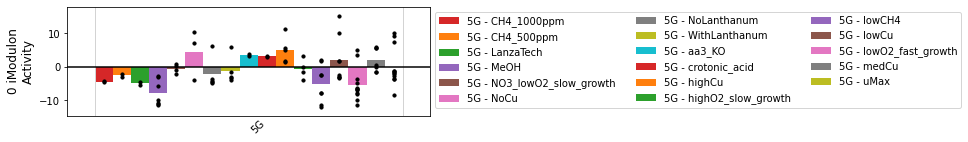

In [18]:
plot_activities(ica_data,0,highlight=['5G'])

# Erin's replotting attempt

In [19]:
def plot_activities_erin(
    ica_data, imodulon, assigned_colors=None, ax=None, legend_kwargs=None
):
    """
    Creates a barplot showing an iModulon's activity across the compendium
    Parameters
    ----------
    ica_data: ~pymodulon.core.IcaData
        :class:`~pymodulon.core.IcaData` object
    imodulon: int or str
        `iModulon` name
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: str or list, optional
        Name(s) of projects to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # Check that iModulon exists
    if imodulon in ica_data.A.index:
        values = ica_data.A.loc[imodulon]
    else:
        raise ValueError(f"iModulon does not exist: {imodulon}")

    label = "{} iModulon\nActivity".format(imodulon)

    return barplot_erin(
        values=values,
        sample_table=ica_data.sample_table,
        ylabel=label,
        # projects=projects,
        # highlight=highlight,
        assigned_colors=assigned_colors,
        ax=ax,
        legend_kwargs=legend_kwargs,
    )


In [35]:
def barplot_erin(
    values,
    sample_table,
    ylabel="",
    #projects=None,
    #highlight=None,
    assigned_colors=None,
    ax=None,
    legend_kwargs=None,
):
    """
    Creates an overlaid scatter and barplot for a set of values (either gene
    expression levels or iModulon activities)
    Parameters
    ----------
    values: ~pandas.Series
        List of `values` to plot
    sample_table: ~pandas.DataFrame
        Sample table from :class:`~pymodulon.core.IcaData` object
    ylabel: str, optional
        Y-axis label
    projects: list or str, optional
        Name(s) of `projects` to show (default: show all)
    highlight: list or str, optional
        Project(s) to `highlight` (default: None)
    ax: ~matplotlib.axes.Axes, optional
        Axes object to plot on, otherwise use current Axes
    legend_kwargs: dict, optional
        Additional keyword arguments passed to :func:`matplotlib.pyplot.legend`
    Returns
    -------
    ax: ~matplotlib.axes.Axes
        :class:`~matplotlib.axes.Axes` containing the barplot
    """

    # # Remove extra projects
    # if isinstance(projects, str):
    #     projects = [projects]

    # if projects is not None and len(projects) == 1:
    #     highlight = projects

    # if projects is not None and "project" in sample_table:
    #     sample_table = sample_table[sample_table.project.isin(projects)]
    #     values = values[sample_table.index]

    if ax is None:
        figsize = (len(values) / 15 + 0.5, 2)
        fig, ax = plt.subplots(figsize=figsize)

    # Get ymin and max
    ymin = values.min()
    ymax = values.max()
    yrange = ymax - ymin
    ymax = max(1, max(ymax * 1.1, ymax + yrange * 0.1))
    ymin = min(-1, min(ymin * 1.1, ymin - yrange * 0.1))
    yrange = ymax - ymin

    # Add project-specific information
    if "project" in sample_table.columns and "condition" in sample_table.columns:

        # Sort data by project/condition to ensure replicates are together
        metadata = sample_table.loc[:, ["project", "condition","xorder"]]
        metadata = metadata.sort_values(["project", "condition"])
        #metadata["name"] = metadata.project + " - " + metadata.condition.astype(str)
        metadata["name"] = metadata.condition.astype(str)

        # set xaxis order
        #xorder = ['uMax','MeOH','NoCu','lowCu','medCu','highCu','lowCH4','WithLanthanum','NoLanthanum','highO2_slow_growth','NO3_lowO2_slow_growth','lowO2_fast_growth',]
        #metadata['xorder'] = pd.Categorical(metadata['condition'],categories=xorder)
        metadata = metadata.sort_values('xorder')

        # Coerce highlight to iterable
        # if highlight is None:
        #     highlight = []
        # elif isinstance(highlight, str):
        #     highlight = [highlight]

        # Get X and Y values for scatter points
        metadata["y"] = values
        metadata["x"] = np.cumsum(~metadata[["name"]].duplicated())
        # ^^ looks for name duplications, increments when finds non-duplicated name

        # Get heights for barplot
        bar_vals = metadata.groupby("x").mean()

        # Add colors and names
        bar_vals["name"] = metadata.drop_duplicates("name").name.values
        bar_vals["project"] = metadata.drop_duplicates("name").project.values
        #bar_vals['xorder'] = pd.Categorical(bar_vals['name'],categories=xorder)
        #bar_vals = bar_vals.sort_values('xorder').reset_index()
        #return bar_vals


        # Plot bars for highlighted samples
        #color_vals = bar_vals[bar_vals.project.isin(highlight)]
        color_cycle = [
            "tab:red",
            "tab:orange",
            "tab:green",
            "tab:purple",
            "tab:brown",
            "tab:pink",
            "tab:gray",
            "tab:olive",
            "tab:cyan",
        ]


        i = 0
        #for name, group in bar_vals.groupby("name"):
        for j,row in bar_vals.iterrows():
            cond = row['name']
            if cond in assigned_colors:
                c = assigned_colors[cond]
            else:
                c = color_cycle[i]
                i = (i + 1) % len(color_cycle)
            ax.bar(
                #row.index,
                j,
                row.y,
                color=c,
                width=1,
                linewidth=0,
                align="edge",
                zorder=1,
                label=cond,
            )
            

        # # Plot bars for non-highlighted samples
        # other_vals = bar_vals[~bar_vals.project.isin(highlight)]
        # ax.bar(
        #     other_vals.index,
        #     other_vals.y,
        #     color="tab:blue",
        #     width=1,
        #     linewidth=0,
        #     align="edge",
        #     zorder=1,
        #     label=None,
        # )
        ax.scatter(metadata.x + 0.5, metadata.y, color="k", zorder=2, s=10)

        # Get project names and sizes
        projects = metadata.project.drop_duplicates()
        md_cond = metadata.drop_duplicates(["name"])
        project_sizes = [len(md_cond[md_cond.project == proj]) for proj in projects]
        nbars = len(md_cond)

        # Draw lines to discriminate between projects
        proj_lines = np.cumsum([1] + project_sizes)
        ax.vlines(proj_lines, ymin, ymax, colors="lightgray", linewidth=1)

        # # Add project names
        # texts = []
        # start = 2
        # for proj, size in zip(projects, project_sizes):
        #     x = start + size / 2
        #     texts.append(
        #         ax.text(
        #             x, ymin - yrange * 0.02, proj, ha="right", va="top", rotation=45
        #         )
        #     )
        #     start += size

        # Add cond names
        texts = []
        start = 1
        size=1
        for pos,cond in enumerate(bar_vals['name'].values):
            x = start + size / 2
            #x=x+2
            texts.append(
                ax.text(
                    x, ymin - yrange * 0.02, cond, ha="center", va="top", rotation=90
                )
            )
            start += size

        # Add legend
        #if not color_vals.empty:
        if not bar_vals.empty:
            kwargs = {
                "bbox_to_anchor": (1, 1),
                "ncol": len(bar_vals.name.unique()) // 8+1#6 + 1,
            }

            if legend_kwargs is not None:
                kwargs.update(legend_kwargs)

            ax.legend(**kwargs)

    else:
        logging.warning("Missing `project` and `condition` columns in `sample_table.`")
        ax.bar(range(len(values)), values, width=1, align="edge")
        nbars = len(values)

    # Set axis limits
    xmin = -0.5
    xmax = nbars + 2.5
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Axis labels
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xticks([])

    # X-axis
    ax.hlines(0, xmin, xmax, color="k")

    return ax

In [132]:
# Mary's request to sort by growth rate
priority = {
     "uMax": 1,
     "MeOH": 2,
     "NoCu": 3,
     "lowCu": 4,
     "medCu": 5,
     "highCu": 6,
     "LanzaTech": 7,
     "lowCH4": 8,
     "lowO2_fast_growth": 9,
     "aa3_KO": 10,
     "NO3_lowO2_slow_growth": 11,
     "highO2_slow_growth": 12,
     "CH4_500ppm":13,
     "CH4_1000ppm":14,
     "WithLanthanum": 15,
     "NoLanthanum": 16,
     "crotonic_acid": 17,
}

exp_order = [
     "uMax",
     "MeOH",
     "NoCu",
     "lowCu",
     "medCu",
     "highCu",
     "LanzaTech",
     "lowCH4",
     "lowO2_fast_growth",
     "aa3_KO",
     "NO3_lowO2_slow_growth",
     "highO2_slow_growth",
     "CH4_500ppm",
     "CH4_1000ppm",
     "WithLanthanum",
     "NoLanthanum",
     "crotonic_acid",
]

# specific colors to use for plots
color_spec = {
    'uMax':'#d9d9d9', # gray
    'NoCu':'#bdd7e7', # blues
    'lowCu':'#6baed6', # blues
    'medCu':'#3182bd', # blues
    'highCu':'#08519c', # blues
    'lowCH4':'#b3de69', # green
    'WithLanthanum':'#e6550d', #orange
    'NoLanthanum':'#fdbe85', #orange
    'MeOH':'#fb8072', #red
    'highO2_slow_growth':'#6a3d9a',
    'NO3_lowO2_slow_growth':'#bc80bd', # purple
    'lowO2_fast_growth':'#fccde5', # pink
    'LanzaTech':'#33a02c', #green
    'aa3_KO':'#e6f598', # light green
    'crotonic_acid':'#fee08b', #yellow
    'CH4_500ppm':'#99d8c9', #teal
    'CH4_1000ppm':'#66c2a4', #darker teal
}



In [133]:
act_df['exp_order'] = act_df['exp_condition'].apply(lambda x: priority[x])
act_df

imod                   sample_id     value exp_condition  exp_order
0         0        5GB1_FM03_TR1_QC_tpm  9.219409          uMax          1
1         1        5GB1_FM03_TR1_QC_tpm  0.595820          uMax          1
2      SG_1        5GB1_FM03_TR1_QC_tpm -0.615273          uMax          1
3         3        5GB1_FM03_TR1_QC_tpm -0.248316          uMax          1
4         4        5GB1_FM03_TR1_QC_tpm -0.278089          uMax          1
...     ...                         ...       ...           ...        ...
3865     38  5GB1C_CH4_1000ppm-Rep2_tpm -2.795177   CH4_1000ppm         14
3866   SG_9  5GB1C_CH4_1000ppm-Rep2_tpm  0.150109   CH4_1000ppm         14
3867     40  5GB1C_CH4_1000ppm-Rep2_tpm  2.359294   CH4_1000ppm         14
3868  SG_10  5GB1C_CH4_1000ppm-Rep2_tpm -5.381854   CH4_1000ppm         14
3869     42  5GB1C_CH4_1000ppm-Rep2_tpm  2.596316   CH4_1000ppm         14

[3870 rows x 5 columns]

In [165]:
color_domain = exp_order
color_range = [alt.HexColor(color_spec[x]) for x in exp_order]

def make_act_bars(df,mod):
    '''
    Quick iMod simulation plot to view A matrix bars
    '''
    small_df = df[df['imod']==mod]

    bars = alt.Chart(small_df).mark_bar().encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
        ),
        y=alt.Y(
            "mean(value):Q",
        ),
        color = alt.Color('exp_condition:N',
                           scale=alt.Scale(
                               domain=color_domain,
                               range=color_range
                               )
                         ),
        tooltip=['exp_condition'],
    ).properties(
        width=600,
        height=200
    )
    
    dots = alt.Chart(small_df).mark_point(color="black").encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
        ),
        y=alt.Y(
            "value:Q",
        ),
        
        tooltip=['sample_id:N','exp_condition:N'],
    ).properties(
        width=600,
        height=200
    ).interactive()
    
    return bars+dots

def make_dots(df, locus):
    small_df = df[['sample','exp_condition','exp_order',locus]]
    dots = alt.Chart(df).mark_circle(color='black').encode(
        x=alt.X(
            'exp_condition:N',
            sort=alt.EncodingSortField(field="exp_order", order='ascending'),
            axis=alt.Axis(title='',labels=False)
        ),
        y=alt.Y(
            f"{locus}:Q",
            #axis=alt.Axis(title=[f'{locus}'])
        ),tooltip = ['exp_condition:N','sample:N']

    ).properties(
        width=600,
        height=100
    )
    
    return dots

def make_gene_activity(df, df_means, locus,final=False):
    b = make_bars(df_means, locus,final=final)
    d = make_dots(df,locus)
    
    c = (b+d).resolve_scale(x='independent')

    return c

In [37]:
def imod_scatter(ica_data, mod_id):
    mod_row = ica_data.imodulon_table[ica_data.imodulon_table.index==mod_id]
    size = mod_row['imodulon_size'].values[0]
    fig = plt.figure(figsize=(3,3))
    sns.scatterplot(data=ica_data.imodulon_table, x='imodulon_size',y='explained_variance')
    sns.scatterplot(data=mod_row, x='imodulon_size',y='explained_variance',color='r',s=200)
    plt.title(f'iModulon {mod_id} ({size} genes)')
    plt.show()

In [78]:
def view_imod_weights_on_genome(ica_data, imod_id):
    genes_in_imod = set(ica_data.view_imodulon(imod_id).index)
    gene2weight = dict(ica_data.M[imod_id].reset_index().values)
    temp_df = ica_data.gene_table[['gene_symbol','product','start_coord']].fillna('')
    temp_df.index.name='locus_tag'
    temp_df = temp_df.reset_index()
    temp_df['weight'] = temp_df['locus_tag'].apply(lambda x: gene2weight[x])
    temp_df['in_imod?'] = temp_df['locus_tag'].apply(lambda x: x in genes_in_imod)
    
    

    chart = alt.Chart(temp_df).mark_circle(size=60).encode(
        x=alt.X('start_coord:Q',axis=alt.Axis(title='Genomic Coordinate')),
        y=alt.Y('weight:Q',axis=alt.Axis(title=f'M weight for iModulon {imod_id}')),
        color='in_imod?:N',
        tooltip=['locus_tag:N', 'gene_symbol:N', 'product:N','in_imod?:N']
    ).interactive()
    display(chart)

def inspect_more(mod):
    for x,y in ica_data.view_imodulon(mod)[['product','specific_gos']].values:
        print(f"{x}\n{y}")

In [39]:
# PLOT ALL PLOTS
# for mod in ica_data.imodulon_table.index:
#     plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
#     imod_scatter(ica_data,mod)
#     #ica_data.view_imodulon(mod)

# Look one at a time

In [171]:
def imod_info(mod):
    print(f"iModulon {mod}")
    #plot_activities_erin(ica_data,mod,assigned_colors=color_spec)
    display(make_act_bars(act_df,mod))
    imod_scatter(ica_data,mod)
    #view_imod_weights_on_genome(ica_data,mod)
    display(DF_enrichments[DF_enrichments.imodulon==mod].sort_values('f1score',ascending=False))
    display(ica_data.view_imodulon(mod))

## iMod 0

iModulon 0


alt.LayerChart(...)

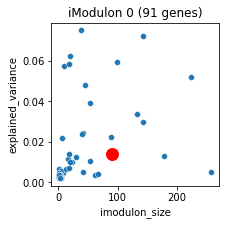

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00390     0.053503         NaN        83141      83930       1   
EQU24_RS00450     0.046464         NaN        95639      95957       1   
EQU24_RS00495     0.063648        plsY       102221     102797       1   
EQU24_RS00600     0.059031         NaN       124502     124934       1   
EQU24_RS00660     0.061823         NaN       137803     138718       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22530     0.071379         NaN      3901146    3901290      -1   
EQU24_RS22555    -0.050132         NaN      3971993    3972143       1   
EQU24_RS22780     0.046196         NaN      4103004    4103181      -1   
EQU24_RS22845     0.063815         NaN       218731     219004       1   
EQU24_RS23025     0.044904         NaN      2679531    2679849      -1   

                                                     product COG  \
locus_tag                                                          
EQU24_RS00390           glycosyltransferase family 4 protein   M   
EQU24_RS00450               phosphoribosyl-ATP diphosphatase   E   
EQU24_RS00495  glycerol-3-phosphate 1-O-acyltransferase PlsY   I   
EQU24_RS00600                            DedA family protein   S   
EQU24_RS00660                            MlaD family protein   Q   
...                                                      ...  ..   
EQU24_RS22530                           hypothetical protein   X   
EQU24_RS22555                           hypothetical protein   X   
EQU24_RS22780                           hypothetical protein   L   
EQU24_RS22845                           hypothetical protein   L   
EQU24_RS23025                           hypothetical protein   L   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS00390             Cell wall/membrane/envelope biogenesis     45   
EQU24_RS00450                Amino acid transport and metabolism     51   
EQU24_RS00495                     Lipid transport and metabolism     57   
EQU24_RS00600                                   Function unknown     72   
EQU24_RS00660  Secondary metabolites biosynthesis, transport,...     77   
...                                                          ...    ...   
EQU24_RS22530                                  No COG annotation   1962   
EQU24_RS22555                                  No COG annotation   1992   
EQU24_RS22780              Replication, recombination and repair   2557   
EQU24_RS22845              Replication, recombination and repair   2562   
EQU24_RS23025              Replication, recombination and repair   2576   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00390                                      EQU24_RS00390   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
EQU24_RS00495                                               plsY   
EQU24_RS00600                                      EQU24_RS00600   
EQU24_RS00660  EQU24_RS00665 // EQU24_RS00660 // EQU24_RS0065...   
...                                                          ...   
EQU24_RS22530  EQU24_RS17460 // EQU24_RS22535 // EQU24_RS1745...   
EQU24_RS22555                     EQU24_RS22555 // EQU24_RS17785   
EQU24_RS22780                                      EQU24_RS22780   
EQU24_RS22845                                      EQU24_RS22845   
EQU24_RS23025                                      EQU24_RS23025   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00390  WP_017841409.1          ||None   
EQU24_RS00450  WP_017841397.1          ||None   
EQU24_RS00495  WP_201764901.1      plsY||plsY   
EQU24_RS00600  WP_017841369.1          ||None   
EQU24_RS0066

In [172]:
imod = 0 
imod_info(imod)

In [173]:
#view_imod_weights_on_genome(ica_data,0)

In [174]:
inspect_more(0)

glycosyltransferase family 4 protein
['phospho-N-acetylmuramoyl-pentapeptide-transferase activity'
 'integral component of membrane']
phosphoribosyl-ATP diphosphatase
['phosphoribosyl-ATP diphosphatase activity'
 'carboxylic acid biosynthetic process'
 'carboxylic acid metabolic process' 'pyrophosphatase activity'
 'ATP binding']
glycerol-3-phosphate 1-O-acyltransferase PlsY
['acyl-phosphate glycerol-3-phosphate acyltransferase activity'
 'phospholipid biosynthetic process' 'plasma membrane'
 'integral component of membrane']
DedA family protein
['integral component of membrane']
MlaD family protein
['integral component of membrane']
class I SAM-dependent methyltransferase
['methyltransferase activity' 'methylation']
heavy metal-binding domain-containing protein
[]
cell envelope integrity protein TolA
['integral component of membrane']
prepilin-type N-terminal cleavage/methylation domain-containing protein
['integral component of membrane']
hypothetical protein
[]
alpha/beta hydrolase


In [175]:
# Update the ica_data object
#ica_data.rename_imodulons({0:'0-uncharacterized_EW'})
#ica_data.imodulon_table.loc[0,'category'] = 'uncharacterized'

# seems like a mix of a lot of things... expression pattern not clear...

In [71]:
ica_data.imodulon_table.loc[0,'function'] = 'unclear_EW'
ica_data.imodulon_table.head()

single_gene  imodulon_size  explained_variance         category  \
0            NaN             91            0.014136  uncharacterized   
1            NaN             41            0.005137  uncharacterized   
SG_1        True             62            0.003533      single_gene   
3            NaN            178            0.013264  uncharacterized   
4            NaN              9            0.057266  uncharacterized   

        function  
0     unclear_EW  
1            NaN  
SG_1         NaN  
3            NaN  
4            NaN

## iMod 1

iModulon 1


alt.LayerChart(...)

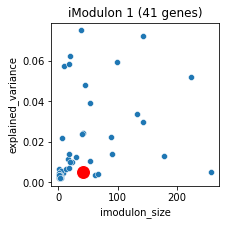

imodulon go_name        pvalue    qvalue  precision  recall   f1score   TP  \
0         1     NaN  8.763778e-07  0.000205   0.073171     1.0  0.136364  3.0   
1         1     NaN  9.388478e-05  0.010985   0.048780     1.0  0.093023  2.0   

   target_set_size  imodulon_size        source annotation pathway_name  \
0              3.0           41.0  KEGG modules     M00641          NaN   
1              2.0           41.0  KEGG modules     M00701          NaN   

                                    module_name  
0  Multidrug resistance, efflux pump MexEF-OprN  
1                                           NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00075     0.077314        tatB        19487      19799       1   
EQU24_RS00670    -0.056757         NaN       139733     140330       1   
EQU24_RS00675    -0.056219         NaN       140348     142232      -1   
EQU24_RS01215     0.147245         NaN       244910     246491      -1   
EQU24_RS02055     0.183374         NaN       432527     434726       1   
EQU24_RS03025     0.053296         hcp       649987     651652      -1   
EQU24_RS08705     0.054562         NaN      1928777    1931024       1   
EQU24_RS10725    -0.073210         NaN      2382953    2384153      -1   
EQU24_RS10740    -0.059935         NaN      2384845    2385241      -1   
EQU24_RS10820     0.080757         NaN      2404406    2405621       1   
EQU24_RS10825     0.119718         NaN      2405627    2408813       1   
EQU24_RS10830     0.099382         NaN      2408809    2410279       1   
EQU24_RS10835     0.058109         NaN      2410522    2411131      -1   
EQU24_RS10965    -0.066226         NaN      2446321    2446762      -1   
EQU24_RS11970     0.064231         NaN      2677956    2678349      -1   
EQU24_RS13510    -0.054378         NaN      3016498    3016780      -1   
EQU24_RS15150     0.146807         NaN      3384817    3385819       1   
EQU24_RS15155     0.142284         NaN      3386052    3387633       1   
EQU24_RS15160     0.092884         NaN      3387629    3389084       1   
EQU24_RS15165     0.055792         NaN      3389080    3390271       1   
EQU24_RS16250     0.061747         NaN      3652549    3652960       1   
EQU24_RS18155     0.068659        mxaD      4046381    4046912      -1   
EQU24_RS18425     0.130717         NaN      4110547    4111021       1   
EQU24_RS19140    -0.069110         NaN      4280475    4281051       1   
EQU24_RS20320    -0.057156         NaN      4585274    4585535      -1   
EQU24_RS20485    -0.097912         NaN      4621691    4622354      -1   
EQU24_RS20495    -0.073590         NaN      4624621    4625545       1   
EQU24_RS20580     0.069625         NaN      4639230    4639482      -1   
EQU24_RS21125    -0.061225         NaN      4758680    4759946      -1   
EQU24_RS21140    -0.055215         NaN      4761964    4762903      -1   
EQU24_RS21890     0.064719         NaN      4939707    4939902      -1   
EQU24_RS21950    -0.076300         NaN      4951917    4953342       1   
EQU24_RS21955    -0.088467        hflK      4953432    4954593       1   
EQU24_RS21960    -0.065890        hflC      4954589    4955456       1   
EQU24_RS22195     0.069208         NaN       390386     390539       1   
EQU24_RS22200    -0.088322         NaN       395600     395882      -1   
EQU24_RS22240     0.052863         NaN       777145     777298       1   
EQU24_RS22390     0.120372         NaN      2602062    2602227       1   
EQU24_RS22530    -0.063712         NaN      3901146    3901290      -1   
EQU24_RS22800     0.090726         NaN      4587226    4587418      -1   
EQU24_RS23010    -0.054788         NaN      2664686    2665580       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00075   Sec-independent protein translocase protein TatB   U   
EQU24_RS00670                               hypothetical protein   X   
EQU24_RS00675                                 SCO family protein   C   
EQU24_RS01215                            IS66 family transposase   L   
EQU24_RS02055                            TonB-dependent receptor   P   
EQU24_RS03025                            hydroxylamine reductase   C   
EQU24_RS08705                      fused MFS/spermidine synthase   J   
EQU24_RS10725                NAD(P)/FAD-dependent oxidoreductase   S   
EQU24_RS10740           rhodanese-like domain-containing protein   P   
EQU24_RS10820  efflux RND transporter pe

In [176]:
imod_info(1)

In [87]:
#view_imod_weights_on_genome(ica_data,1)
inspect_more(1)

Sec-independent protein translocase protein TatB
['TAT protein transport complex' 'integral component of plasma membrane'
 'protein transport by the Tat complex'
 'protein transmembrane transporter activity']
hypothetical protein
[]
SCO family protein
['heme binding' 'metal ion binding' 'electron transport chain'
 'cell redox homeostasis' 'electron transfer activity']
IS66 family transposase
[]
TonB-dependent receptor
['cell outer membrane' 'integral component of membrane']
hydroxylamine reductase
['nitric oxide catabolic process' 'hydroxylamine reductase activity'
 'cellular response to toxic substance'
 'response to reactive oxygen species'
 'cellular nitrogen compound catabolic process']
fused MFS/spermidine synthase
['integral component of membrane']
NAD(P)/FAD-dependent oxidoreductase
['oxidoreductase activity' '']
rhodanese-like domain-containing protein
[]
efflux RND transporter periplasmic adaptor subunit
['transmembrane transport' 'transmembrane transporter activity' 'membrane

In [74]:
# Update the ICA data object
#ica_data.rename_imodulons({1:'1-uncharacterized_EW'})
ica_data.imodulon_table.loc[1,'function'] = 'upMeOH|maybe_transport?_EW'
ica_data.imodulon_table.head()


single_gene  imodulon_size  explained_variance         category  \
0            NaN             91            0.014136  uncharacterized   
1            NaN             41            0.005137  uncharacterized   
SG_1        True             62            0.003533      single_gene   
3            NaN            178            0.013264  uncharacterized   
4            NaN              9            0.057266  uncharacterized   

                        function  
0                     unclear_EW  
1     upMeOH|maybe_transport?_EW  
SG_1                         NaN  
3                            NaN  
4                            NaN

## iMod 2

iModulon SG_1


alt.LayerChart(...)

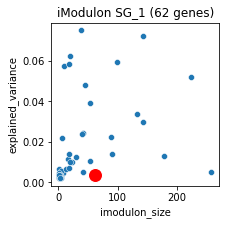

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00525     0.053884         NaN       108456     108533       1   
EQU24_RS01055    -0.043760         NaN       217442     217802       1   
EQU24_RS01135     0.049034         NaN       231558     231840       1   
EQU24_RS01650     0.051020        cysW       347490     348357      -1   
EQU24_RS02055     0.339272         NaN       432527     434726       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22765    -0.066457         NaN      3894485    3894593       1   
EQU24_RS22805     0.061666         NaN      4609260    4609455      -1   
EQU24_RS22810     0.042931         NaN      4626446    4626764      -1   
EQU24_RS22905     0.067012         NaN      1352804    1353026      -1   
EQU24_RS23175    -0.091964         NaN      4919710    4919809       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00525                                                NaN   X   
EQU24_RS01055                             Tn3 family transposase   L   
EQU24_RS01135                               hypothetical protein   X   
EQU24_RS01650      sulfate ABC transporter permease subunit CysW   P   
EQU24_RS02055                            TonB-dependent receptor   P   
...                                                          ...  ..   
EQU24_RS22765                               hypothetical protein   X   
EQU24_RS22805                               hypothetical protein   X   
EQU24_RS22810                               hypothetical protein   X   
EQU24_RS22905                               hypothetical protein   X   
EQU24_RS23175  type II toxin-antitoxin system RelE/ParE famil...   X   

                                             cog_name  tu_id  \
locus_tag                                                      
EQU24_RS00525                       No COG annotation     61   
EQU24_RS01055   Replication, recombination and repair    131   
EQU24_RS01135                       No COG annotation    142   
EQU24_RS01650  Inorganic ion transport and metabolism    206   
EQU24_RS02055  Inorganic ion transport and metabolism    257   
...                                               ...    ...   
EQU24_RS22765                       No COG annotation   1959   
EQU24_RS22805                       No COG annotation   2560   
EQU24_RS22810                       No COG annotation   2302   
EQU24_RS22905                       No COG annotation   2567   
EQU24_RS23175                       No COG annotation   2461   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00525                              EQU24_RS00525 // rpoD   
EQU24_RS01055  EQU24_RS01055 // EQU24_RS01050 // EQU24_RS2266...   
EQU24_RS01135  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01650                                       cysT // cysW   
EQU24_RS02055                                      EQU24_RS02055   
...                                                          ...   
EQU24_RS22765                     EQU24_RS17400 // EQU24_RS22765   
EQU24_RS22805                                      EQU24_RS22805   
EQU24_RS22810                     EQU24_RS22810 // EQU24_RS20505   
EQU24_RS22905                                      EQU24_RS22905   
EQU24_RS23175                     EQU24_RS21810 // EQU24_RS23175   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00525             NaN              ||   
EQU24_RS01055  WP_017841280.1          ||None   
EQU24_RS01135  WP_017841271.1          ||None   
EQU24_RS01650  WP_017841176.1      cysW||cysW   
EQU24_RS02055  WP_235726409.1          ||None   
...                       ...             ...   
EQU24

In [177]:
imod_info("SG_1")

In [86]:
#view_imod_weights_on_genome(ica_data,'SG_1')

In [83]:
ica_data.imodulon_table.loc["SG_1",'function'] = 'sg-tonB_EW'



In [84]:
ica_data.imodulon_table.head()

single_gene  imodulon_size  explained_variance         category  \
0            NaN             91            0.014136  uncharacterized   
1            NaN             41            0.005137  uncharacterized   
SG_1        True             62            0.003533      single_gene   
3            NaN            178            0.013264  uncharacterized   
4            NaN              9            0.057266  uncharacterized   

                        function  
0                     unclear_EW  
1     upMeOH|maybe_transport?_EW  
SG_1                  sg-tonB_EW  
3                            NaN  
4                            NaN

### iModulon 3


iModulon 3


alt.LayerChart(...)

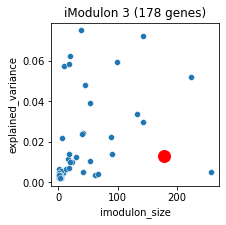

imodulon                                go_name        pvalue    qvalue  \
0         3        sulfate transmembrane transport  4.144723e-07  0.000887   
1         3  ABC-type sulfate transporter activity  3.183189e-06  0.003404   
2         3                                    NaN  3.183189e-06  0.000745   

   precision    recall   f1score   TP  target_set_size  imodulon_size  \
0   0.033708  0.666667  0.064171  6.0              9.0          178.0   
1   0.022472  1.000000  0.043956  4.0              4.0          178.0   
2   0.022472  1.000000  0.043956  4.0              4.0          178.0   

         source annotation pathway_name module_name  
0            GO        NaN          NaN         NaN  
1            GO        NaN          NaN         NaN  
2  KEGG modules     M00185          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00105    -0.045226         crp        24340      24994      -1   
EQU24_RS00145    -0.040330         NaN        34142      34445      -1   
EQU24_RS00990    -0.036127        aqpZ       203428     204151       1   
EQU24_RS01170     0.032618         NaN       235812     237102      -1   
EQU24_RS01215    -0.039000         NaN       244910     246491      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22390    -0.035032         NaN      2602062    2602227       1   
EQU24_RS22410     0.049640         NaN      2736544    2736847      -1   
EQU24_RS22510    -0.049260         NaN      3684540    3684699      -1   
EQU24_RS22765    -0.040076         NaN      3894485    3894593       1   
EQU24_RS22860     0.030848         NaN       445922     446033       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00105  cAMP-activated global transcriptional regulato...   K   
EQU24_RS00145                               hypothetical protein   J   
EQU24_RS00990                                        aquaporin Z   G   
EQU24_RS01170                            Y-family DNA polymerase   L   
EQU24_RS01215                            IS66 family transposase   L   
...                                                          ...  ..   
EQU24_RS22390                               hypothetical protein   X   
EQU24_RS22410                               hypothetical protein   X   
EQU24_RS22510                               hypothetical protein   X   
EQU24_RS22765                               hypothetical protein   X   
EQU24_RS22860   type II toxin-antitoxin system HicA family toxin   X   

                                                      cog_name  tu_id  \
locus_tag                                                               
EQU24_RS00105                                    Transcription     11   
EQU24_RS00145  Translation, ribosomal structure and biogenesis     16   
EQU24_RS00990            Carbohydrate transport and metabolism    120   
EQU24_RS01170            Replication, recombination and repair    147   
EQU24_RS01215            Replication, recombination and repair    151   
...                                                        ...    ...   
EQU24_RS22390                                No COG annotation   2525   
EQU24_RS22410                                No COG annotation   2527   
EQU24_RS22510                                No COG annotation   2537   
EQU24_RS22765                                No COG annotation   1959   
EQU24_RS22860                                No COG annotation   2564   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS00105                             crp // EQU24_RS00100   
EQU24_RS00145  EQU24_RS00155 // EQU24_RS00150 // EQU24_RS00145   
EQU24_RS00990                                             aqpZ   
EQU24_RS01170                            umuD // EQU24_RS01170   
EQU24_RS01215                                    EQU24_RS01215   
...                                                        ...   
EQU24_RS22390                                    EQU24_RS22390   
EQU24_RS22410                                    EQU24_RS22410   
EQU24_RS22510                                    EQU24_RS22510   
EQU24_RS22765                   EQU24_RS17400 // EQU24_RS22765   
EQU24_RS22860                                    EQU24_RS22860   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00105  WP_014146545.1        crp||crp   
EQU24_RS00145  WP_014146553.1          ||None   
EQU24_RS00990  WP_235726467.1      aqpZ||aqpZ   
EQU24_RS01170  WP_017841266.1          ||None   
EQU24_RS0121

In [178]:
#imod_info(3)
imod_info(3)

In [90]:
view_imod_weights_on_genome(ica_data,3)

alt.Chart(...)

In [179]:
ica_data.imodulon_table.loc[3,'function'] = 'sulfate transport/FM23_TR3_QC-outlier-response_EW'
ica_data.imodulon_table.head()


single_gene  imodulon_size  explained_variance         category  \
0            NaN             91            0.014136  uncharacterized   
1            NaN             41            0.005137  uncharacterized   
SG_1        True             62            0.003533      single_gene   
3            NaN            178            0.013264  uncharacterized   
4            NaN              9            0.057266  uncharacterized   

                                               function  
0                                            unclear_EW  
1                            upMeOH|maybe_transport?_EW  
SG_1                                         sg-tonB_EW  
3     sulfate transport/FM23_TR3_QC-outlier-response_EW  
4                                                   NaN

## iMod 4

iModulon 4


alt.LayerChart(...)

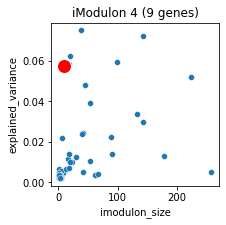

imodulon                                            go_name        pvalue  \
0          4                                                NaN  2.383755e-15   
2          4                          methane metabolic process  6.635245e-13   
3          4                                                NaN  1.047559e-14   
3          4                     methane monooxygenase activity  1.491737e-12   
5          4                                  catalytic complex  1.485111e-10   
6          4                      methane monooxygenase complex  1.485111e-10   
4          4                             monooxygenase activity  5.460966e-12   
7          4                         protein-containing complex  3.461940e-10   
8          4                  cellular alkane metabolic process  3.461940e-10   
9          4  oxidoreductase activity, acting on paired dono...  1.243911e-09   
10         4  oxidoreductase activity, acting on paired dono...  3.251617e-09   
17         4       cellular aromatic compound metabolic process  1.041910e-05   
11         4                                 cellular_component  8.757378e-07   
1          4                                                NaN  9.061628e-10   
13         4                         cellular metabolic process  1.697671e-06   
12         4                organic substance metabolic process  1.850218e-06   
14         4                                  metabolic process  3.465605e-06   
15         4                                   cellular process  3.995516e-06   
16         4                                 molecular_function  7.155677e-06   
18         4                            oxidoreductase activity  1.066940e-05   
19         4                                 biological_process  1.317561e-05   
2          4                                                NaN  4.278781e-08   
20         4                                 catalytic activity  1.857596e-05   
3          4                                                NaN  1.048100e-06   
21         4                                                NaN  1.062755e-04   
4          4                                                NaN  3.799451e-04   

          qvalue  precision    recall   f1score   TP  target_set_size  \
0   5.053561e-13   0.666667  0.600000  0.631579  6.0             10.0   
2   1.419279e-09   0.555556  0.625000  0.588235  5.0              8.0   
3   2.451289e-12   0.666667  0.500000  0.571429  6.0             12.0   
3   1.595413e-09   0.555556  0.555556  0.555556  5.0              9.0   
5   6.353307e-08   0.444444  0.666667  0.533333  4.0              6.0   
6   6.353307e-08   0.444444  0.666667  0.533333  4.0              6.0   
4   3.893669e-09   0.555556  0.454545  0.500000  5.0             11.0   
7   1.057870e-07   0.444444  0.571429  0.500000  4.0              7.0   
8   1.057870e-07   0.444444  0.571429  0.500000  4.0              7.0   
9   3.325906e-07   0.444444  0.444444  0.444444  4.0              9.0   
10  7.728011e-07   0.444444  0.363636  0.400000  4.0             11.0   
17  1.342461e-03   0.333333  0.136364  0.193548  3.0             22.0   
11  1.873203e-04   0.444444  0.100000  0.163265  4.0             40.0   
1   9.605326e-08   0.666667  0.092308  0.162162  6.0             65.0   
13  3.298014e-04   0.444444  0.085106  0.142857  4.0             47.0   
12  3.298014e-04   0.444444  0.083333  0.140351  4.0             48.0   
14  5.702252e-04   0.444444  0.071429  0.123077  4.0             56.0   
15  6.104577e-04   0.444444  0.068966  0.119403  4.0             58.0   
16  1.020400e-03   0.444444  0.059701  0.105263  4.0             67.0   
18  1.342461e-03   0.444444  0.054054  0.096386  4.0             74.0   
19  1.565702e-03   0.444444  0.051282  0.091954  4.0             78.0   
2   3.023672e-06   0.666667  0.049180  0.091603  6.0            122.0   
20  2.091262e-03   0.444444  0.047059  0.085106  4.0             85.0   
3   5.554931e-05   0.666667  0.028846  0.055300  6.0            

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS05885     0.289667        mmoX      1283573    1285151       1   
EQU24_RS05890     0.276013        mmoY      1285264    1286443       1   
EQU24_RS05895     0.283490        mmoB      1286453    1286879       1   
EQU24_RS05900     0.273106        mmoZ      1286888    1287392       1   
EQU24_RS05905     0.242308        mmoD      1287685    1287934       1   
EQU24_RS05910     0.244073        mmoC      1287957    1288995       1   
EQU24_RS05915     0.221179         NaN      1289516    1289897       1   
EQU24_RS05920     0.241057         NaN      1290051    1290351       1   
EQU24_RS05925     0.234747        mmoG      1290558    1292238       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS05885  aromatic/alkene/methane monooxygenase hydroxyl...   H   
EQU24_RS05890  aromatic/alkene monooxygenase hydroxylase subu...   H   
EQU24_RS05895                           MmoB/DmpM family protein   C   
EQU24_RS05900                               hypothetical protein   H   
EQU24_RS05905  soluble methane monooxygenase-binding protein ...   X   
EQU24_RS05910                         FAD-binding oxidoreductase   C   
EQU24_RS05915                     BLUF domain-containing protein   S   
EQU24_RS05920                               hypothetical protein   X   
EQU24_RS05925                          likely chaperone for smmo   O   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS05885                  Coenzyme transport and metabolism    671   
EQU24_RS05890                  Coenzyme transport and metabolism    672   
EQU24_RS05895                   Energy production and conversion    672   
EQU24_RS05900                  Coenzyme transport and metabolism    672   
EQU24_RS05905                                  No COG annotation    673   
EQU24_RS05910                   Energy production and conversion    673   
EQU24_RS05915                                   Function unknown    674   
EQU24_RS05920                                  No COG annotation    675   
EQU24_RS05925  Post-translational modification, protein turno...    676   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS05885                                    EQU24_RS05885   
EQU24_RS05890  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05895  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05900  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05905                            EQU24_RS05910 // mmoD   
EQU24_RS05910                            EQU24_RS05910 // mmoD   
EQU24_RS05915                                    EQU24_RS05915   
EQU24_RS05920                                    EQU24_RS05920   
EQU24_RS05925                                            groEL   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS05885  WP_017840379.1          ||None   
EQU24_RS05890  WP_017840378.1          ||None   
EQU24_RS05895  WP_017840377.1          ||None   
EQU24_RS05900  WP_017840376.1          ||None   
EQU24_RS05905  WP_201764852.1      mmoD||mmoD   
EQU24_RS05910  WP_017840374.1          ||None   
EQU24_RS05915  WP_235726398.1          ||None   
EQU24_RS05920  WP_017840372.1          ||None   
EQU24_RS05925  WP_017840371.1    groEL||groEL   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS05885  methane monooxygenase activity\nmethane metabo...   
EQU24_RS05890  methane monooxygenase activity\nmethane metabo...   
EQU24_RS05895  methane monooxygenase activ

In [181]:
imod_info(4)

In [182]:
ica_data.imodulon_table.loc[4,'function'] = 'smmo_cluster_EW'


## iMod 5

iModulon 5


alt.LayerChart(...)

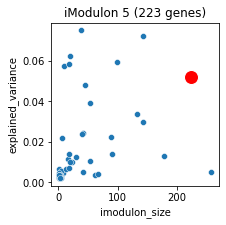

imodulon                             go_name    pvalue    qvalue  \
23         5                         translation  0.000003  0.003367   
22         5  structural constituent of ribosome  0.000003  0.003367   
5          5                                 NaN  0.000003  0.000667   
4          5                                 NaN  0.000003  0.000737   
24         5                            ribosome  0.000005  0.003554   

    precision    recall   f1score    TP  target_set_size  imodulon_size  \
23   0.062780  0.225806  0.098246  14.0             62.0          223.0   
22   0.058296  0.240741  0.093863  13.0             54.0          223.0   
5    0.058296  0.240741  0.093863  13.0             54.0          223.0   
4    0.058296  0.240741  0.093863  13.0             54.0          223.0   
24   0.053812  0.250000  0.088561  12.0             48.0          223.0   

           source annotation pathway_name module_name  
23             GO        NaN          NaN         NaN  
22             GO        NaN          NaN         NaN  
5   KEGG pathways   map03010     Ribosome         NaN  
4    KEGG modules     M00178          NaN         NaN  
24             GO        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00105     0.054742         crp        24340      24994      -1   
EQU24_RS00110     0.072114         NaN        25137      25554       1   
EQU24_RS00505     0.062100        rpsU       104077     104311       1   
EQU24_RS00510     0.057226         NaN       104333     104783       1   
EQU24_RS00720     0.032192         NaN       149248     150148       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22495    -0.089670         NaN      3592689    3592968      -1   
EQU24_RS22640     0.043352         NaN      4687769    4687946      -1   
EQU24_RS22800    -0.036919         NaN      4587226    4587418      -1   
EQU24_RS22805    -0.051679         NaN      4609260    4609455      -1   
EQU24_RS23175    -0.062129         NaN      4919710    4919809       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00105  cAMP-activated global transcriptional regulato...   K   
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00505                          30S ribosomal protein S21   J   
EQU24_RS00510                GatB/YqeY domain-containing protein   S   
EQU24_RS00720  phosphoribosylaminoimidazolesuccinocarboxamide...   F   
...                                                          ...  ..   
EQU24_RS22495                               hypothetical protein   X   
EQU24_RS22640                               hypothetical protein   X   
EQU24_RS22800                               hypothetical protein   X   
EQU24_RS22805                               hypothetical protein   X   
EQU24_RS23175  type II toxin-antitoxin system RelE/ParE famil...   X   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS00105                                      Transcription     11   
EQU24_RS00110  Post-translational modification, protein turno...     12   
EQU24_RS00505    Translation, ribosomal structure and biogenesis     59   
EQU24_RS00510                                   Function unknown     59   
EQU24_RS00720                Nucleotide transport and metabolism     87   
...                                                          ...    ...   
EQU24_RS22495                                  No COG annotation   1804   
EQU24_RS22640                                  No COG annotation   2340   
EQU24_RS22800                                  No COG annotation   2559   
EQU24_RS22805                                  No COG annotation   2560   
EQU24_RS23175                                  No COG annotation   2461   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00105                               crp // EQU24_RS00100   
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00505                              EQU24_RS00510 // rpsU   
EQU24_RS00510                              EQU24_RS00510 // rpsU   
EQU24_RS00720                                      EQU24_RS00720   
...                                                          ...   
EQU24_RS22495  EQU24_RS16000 // EQU24_RS15995 // EQU24_RS2250...   
EQU24_RS22640                     EQU24_RS22640 // EQU24_RS20815   
EQU24_RS22800                                      EQU24_RS22800   
EQU24_RS22805                                      EQU24_RS22805   
EQU24_RS23175                     EQU24_RS21810 // EQU24_RS23175   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00105  WP_014146545.1        crp||crp   
EQU24_RS00110  WP_017841455.1          ||None   
EQU24_RS00505  WP_014146611.1      rpsU||rpsU   
EQU24_RS0

In [183]:
imod_info(5)

In [184]:
ica_data.imodulon_table.loc[5,'function'] = 'ribosomal/translation_EW'


## iMod 6

iModulon 6


alt.LayerChart(...)

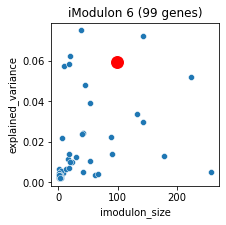

imodulon       go_name        pvalue    qvalue  precision    recall  \
26         6    DNA repair  3.750152e-07  0.000401   0.080808  0.258065   
25         6  SOS response  1.862444e-08  0.000040   0.070707  0.466667   
5          6           NaN  5.069027e-05  0.011862   0.030303  0.750000   

     f1score   TP  target_set_size  imodulon_size        source annotation  \
26  0.123077  8.0             31.0           99.0            GO        NaN   
25  0.122807  7.0             15.0           99.0            GO        NaN   
5   0.058252  3.0              4.0           99.0  KEGG modules     M00729   

   pathway_name module_name  
26          NaN         NaN  
25          NaN         NaN  
5           NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS01125     0.043869         NaN       229960     230614       1   
EQU24_RS01130     0.060288         NaN       230606     231530       1   
EQU24_RS01135     0.086491         NaN       231558     231840       1   
EQU24_RS01140     0.041121         NaN       231871     232978       1   
EQU24_RS01150     0.064879         NaN       234038     234461       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22570     0.087990         NaN      4233827    4233983       1   
EQU24_RS22585     0.060567         NaN      4420667    4420814       1   
EQU24_RS22590     0.073427         NaN      4470612    4470756      -1   
EQU24_RS22620     0.070582         NaN      4585554    4585692      -1   
EQU24_RS22665     0.041524         NaN       216141     216540       1   

                                 product COG  \
locus_tag                                      
EQU24_RS01125       hypothetical protein   X   
EQU24_RS01130        ATP-binding protein   U   
EQU24_RS01135       hypothetical protein   X   
EQU24_RS01140  metal-dependent hydrolase   S   
EQU24_RS01150       hypothetical protein   X   
...                                  ...  ..   
EQU24_RS22570       hypothetical protein   X   
EQU24_RS22585       hypothetical protein   X   
EQU24_RS22590       hypothetical protein   X   
EQU24_RS22620       hypothetical protein   X   
EQU24_RS22665       hypothetical protein   U   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS01125                                  No COG annotation    142   
EQU24_RS01130  Intracellular trafficking, secretion, and vesi...    142   
EQU24_RS01135                                  No COG annotation    142   
EQU24_RS01140                                   Function unknown    142   
EQU24_RS01150                                  No COG annotation    144   
...                                                          ...    ...   
EQU24_RS22570                                  No COG annotation   2130   
EQU24_RS22585                                  No COG annotation   2545   
EQU24_RS22590                                  No COG annotation   2238   
EQU24_RS22620                                  No COG annotation   2282   
EQU24_RS22665  Intracellular trafficking, secretion, and vesi...    131   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS01125  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01130  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01135  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01140  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01150                                      EQU24_RS01150   
...                                                          ...   
EQU24_RS22570                              EQU24_RS22570 // lexA   
EQU24_RS22585                                      EQU24_RS22585   
EQU24_RS22590                              lexA // EQU24_RS22590   
EQU24_RS22620    EQU24_RS20325 // EQU24_RS22620 // EQU24_RS20320   
EQU24_RS22665  EQU24_RS01055 // EQU24_RS01050 // EQU24_RS2266...   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS01125  WP_017841273.1          ||None   
EQU24_RS01130  WP_017841272.1          ||None   
EQU24_RS01135  WP_017841271.1          ||None   
EQU24_RS01140  WP_017841270.1          ||None   
EQU24_RS01150  WP_017841268.1          ||None   
...                       ...             ...   
EQU24_RS22570  WP_014149976.1          ||None   
EQU24_RS22585  WP_017841924.1          ||None   
EQU24_RS22590  WP_017841219.1          ||None   
EQU24_RS22620  WP_017841801

In [185]:
imod_info(6)

In [186]:
ica_data.imodulon_table.loc[6,'function'] = 'SOS-response_EW'


## iMod 7

iModulon 7


alt.LayerChart(...)

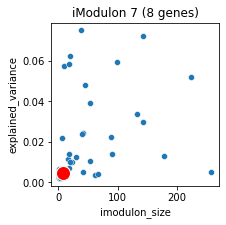

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS05420     0.309172         NaN      1163549    1163954       1   
EQU24_RS10965     0.133337         NaN      2446321    2446762      -1   
EQU24_RS14480     0.342180         NaN      3237002    3237146      -1   
EQU24_RS16370     0.141081         NaN      3676994    3677465      -1   
EQU24_RS16375     0.231615         NaN      3677719    3678100      -1   
EQU24_RS20320     0.281209         NaN      4585274    4585535      -1   
EQU24_RS22355     0.153906         NaN      1865054    1865348       1   
EQU24_RS22460     0.175748         NaN      3274859    3275009      -1   

                                                  product COG  \
locus_tag                                                       
EQU24_RS05420                 biopolymer transporter ExbD   U   
EQU24_RS10965                          phage tail protein   S   
EQU24_RS14480           DUF3096 domain-containing protein   S   
EQU24_RS16370  helix-turn-helix domain-containing protein   X   
EQU24_RS16375                        hypothetical protein   X   
EQU24_RS20320           DUF2442 domain-containing protein   S   
EQU24_RS22355                        hypothetical protein   X   
EQU24_RS22460                        hypothetical protein   X   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS05420  Intracellular trafficking, secretion, and vesi...    611   
EQU24_RS10965                                   Function unknown   1226   
EQU24_RS14480                                   Function unknown   1621   
EQU24_RS16370                                  No COG annotation   1846   
EQU24_RS16375                                  No COG annotation   1847   
EQU24_RS20320                                   Function unknown   2282   
EQU24_RS22355                                  No COG annotation   2520   
EQU24_RS22460                                  No COG annotation   2535   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS05420    EQU24_RS05430 // EQU24_RS05425 // EQU24_RS05420   
EQU24_RS10965  EQU24_RS10970 // EQU24_RS10965 // EQU24_RS1096...   
EQU24_RS14480                                      EQU24_RS14480   
EQU24_RS16370                     EQU24_RS16370 // EQU24_RS16365   
EQU24_RS16375                                      EQU24_RS16375   
EQU24_RS20320    EQU24_RS20325 // EQU24_RS22620 // EQU24_RS20320   
EQU24_RS22355                                      EQU24_RS22355   
EQU24_RS22460                                      EQU24_RS22460   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS05420  WP_014149416.1          ||None   
EQU24_RS10965  WP_014148651.1          ||None   
EQU24_RS14480  WP_014148969.1          ||None   
EQU24_RS16370  WP_017842551.1          ||None   
EQU24_RS16375  WP_138767202.1          ||None   
EQU24_RS20320  WP_017841802.1          ||None   
EQU24_RS22355  WP_017839903.1          ||None   
EQU24_RS22460  WP_175421689.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS05420  protein transport\nplasma membrane\nintegral c...   
EQU24_RS10965  acyltransferase activity\nstructural molecule ...   
EQU24_RS14480                     integral component of membrane   
EQU24_RS16370                                        DNA binding   
EQU24_RS16375                                                NaN   
EQU24_RS20320                                                NaN   
EQU24_RS22355                                                NaN   
EQU24_RS22460                                                NaN   

                   

In [187]:
imod_info(7)

In [188]:
view_imod_weights_on_genome(ica_data,7)

alt.Chart(...)

In [189]:
ica_data.imodulon_table.loc[7,'function'] = 'outlier-response-FM34_T6_TR3_QC_EW'


## iMod 8

iModulon 8


alt.LayerChart(...)

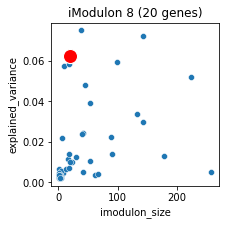

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00940     0.170228         NaN       193739     193970       1   
EQU24_RS01900     0.117956         NaN       402128     402632       1   
EQU24_RS07680     0.166254        corA      1690300    1691008      -1   
EQU24_RS19450     0.106952         NaN      4358355    4359330      -1   
EQU24_RS19455     0.123163         NaN      4360080    4360986      -1   
EQU24_RS19460     0.115946         NaN      4361052    4361754      -1   
EQU24_RS19465     0.143943         NaN      4362167    4363652      -1   
EQU24_RS19470     0.160585         NaN      4363642    4366321      -1   
EQU24_RS19475     0.178926         NaN      4366809    4368060      -1   
EQU24_RS19480     0.196406         NaN      4368064    4370446      -1   
EQU24_RS19485     0.209947         NaN      4371273    4371714      -1   
EQU24_RS19490     0.202776         NaN      4371734    4372952      -1   
EQU24_RS19495     0.209196        tadA      4373252    4375061      -1   
EQU24_RS19500     0.232251         NaN      4376070    4376724      -1   
EQU24_RS19505     0.227394         NaN      4376720    4378118      -1   
EQU24_RS19510     0.247757         NaN      4378491    4379061      -1   
EQU24_RS19515     0.257512         NaN      4379234    4379630      -1   
EQU24_RS19520     0.346286         NaN      4381327    4382239      -1   
EQU24_RS21000     0.161303         NaN      4728742    4731319       1   
EQU24_RS21005     0.144760         NaN      4731507    4732872       1   

                                                    product COG  \
locus_tag                                                         
EQU24_RS00940                          hypothetical protein   X   
EQU24_RS01900                   RNA polymerase sigma factor   K   
EQU24_RS07680                copper(I)-binding protein CorA   X   
EQU24_RS19450               DUF58 domain-containing protein   S   
EQU24_RS19455                            MoxR family ATPase   S   
EQU24_RS19460                          hypothetical protein   X   
EQU24_RS19465  type II secretion system GspH family protein   X   
EQU24_RS19470                    S8 family serine peptidase   Q   
EQU24_RS19475                          hypothetical protein   X   
EQU24_RS19480                        DUF3438 family protein   N   
EQU24_RS19485                          hypothetical protein   X   
EQU24_RS19490     type II secretion system F family protein   U   
EQU24_RS19495                  ATPase, T2SS/T4P/T4SS family   N   
EQU24_RS19500                          hypothetical protein   X   
EQU24_RS19505                          hypothetical protein   X   
EQU24_RS19510             DUF2939 domain-containing protein   X   
EQU24_RS19515                          hypothetical protein   X   
EQU24_RS19520              type II secretion system protein   X   
EQU24_RS21000                   multiheme c-type cytochrome   G   
EQU24_RS21005                PxKF domain-containing protein   X   

                                                        cog_name  tu_id  \
locus_tag                                                                 
EQU24_RS00940                                  No COG annotation    111   
EQU24_RS01900                                      Transcription    239   
EQU24_RS07680                                  No COG annotation    870   
EQU24_RS19450                                   Function unknown   2188   
EQU24_RS19455                                   Function unknown   2189   
EQU24_RS19460                                  No COG annotation   2190   
EQU24_RS19465                                  No COG annotation   2191   
EQU24_RS19470  Secondary metabolites biosynthesis, transport,...   2191   
EQU24_RS19475                                  No COG annotation   2192   
EQU24_RS19480                                      Cell motility   2192   
EQU24_RS194

In [190]:
imod_info(8)

In [191]:
view_imod_weights_on_genome(ica_data,8)

alt.Chart(...)

In [192]:
#ica_data.imodulon_table.loc[8,'category'] = 'functional'
ica_data.imodulon_table.loc[8,'function'] = 'cu-repression/secretion/alexey-gene-cluster_EW'

# for cluster matching 8
#ica_data.change_threshold(8, 0.14)


In [193]:
ica_data.imodulon_table.head(10)

single_gene  imodulon_size  explained_variance         category  \
0            NaN             91            0.014136  uncharacterized   
1            NaN             41            0.005137  uncharacterized   
SG_1        True             62            0.003533      single_gene   
3            NaN            178            0.013264  uncharacterized   
4            NaN              9            0.057266  uncharacterized   
5            NaN            223            0.052252  uncharacterized   
6            NaN             99            0.059165  uncharacterized   
7            NaN              8            0.004512  uncharacterized   
8            NaN             20            0.062186  uncharacterized   
SG_2        True              1            0.006651      single_gene   

                                               function  
0                                            unclear_EW  
1                            upMeOH|maybe_transport?_EW  
SG_1                                         sg-tonB_EW  
3     sulfate transport/FM23_TR3_QC-outlier-response_EW  
4                                       smmo_cluster_EW  
5                              ribosomal/translation_EW  
6                                       SOS-response_EW  
7                    outlier-response-FM34_T6_TR3_QC_EW  
8        cu-repression/secretion/alexey-gene-cluster_EW  
SG_2                                                NaN

## iMod 9

iModulon SG_2


alt.LayerChart(...)

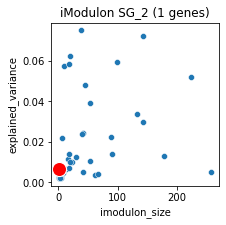

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS17330     0.736011         NaN      3884125    3884449      -1   

                                                     product COG  \
locus_tag                                                          
EQU24_RS17330  (2Fe-2S) ferredoxin domain-containing protein   C   

                                       cog_name  tu_id  \
locus_tag                                                
EQU24_RS17330  Energy production and conversion   1950   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS17330  EQU24_RS17330 // EQU24_RS17325  WP_017842361.1          ||None   

              specific_gos_n specific_gos  
locus_tag                                  
EQU24_RS17330            NaN           []

In [195]:
imod_info("SG_2")

In [196]:
ica_data.imodulon_table.loc["SG_2",'function'] = 'sg-ferredoxin_domain_EW'


## iMod 10

iModulon 10


alt.LayerChart(...)

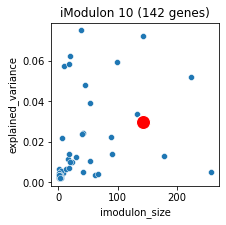

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
6        10     NaN  0.000005  0.001115   0.035211  0.555556  0.066225  5.0   
7        10     NaN  0.000141  0.016484   0.028169  0.444444  0.052980  4.0   

   target_set_size  imodulon_size        source annotation pathway_name  \
6              9.0          142.0  KEGG modules     M00258          NaN   
7              9.0          142.0  KEGG modules     M00742          NaN   

  module_name  
6         NaN  
7         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00090     0.044031        thyA        22412      23246       1   
EQU24_RS00095     0.065183         NaN        23251      23782      -1   
EQU24_RS00160     0.038800         NaN        36419      36716      -1   
EQU24_RS00190    -0.036675         NaN        42656      42884      -1   
EQU24_RS00450     0.043507         NaN        95639      95957       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22375     0.037389         NaN      2374461    2374611       1   
EQU24_RS22430     0.063297         NaN      3044768    3045017       1   
EQU24_RS22495    -0.039704         NaN      3592689    3592968      -1   
EQU24_RS22905     0.045327         NaN      1352804    1353026      -1   
EQU24_RS23040    -0.036917         NaN      3277868    3278099      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00090                               thymidylate synthase   F   
EQU24_RS00095  nucleoside triphosphate pyrophosphohydrolase f...   X   
EQU24_RS00160                               hypothetical protein   X   
EQU24_RS00190                               hypothetical protein   X   
EQU24_RS00450                   phosphoribosyl-ATP diphosphatase   E   
...                                                          ...  ..   
EQU24_RS22375                               hypothetical protein   X   
EQU24_RS22430                               hypothetical protein   X   
EQU24_RS22495                               hypothetical protein   X   
EQU24_RS22905                               hypothetical protein   X   
EQU24_RS23040                               hypothetical protein   X   

                                          cog_name  tu_id  \
locus_tag                                                   
EQU24_RS00090  Nucleotide transport and metabolism      9   
EQU24_RS00095                    No COG annotation     10   
EQU24_RS00160                    No COG annotation     17   
EQU24_RS00190                    No COG annotation     23   
EQU24_RS00450  Amino acid transport and metabolism     51   
...                                            ...    ...   
EQU24_RS22375                    No COG annotation   2522   
EQU24_RS22430                    No COG annotation   2530   
EQU24_RS22495                    No COG annotation   1804   
EQU24_RS22905                    No COG annotation   2567   
EQU24_RS23040                    No COG annotation   2578   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00090                                        thyA // lgt   
EQU24_RS00095                                      EQU24_RS00095   
EQU24_RS00160                                      EQU24_RS00160   
EQU24_RS00190                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
...                                                          ...   
EQU24_RS22375                     EQU24_RS22375 // EQU24_RS10675   
EQU24_RS22430                                      EQU24_RS22430   
EQU24_RS22495  EQU24_RS16000 // EQU24_RS15995 // EQU24_RS2250...   
EQU24_RS22905                                      EQU24_RS22905   
EQU24_RS23040                                      EQU24_RS23040   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00090  WP_017841458.1      thyA||thyA   
EQU24_RS00095  WP_017841457.1          ||None   
EQU24_RS00160  WP_017841445.1          ||None   
EQU24_RS00190  WP_138767047.1          ||None   
EQU24_RS00450  WP_017841397.1          ||None   
...                       ...             ...   
EQU24_RS22375  WP_175421678.1          ||Non

In [197]:
imod_info(10)

In [199]:
inspect_more(10)
view_imod_weights_on_genome(ica_data,10)

thymidylate synthase
['dTTP biosynthetic process' 'dTMP biosynthetic process'
 'thymidylate synthase activity' 'cytoplasm' 'methylation']
nucleoside triphosphate pyrophosphohydrolase family protein
['hydrolase activity']
hypothetical protein
['membrane']
hypothetical protein
['transposase activity' 'DNA binding' 'transposition, DNA-mediated']
phosphoribosyl-ATP diphosphatase
['phosphoribosyl-ATP diphosphatase activity'
 'carboxylic acid biosynthetic process'
 'carboxylic acid metabolic process' 'pyrophosphatase activity'
 'ATP binding']
type II toxin-antitoxin system HipA family toxin
['phosphorylation' 'kinase activity']
helix-turn-helix domain-containing protein
['DNA binding']
hypothetical protein
[]
beta-ketoacyl-ACP synthase
['3-oxoacyl-[acyl-carrier-protein] synthase activity'
 '3-oxoacyl-[acyl-carrier-protein] synthase activity']
DUF504 domain-containing protein
[]
MotA/TolQ/ExbB proton channel family protein
['protein transport' 'integral component of membrane']
energy transduc

alt.Chart(...)

In [200]:
ica_data.imodulon_table.loc[10,'function'] = 'fatty-acid-beta-oxidation/membrane?_EW'


## iMod 11

iModulon 11


alt.LayerChart(...)

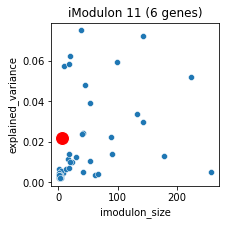

imodulon                                           go_name        pvalue  \
27        11  alcohol dehydrogenase (cytochrome c(L)) activity  1.717405e-06   
7         11                                               NaN  1.714118e-05   
8         11                                               NaN  1.126270e-04   
9         11                                               NaN  4.673853e-04   
6         11                                               NaN  7.809565e-07   
8         11                                               NaN  8.261615e-05   

      qvalue  precision    recall   f1score   TP  target_set_size  \
27  0.003674   0.333333  1.000000  0.500000  2.0              6.0   
7   0.001817   0.333333  0.400000  0.363636  2.0              5.0   
8   0.026355   0.333333  0.166667  0.222222  2.0             12.0   
9   0.024771   0.333333  0.083333  0.133333  2.0             24.0   
6   0.000166   0.666667  0.061538  0.112676  4.0             65.0   
8   0.005838   0.666667  0.019231  0.037383  4.0            208.0   

    imodulon_size         source annotation  \
27            6.0             GO        NaN   
7             6.0  KEGG pathways   map00625   
8             6.0   KEGG modules     M00174   
9             6.0  KEGG pathways   map00010   
6             6.0  KEGG pathways   map00680   
8             6.0  KEGG pathways   map01120   

                                    pathway_name  \
27                                           NaN   
7      Chloroalkane and chloroalkene degradation   
8                                            NaN   
9                   Glycolysis / Gluconeogenesis   
6                             Methane metabolism   
8   Microbial metabolism in diverse environments   

                                          module_name  
27                                                NaN  
7                                                 NaN  
8   Methane oxidation, methanotroph, methane => fo...  
9                                                 NaN  
6                                                 NaN  
8                                                 NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS18110     0.251502        mxaS      4038027    4038882      -1   
EQU24_RS18120     0.253565        moxR      4040146    4041163      -1   
EQU24_RS18125     0.309174        moxI      4041358    4041643      -1   
EQU24_RS18130     0.334363        moxG      4041660    4042134      -1   
EQU24_RS18135     0.336796        moxJ      4042150    4042996      -1   
EQU24_RS18140     0.342016        moxF      4043061    4044870      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS18110                                       MxaS protein   S   
EQU24_RS18120                                 MoxR family ATPase   S   
EQU24_RS18125      methanol dehydrogenase [cytochrome c] subunit   M   
EQU24_RS18130                       cytochrome c(L), periplasmic   C   
EQU24_RS18135             methanol oxidation system protein MoxJ   E   
EQU24_RS18140  methanol/ethanol family PQQ-dependent dehydrog...   G   

                                             cog_name  tu_id  \
locus_tag                                                      
EQU24_RS18110                        Function unknown   2028   
EQU24_RS18120                        Function unknown   2029   
EQU24_RS18125  Cell wall/membrane/envelope biogenesis   2030   
EQU24_RS18130        Energy production and conversion   2030   
EQU24_RS18135     Amino acid transport and metabolism   2030   
EQU24_RS18140   Carbohydrate transport and metabolism   2031   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS18110  EQU24_RS18115 // EQU24_RS18110  WP_017842211.1          ||None   
EQU24_RS18120                   EQU24_RS18120  WP_017842209.1          ||None   
EQU24_RS18125   moxJ // moxG // EQU24_RS18125  WP_017842208.1          ||None   
EQU24_RS18130   moxJ // moxG // EQU24_RS18125  WP_017842207.1      moxG||moxG   
EQU24_RS18135   moxJ // moxG // EQU24_RS18125  WP_017842206.1      moxJ||moxJ   
EQU24_RS18140                   EQU24_RS18140  WP_017842205.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS18110                                                NaN   
EQU24_RS18120               ATP hydrolysis activity\nATP binding   
EQU24_RS18125  methanol oxidation\nalcohol dehydrogenase (NAD...   
EQU24_RS18130  iron ion binding\nheme binding\nelectron trans...   
EQU24_RS18135      methanol catabolic process\nperiplasmic space   
EQU24_RS18140  calcium ion binding\nalcohol dehydrogenase (cy...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS18110                                                 []  
EQU24_RS18120          ['ATP hydrolysis activity' 'ATP binding']  
EQU24_RS18125  ['methanol oxidation' 'alcohol dehydrogenase (...  
EQU24_RS18130  ['iron ion binding' 'heme binding' 'electron t...  
EQU24_RS18135  ['methanol catabolic process' 'periplasmic spa...  
EQU24_RS18140  ['calcium ion binding' 'alcohol dehydrogenase ...

In [201]:
imod_info(11)

In [202]:
ica_data.imodulon_table.loc[11,'function'] = 'mxa-gene-cluster_EW'


## iMod 12

iModulon 12


alt.LayerChart(...)

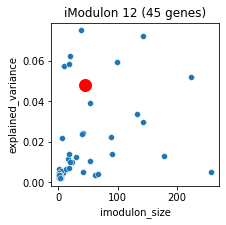

imodulon                                  go_name        pvalue  \
10        12                                      NaN  2.524814e-15   
9         12                                      NaN  1.031777e-08   
12        12                                      NaN  2.758484e-07   
11        12                                      NaN  1.676208e-11   
28        12                               chemotaxis  2.489809e-07   
10        12                                      NaN  1.166585e-06   
30        12                      signal transduction  2.326251e-05   
29        12  phosphorelay signal transduction system  2.812480e-05   

          qvalue  precision    recall   f1score    TP  target_set_size  \
10  5.352605e-13   0.311111  0.205882  0.247788  14.0             68.0   
9   2.414357e-06   0.155556  0.250000  0.191781   7.0             28.0   
12  1.949329e-05   0.133333  0.222222  0.166667   6.0             27.0   
11  1.776780e-09   0.311111  0.112000  0.164706  14.0            125.0   
28  5.325702e-04   0.155556  0.162791  0.159091   7.0             43.0   
10  1.364905e-04   0.066667  1.000000  0.125000   3.0              3.0   
30  2.005298e-02   0.155556  0.084337  0.109375   7.0             84.0   
29  2.005298e-02   0.200000  0.058442  0.090452   9.0            154.0   

    imodulon_size         source annotation          pathway_name module_name  
10           45.0  KEGG pathways   map02030  Bacterial chemotaxis         NaN  
9            45.0   KEGG modules     M00506                   NaN         NaN  
12           45.0  KEGG pathways   map00910   Nitrogen metabolism         NaN  
11           45.0  KEGG pathways   map02020  Two-component system         NaN  
28           45.0             GO        NaN                   NaN         NaN  
10           45.0   KEGG modules     M00438                   NaN         NaN  
30           45.0             GO        NaN                   NaN         NaN  
29           45.0             GO        NaN                   NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS02975    -0.061362         NaN       635255     635465       1   
EQU24_RS03640     0.072545         NaN       780870     782136       1   
EQU24_RS04700     0.065711         NaN       989867     992348       1   
EQU24_RS05260    -0.060572         NaN      1119640    1119949       1   
EQU24_RS05720     0.060994         NaN      1237807    1239430       1   
EQU24_RS05735    -0.064192         NaN      1240694    1241078       1   
EQU24_RS07240     0.066867         NaN      1596550    1597597       1   
EQU24_RS09010     0.066537         NaN      1991857    1992667      -1   
EQU24_RS10515     0.110201         NaN      2336585    2336855      -1   
EQU24_RS10520     0.130486         NaN      2336917    2337478      -1   
EQU24_RS10525     0.117511         NaN      2337487    2340502      -1   
EQU24_RS10530     0.171123         NaN      2340582    2342751      -1   
EQU24_RS10535     0.177768         NaN      2342747    2343071      -1   
EQU24_RS10540     0.156106         NaN      2343082    2343451      -1   
EQU24_RS10550     0.116979         NaN      2345694    2347200       1   
EQU24_RS10565     0.070910         NaN      2351540    2352749      -1   
EQU24_RS10570     0.058109         NaN      2353008    2355159      -1   
EQU24_RS10575     0.078088         NaN      2355155    2356262      -1   
EQU24_RS10580     0.103869         NaN      2356465    2357308      -1   
EQU24_RS10600     0.060711         NaN      2359547    2359961      -1   
EQU24_RS10605     0.083720         NaN      2359954    2360374      -1   
EQU24_RS10610     0.087728         NaN      2360377    2360764      -1   
EQU24_RS10615     0.074239         NaN      2360760    2361636      -1   
EQU24_RS10625     0.079962         NaN      2363007    2363382      -1   
EQU24_RS10630     0.093700         NaN      2363383    2363632      -1   
EQU24_RS10635     0.085537         NaN      2363631    2366004      -1   
EQU24_RS10640     0.097711         NaN      2366000    2366372      -1   
EQU24_RS10645     0.115480         NaN      2366368    2367211      -1   
EQU24_RS10650     0.111515         NaN      2367223    2367862      -1   
EQU24_RS10655     0.145301        cheB      2368179    2369232      -1   
EQU24_RS10660     0.156204         NaN      2369285    2370884      -1   
EQU24_RS10665     0.179992         NaN      2370914    2372834      -1   
EQU24_RS12620     0.065352         NaN      2831096    2832494       1   
EQU24_RS12625     0.063797         NaN      2832638    2833655       1   
EQU24_RS12630     0.065783         NaN      2833668    2835429       1   
EQU24_RS12635     0.088085         NaN      2835543    2836815       1   
EQU24_RS12640     0.092060         NaN      2836893    2838117       1   
EQU24_RS12645     0.092089         NaN      2838125    2840795       1   
EQU24_RS12650     0.066484         NaN      2840909    2841323       1   
EQU24_RS16195    -0.096565         NaN      3638287    3638482       1   
EQU24_RS19140    -0.064600         NaN      4280475    4281051       1   
EQU24_RS22195     0.088873         NaN       390386     390539       1   
EQU24_RS22445    -0.058803         NaN      3126442    3126616      -1   
EQU24_RS22955     0.103287         NaN      2336165    2336513       1   
EQU24_RS22965     0.087868         NaN      2361767    2362991      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS02975                               hypothetical protein   X   
EQU24_RS03640                               hypothetical protein   E   
EQU24_RS04700         glycogen/starch/alpha-glucan phosphorylase   G   
EQU24_RS05260                                  c-type cytochrome   C   
EQU24_RS05720            SulP family inorganic anion transporter   U   
EQU24_RS05735                   

In [203]:
imod_info(12)

In [204]:
view_imod_weights_on_genome(ica_data,12)

alt.Chart(...)

In [205]:
ica_data.imodulon_table.loc[12,'function'] = 'chemotaxis/signal-transduction/highest-exp-var_EW'


## iMod 13

iModulon 13


alt.LayerChart(...)

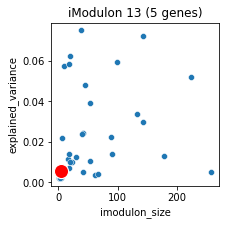

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS10965     0.214091         NaN      2446321    2446762      -1   
EQU24_RS16370     0.272439         NaN      3676994    3677465      -1   
EQU24_RS16380     0.204325         NaN      3678261    3678483      -1   
EQU24_RS22515     0.500468         NaN      3885805    3885958      -1   
EQU24_RS22585     0.445794         NaN      4420667    4420814       1   

                                                  product COG  \
locus_tag                                                       
EQU24_RS10965                          phage tail protein   S   
EQU24_RS16370  helix-turn-helix domain-containing protein   X   
EQU24_RS16380                        hypothetical protein   X   
EQU24_RS22515                        hypothetical protein   X   
EQU24_RS22585                        hypothetical protein   X   

                        cog_name  tu_id  \
locus_tag                                 
EQU24_RS10965   Function unknown   1226   
EQU24_RS16370  No COG annotation   1846   
EQU24_RS16380  No COG annotation   1848   
EQU24_RS22515  No COG annotation   1951   
EQU24_RS22585  No COG annotation   2545   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS10965  EQU24_RS10970 // EQU24_RS10965 // EQU24_RS1096...   
EQU24_RS16370                     EQU24_RS16370 // EQU24_RS16365   
EQU24_RS16380                                      EQU24_RS16380   
EQU24_RS22515     nifV // EQU24_RS22515 // cysE // EQU24_RS17335   
EQU24_RS22585                                      EQU24_RS22585   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS10965  WP_014148651.1          ||None   
EQU24_RS16370  WP_017842551.1          ||None   
EQU24_RS16380  WP_017842548.1          ||None   
EQU24_RS22515  WP_017842358.1          ||None   
EQU24_RS22585  WP_017841924.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS10965  acyltransferase activity\nstructural molecule ...   
EQU24_RS16370                                        DNA binding   
EQU24_RS16380                                                NaN   
EQU24_RS22515                                                NaN   
EQU24_RS22585                                                NaN   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS10965  ['acyltransferase activity' 'structural molecu...  
EQU24_RS16370                                    ['DNA binding']  
EQU24_RS16380                                                 []  
EQU24_RS22515                                                 []  
EQU24_RS22585                                                 []

In [206]:
imod_info(13)

In [207]:
view_imod_weights_on_genome(ica_data,13)

alt.Chart(...)

In [208]:
ica_data.imodulon_table.loc[13,'function'] = 'unclear_EW'


## iMod 14

iModulon 14


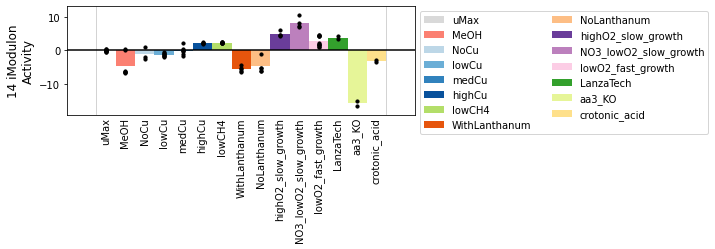

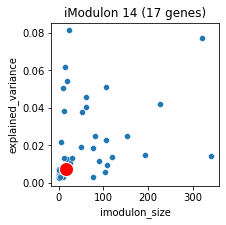

imodulon go_name        pvalue    qvalue  precision    recall   f1score  \
4         14     NaN  5.460031e-08  0.000019   0.176471  1.000000  0.300000   
5         14     NaN  2.178565e-07  0.000037   0.176471  0.750000  0.285714   
6         14     NaN  1.532813e-05  0.001042   0.117647  1.000000  0.210526   
7         14     NaN  1.532813e-05  0.001042   0.117647  1.000000  0.210526   
8         14     NaN  1.532813e-05  0.001042   0.117647  1.000000  0.210526   
1         14     NaN  9.153250e-05  0.023158   0.117647  0.500000  0.190476   
9         14     NaN  3.180877e-04  0.018025   0.117647  0.285714  0.166667   
10        14     NaN  1.164749e-03  0.056574   0.117647  0.153846  0.133333   

     TP  target_set_size  imodulon_size         source annotation  \
4   3.0              3.0           17.0   KEGG modules     M00641   
5   3.0              4.0           17.0   KEGG modules     M00769   
6   2.0              2.0           17.0   KEGG modules     M00698   
7   2.0              2.0           17.0   KEGG modules     M00767   
8   2.0              2.0           17.0   KEGG modules     M00768   
1   2.0              4.0           17.0  KEGG pathways   map00909   
9   2.0              7.0           17.0   KEGG modules     M00155   
10  2.0             13.0           17.0   KEGG modules     M00096   

                                     pathway_name  \
4                                             NaN   
5                                             NaN   
6                                             NaN   
7                                             NaN   
8                                             NaN   
1   Sesquiterpenoid and triterpenoid biosynthesis   
9                                             NaN   
10                                            NaN   

                                          module_name  
4        Multidrug resistance, efflux pump MexEF-OprN  
5        Multidrug resistance, efflux pump MexPQ-OpmE  
6        Multidrug resistance, efflux pump BpeEF-OprC  
7                                                 NaN  
8                                                 NaN  
1                                                 NaN  
9                   Cytochrome c oxidase, prokaryotes  
10  C5 isoprenoid biosynthesis, non-mevalonate pat...

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS01670    -0.105474         NaN       352356     352530      -1   
EQU24_RS08770     0.101588         NaN      1943066    1944929      -1   
EQU24_RS08775     0.127834         NaN      1944983    1946624      -1   
EQU24_RS08780     0.130455         NaN      1946634    1946991      -1   
EQU24_RS08785     0.119338         NaN      1947024    1949652      -1   
EQU24_RS10820     0.127015         NaN      2404406    2405621       1   
EQU24_RS10825     0.138752         NaN      2405627    2408813       1   
EQU24_RS10830     0.107035         NaN      2408812    2410279       1   
EQU24_RS14125     0.354348        ctaD      3155695    3157312      -1   
EQU24_RS14130     0.236214        coxB      3157364    3158534      -1   
EQU24_RS15350     0.108794         NaN      3430275    3430890      -1   
EQU24_RS15355     0.121406        hpnH      3431505    3432618      -1   
EQU24_RS15360     0.116492         NaN      3433090    3434191       1   
EQU24_RS15365     0.122518         shc      3434201    3436160       1   
EQU24_RS15370     0.104551         NaN      3436156    3436861       1   
EQU24_RS17690     0.089206         NaN      3946386    3948090      -1   
EQU24_RS18390     0.107607         NaN      4104697    4105996       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS01670                  DUF2292 domain-containing protein   X   
EQU24_RS08770            1-deoxy-D-xylulose-5-phosphate synthase   H   
EQU24_RS08775                          copper resistance protein   P   
EQU24_RS08780                     copper resistance protein CopC   S   
EQU24_RS08785                            MMPL family transporter   S   
EQU24_RS10820  efflux RND transporter periplasmic adaptor sub...   M   
EQU24_RS10825  multidrug efflux RND transporter permease subunit   V   
EQU24_RS10830          efflux transporter outer membrane subunit   M   
EQU24_RS14125                     cytochrome c oxidase subunit I   C   
EQU24_RS14130                    cytochrome c oxidase subunit II   C   
EQU24_RS15350  hopanoid biosynthesis associated membrane prot...   Q   
EQU24_RS15355                   adenosyl-hopene transferase HpnH   S   
EQU24_RS15360          phytoene/squalene synthase family protein   I   
EQU24_RS15365                           squalene--hopene cyclase   I   
EQU24_RS15370                                      phosphorylase   F   
EQU24_RS17690                                          flagellin   N   
EQU24_RS18390                                        transposase   L   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS01670                                  No COG annotation   
EQU24_RS08770                  Coenzyme transport and metabolism   
EQU24_RS08775             Inorganic ion transport and metabolism   
EQU24_RS08780                                   Function unknown   
EQU24_RS08785                                   Function unknown   
EQU24_RS10820             Cell wall/membrane/envelope biogenesis   
EQU24_RS10825                                 Defense mechanisms   
EQU24_RS10830             Cell wall/membrane/envelope biogenesis   
EQU24_RS14125                   Energy production and conversion   
EQU24_RS14130                   Energy production and conversion   
EQU24_RS15350  Secondary metabolites biosynthesis, transport,...   
EQU24_RS15355                                   Function unknown   
EQU24_RS15360                     Lipid transport and metabolism   
EQU24_RS15365                     Lipid transport and metabolism   
EQU24_RS15370                Nucleotide transport and metabolism   
EQU24_RS17690                                      Cell motility   
EQU24_RS18390  

In [50]:
imod_info(14)

In [51]:
ica_data.imodulon_table.loc[14,'function'] = 'multi-drug-resistance/transport/efflux-pump/low-activity-aa3KO_EW'


## iMod 15

iModulon 15


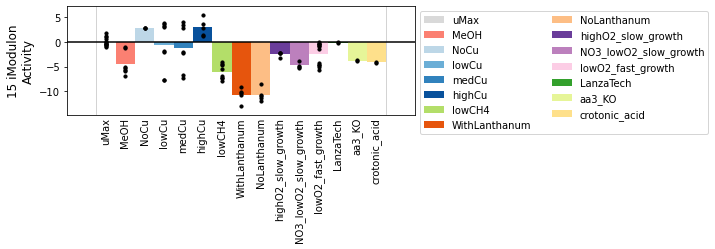

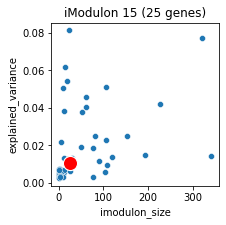

imodulon                                         go_name        pvalue  \
17         15                                response to heat  9.455494e-20   
21         15  chaperone cofactor-dependent protein refolding  1.595743e-13   
23         15    'de novo' post-translational protein folding  1.595743e-13   
20         15                        unfolded protein binding  1.866999e-14   
25         15                       'de novo' protein folding  1.900091e-12   
..        ...                                             ...           ...   
89         15                              biological_process  1.863006e-04   
129        15                              catalytic activity  2.353712e-03   
102        15                              molecular_function  4.151138e-04   
124        15                                cellular process  2.101139e-03   
111        15                                             NaN  7.131036e-04   

           qvalue  precision    recall   f1score    TP  target_set_size  \
17   3.879589e-16       0.48  0.333333  0.393443  12.0             36.0   
21   9.353331e-11       0.24  0.857143  0.375000   6.0              7.0   
23   9.353331e-11       0.24  0.857143  0.375000   6.0              7.0   
20   1.915075e-11       0.32  0.444444  0.372093   8.0             18.0   
25   8.662306e-10       0.24  0.666667  0.352941   6.0              9.0   
..            ...        ...       ...       ...   ...              ...   
89   1.087283e-02       0.60  0.014354  0.028037  15.0           1045.0   
129  8.546266e-02       0.44  0.014455  0.027990  11.0            761.0   
102  1.980479e-02       0.56  0.014242  0.027778  14.0            983.0   
124  7.909151e-02       0.48  0.013714  0.026667  12.0            875.0   
111  3.079857e-02       0.60  0.012821  0.025105  15.0           4717.0   

     imodulon_size source annotation pathway_name module_name  
17            25.0     GO        NaN          NaN         NaN  
21            25.0     GO        NaN          NaN         NaN  
23            25.0     GO        NaN          NaN         NaN  
20            25.0     GO        NaN          NaN         NaN  
25            25.0     GO        NaN          NaN         NaN  
..             ...    ...        ...          ...         ...  
89            25.0     GO        NaN          NaN         NaN  
129           25.0     GO        NaN          NaN         NaN  
102           25.0     GO        NaN          NaN         NaN  
124           25.0     GO        NaN          NaN         NaN  
111           25.0     GO        NaN          NaN         NaN  

[121 rows x 14 columns]

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00205    -0.078947         NaN        44526      46077      -1   
EQU24_RS00670     0.095130         NaN       139733     140330       1   
EQU24_RS01215    -0.124356         NaN       244910     246461      -1   
EQU24_RS05870     0.093900         NaN      1279697    1281167       1   
EQU24_RS05880     0.091203         NaN      1282606    1282858       1   
EQU24_RS08645     0.142696        moeB      1914913    1915657      -1   
EQU24_RS08650     0.246743        groS      1915795    1916083       1   
EQU24_RS08655     0.246046        groL      1916139    1917798       1   
EQU24_RS08660     0.168892         NaN      1917885    1918140       1   
EQU24_RS09050    -0.087897         NaN      2000662    2002213       1   
EQU24_RS10960    -0.100388         NaN      2446125    2446314      -1   
EQU24_RS11455     0.085470        htpX      2563075    2563951       1   
EQU24_RS11535     0.133408        dapB      2577532    2578339      -1   
EQU24_RS11540     0.141436        dnaJ      2578344    2579490      -1   
EQU24_RS11545     0.152183        dnaK      2579645    2581580      -1   
EQU24_RS11550     0.143625        grpE      2581650    2582298      -1   
EQU24_RS11555     0.109762        hrcA      2582366    2583410      -1   
EQU24_RS12230     0.082408         NaN      2735910    2736594      -1   
EQU24_RS12235     0.111370         NaN      2737260    2737698      -1   
EQU24_RS14075     0.088590        rpoH      3147329    3148196      -1   
EQU24_RS15660     0.125544        clpB      3516860    3519440      -1   
EQU24_RS17820     0.158132        groL      3981192    3982815      -1   
EQU24_RS17825     0.175120        groS      3982853    3983144      -1   
EQU24_RS17880     0.183340        htpG      3997666    3999586       1   
EQU24_RS21025     0.079301         NaN      4737566    4738922      -1   

                                                       product COG  \
locus_tag                                                            
EQU24_RS00205                          IS66 family transposase   L   
EQU24_RS00670                             hypothetical protein   X   
EQU24_RS01215                          IS66 family transposase   L   
EQU24_RS05870                             hypothetical protein   C   
EQU24_RS05880                             hypothetical protein   X   
EQU24_RS08645  molybdopterin-synthase adenylyltransferase MoeB   H   
EQU24_RS08650                               co-chaperone GroES   O   
EQU24_RS08655                                 chaperonin GroEL   O   
EQU24_RS08660                        transcriptional regulator   K   
EQU24_RS09050                          IS66 family transposase   L   
EQU24_RS10960                             hypothetical protein   X   
EQU24_RS11455                                    protease HtpX   O   
EQU24_RS11535       4-hydroxy-tetrahydrodipicolinate reductase   E   
EQU24_RS11540                         molecular chaperone DnaJ   O   
EQU24_RS11545                         molecular chaperone DnaK   O   
EQU24_RS11550                  nucleotide exchange factor GrpE   O   
EQU24_RS11555    heat-inducible transcriptional repressor HrcA   K   
EQU24_RS12230                                    peptidase M15   M   
EQU24_RS12235            Hsp20/alpha crystallin family protein   O   
EQU24_RS14075                 RNA polymerase sigma factor RpoH   K   
EQU24_RS15660                     ATP-dependent chaperone ClpB   O   
EQU24_RS17820                                 chaperonin GroEL   O   
EQU24_RS17825                               co-chaperone GroES   O   
EQU24_RS17880                         molecular chaperone HtpG   O   
EQU24_RS21025                  DegQ family serine endoprotease   O   

                                                        cog_name  \
locus_tag                                                

In [52]:
imod_info(15)

In [53]:
ica_data.imodulon_table.loc[15,'function'] = 'groEL/ES-post-translation-mod_EW'


## iMod 16

iModulon 16


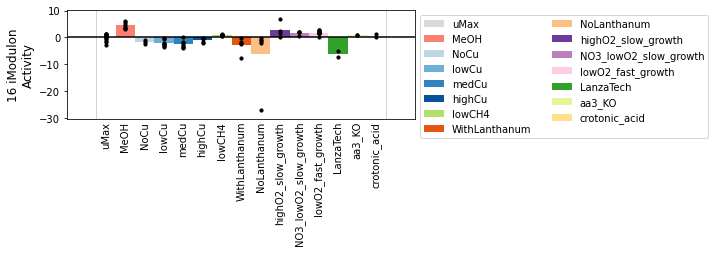

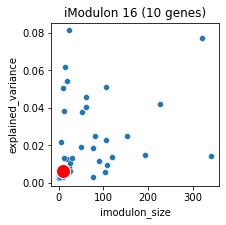

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00075    -0.139476        tatB        19487      19799       1   
EQU24_RS00185     0.172491         NaN        42145      42478      -1   
EQU24_RS01150     0.192288         NaN       234038     234461       1   
EQU24_RS01765     0.184051         NaN       371879     372134      -1   
EQU24_RS05320     0.169224        cobS      1131915    1132662      -1   
EQU24_RS06205     0.147534         NaN      1352804    1353026      -1   
EQU24_RS08455     0.161118        urtB      1866865    1867792       1   
EQU24_RS09570     0.136470         NaN      2126800    2127205       1   
EQU24_RS11970     0.165055         NaN      2677956    2678349      -1   
EQU24_RS14755     0.217919         NaN      3300040    3300526      -1   

                                                  product COG  \
locus_tag                                                       
EQU24_RS00075      twin-arginine translocase subunit TatB   U   
EQU24_RS00185                        hypothetical protein   L   
EQU24_RS01150                        hypothetical protein   X   
EQU24_RS01765            DUF504 domain-containing protein   A   
EQU24_RS05320  adenosylcobinamide-GDP ribazoletransferase   H   
EQU24_RS06205                        hypothetical protein   X   
EQU24_RS08455  urea ABC transporter permease subunit UrtB   E   
EQU24_RS09570                        hypothetical protein   X   
EQU24_RS11970                        hypothetical protein   Q   
EQU24_RS14755       hemerythrin domain-containing protein   S   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00185              Replication, recombination and repair   
EQU24_RS01150                                  No COG annotation   
EQU24_RS01765                    RNA processing and modification   
EQU24_RS05320                  Coenzyme transport and metabolism   
EQU24_RS06205                                  No COG annotation   
EQU24_RS08455                Amino acid transport and metabolism   
EQU24_RS09570                                  No COG annotation   
EQU24_RS11970  Secondary metabolites biosynthesis, transport,...   
EQU24_RS14755                                   Function unknown   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00075     A0A4P9UII1   2822   
EQU24_RS00185     A0A4P9UIJ4   2806   
EQU24_RS01150     A0A4P9UIU6   2671   
EQU24_RS01765     A0A4P9ULU4   2590   
EQU24_RS05320     A0A4P9UMQ7   2166   
EQU24_RS06205            NaN   2050   
EQU24_RS08455     A0A4V1IJQ9   1762   
EQU24_RS09570  UPI00034DDA72   1616   
EQU24_RS11970     A0A4P9URC2   1322   
EQU24_RS14755     A0A4P9UPL3    966   

                                                      tu_name    ncbi_protein  \
locus_tag                                                                       
EQU24_RS00075                                    tatB // tatA  WP_017841462.1   
EQU24_RS00185                                   EQU24_RS00185  WP_017841440.1   
EQU24_RS01150                                   EQU24_RS01150  WP_017841268.1   
EQU24_RS01765                                   EQU24_RS01765  WP_017841154.1   
EQU24_RS05320  cobS // cobC // EQU24_RS05310 // EQU24_RS05305  WP_017840486.1   
EQU24_RS06205                                   EQU24_RS06205             NaN   
EQU24_RS08455   EQU24_RS08475 // urtE // urtD // urtC // urtB  WP_017839901.1   
EQU24_RS09570                                   EQU24_RS09570  WP_138767143.1   
EQU24_RS11970                  EQU24_RS11970 // EQU24_RS11965  WP_051056233.1   
EQU24_RS14755                                   EQU24_RS14755  WP_017838763.1   

              gene_name_extra  \
locus_tag                       
EQU24_RS00075      t

In [54]:
imod_info(16)

In [55]:
ica_data.imodulon_table.loc[16,'function'] = 'unclear/outlier-response-vial-woLa_EW'


## iMod 17

iModulon 17


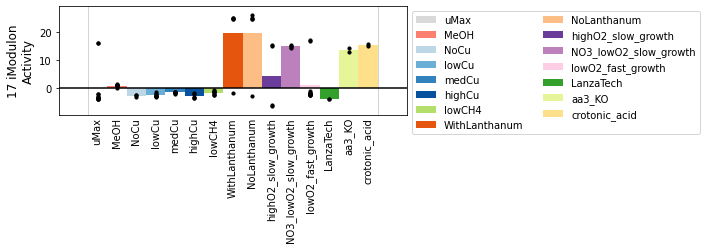

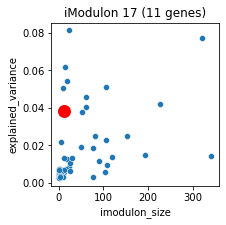

imodulon                      go_name        pvalue    qvalue  precision  \
132        17         transposase activity  2.056164e-09  0.000005   0.545455   
133        17  transposition, DNA-mediated  2.547796e-09  0.000005   0.545455   
134        17                  DNA binding  1.514139e-07  0.000207   0.727273   

       recall   f1score   TP  target_set_size  imodulon_size source  \
132  0.105263  0.176471  6.0             57.0           11.0     GO   
133  0.101695  0.171429  6.0             59.0           11.0     GO   
134  0.024691  0.047761  8.0            324.0           11.0     GO   

    annotation pathway_name module_name  
132        NaN          NaN         NaN  
133        NaN          NaN         NaN  
134        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00205     0.124992         NaN        44526      46077      -1   
EQU24_RS04160     0.148447         NaN       874502     874683      -1   
EQU24_RS05675     0.170768         NaN      1225286    1226585       1   
EQU24_RS06200     0.250665         NaN      1352012    1352726      -1   
EQU24_RS06885     0.180643         NaN      1513567    1514488      -1   
EQU24_RS12805     0.116343         NaN      2872306    2873593       1   
EQU24_RS14960     0.286558         NaN      3336399    3337698      -1   
EQU24_RS17670     0.261085         NaN      3940109    3941288       1   
EQU24_RS18390     0.201264         NaN      4104697    4105996       1   
EQU24_RS18395     0.268005         NaN      4106620    4107907      -1   
EQU24_RS20230     0.214671         NaN      4565617    4566796      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS04160                                                NaN   X   
EQU24_RS05675                                        transposase   L   
EQU24_RS06200                                        transposase   L   
EQU24_RS06885  Rpn family recombination-promoting nuclease/pu...   S   
EQU24_RS12805                             IS4 family transposase   L   
EQU24_RS14960                                        transposase   L   
EQU24_RS17670                         ISAzo13 family transposase   L   
EQU24_RS18390                                        transposase   L   
EQU24_RS18395                           ISNCY family transposase   L   
EQU24_RS20230                         ISAzo13 family transposase   L   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS00205  Replication, recombination and repair            NaN   2803   
EQU24_RS04160                      No COG annotation            NaN   2308   
EQU24_RS05675  Replication, recombination and repair  UPI00110CA81F   2119   
EQU24_RS06200  Replication, recombination and repair            NaN   2051   
EQU24_RS06885                       Function unknown     A0A4P9UQW1   1956   
EQU24_RS12805  Replication, recombination and repair            NaN   1225   
EQU24_RS14960  Replication, recombination and repair  UPI00110CA81F    942   
EQU24_RS17670  Replication, recombination and repair  UPI00110D0AC0    594   
EQU24_RS18390  Replication, recombination and repair  UPI00110CA81F    506   
EQU24_RS18395  Replication, recombination and repair  UPI001AD9057B    505   
EQU24_RS20230  Replication, recombination and repair  UPI00110D0AC0    262   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00205                                      EQU24_RS00205   
EQU24_RS04160  EQU24_RS04170 // EQU24_RS04165 // ssrS // EQU2...   
EQU24_RS05675                                      EQU24_RS05675   
EQU24_RS06200                                      EQU24_RS06200   
EQU24_RS06885                                      EQU24_RS06885   
EQU24_RS12805                                      EQU24_RS12805   
EQU24_RS14960                                      EQU24_RS14960   
EQU24_RS17670                                      EQU24_RS17670   
EQU24_RS18390                                      EQU24_RS18390   
EQU24_RS18395                                      EQU24_RS18395   
EQU24_RS20230                                      EQU24_RS20230   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00205  WP_244310896.1          ||None   
EQU24_RS04160             NaN              ||   
EQU24_RS05675  WP_1

In [56]:
imod_info(17)

In [57]:
ica_data.imodulon_table.loc[17,'function'] = 'transposase_EW'


## iMod 18

iModulon 18


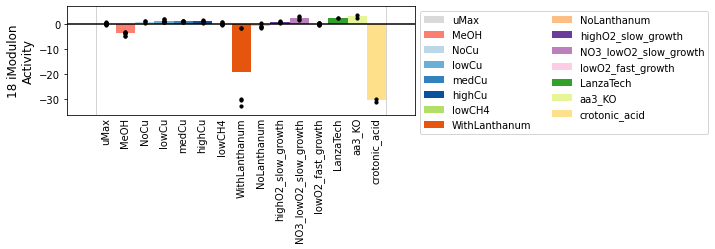

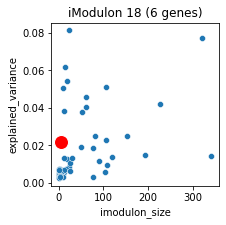

imodulon                                           go_name    pvalue  \
135        18  alcohol dehydrogenase (cytochrome c(L)) activity  0.000002   
9          18                                               NaN  0.000047   
11         18                                               NaN  0.000153   
136        18                                 periplasmic space  0.000043   
8          18                                               NaN  0.000002   
11         18                                               NaN  0.001042   
10         18                                               NaN  0.000284   

       qvalue  precision    recall   f1score   TP  target_set_size  \
135  0.006937   0.333333  1.000000  0.500000  2.0              6.0   
9    0.005965   0.333333  0.250000  0.285714  2.0              8.0   
11   0.051911   0.333333  0.142857  0.200000  2.0             14.0   
136  0.088762   0.500000  0.053571  0.096774  3.0             56.0   
8    0.000381   0.666667  0.051948  0.096386  4.0             77.0   
11   0.065929   0.333333  0.055556  0.095238  2.0             36.0   
10   0.023921   0.666667  0.013937  0.027304  4.0            287.0   

     imodulon_size         source annotation  \
135            6.0             GO        NaN   
9              6.0  KEGG pathways   map00625   
11             6.0   KEGG modules     M00174   
136            6.0             GO        NaN   
8              6.0  KEGG pathways   map00680   
11             6.0  KEGG pathways   map00010   
10             6.0  KEGG pathways   map01120   

                                     pathway_name  \
135                                           NaN   
9       Chloroalkane and chloroalkene degradation   
11                                            NaN   
136                                           NaN   
8                              Methane metabolism   
11                   Glycolysis / Gluconeogenesis   
10   Microbial metabolism in diverse environments   

                                           module_name  
135                                                NaN  
9                                                  NaN  
11   Methane oxidation, methanotroph, methane => fo...  
136                                                NaN  
8                                                  NaN  
11                                                 NaN  
10                                                 NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS18110     0.254079        mxaS      4038027    4038882      -1   
EQU24_RS18120     0.255468        moxR      4040146    4041163      -1   
EQU24_RS18125     0.308738        moxI      4041358    4041643      -1   
EQU24_RS18130     0.338676        moxG      4041660    4042134      -1   
EQU24_RS18135     0.340942        moxJ      4042150    4042996      -1   
EQU24_RS18140     0.345811        moxF      4043061    4044870      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS18110                                       MxaS protein   S   
EQU24_RS18120                                 MoxR family ATPase   S   
EQU24_RS18125                             methanol dehydrogenase   M   
EQU24_RS18130                       cytochrome c(L), periplasmic   C   
EQU24_RS18135             methanol oxidation system protein MoxJ   E   
EQU24_RS18140  PQQ-dependent dehydrogenase, methanol/ethanol ...   G   

                                             cog_name     uniprot  tu_id  \
locus_tag                                                                  
EQU24_RS18110                        Function unknown  A0A4P9UU55    545   
EQU24_RS18120                        Function unknown  A0A4P9UTL4    544   
EQU24_RS18125  Cell wall/membrane/envelope biogenesis  A0A4P9UR50    543   
EQU24_RS18130        Energy production and conversion  A0A4V1IK77    543   
EQU24_RS18135     Amino acid transport and metabolism  A0A4P9UW33    543   
EQU24_RS18140   Carbohydrate transport and metabolism  A0A4P9URC6    542   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS18110  EQU24_RS18115 // EQU24_RS18110  WP_017842211.1          ||None   
EQU24_RS18120                   EQU24_RS18120  WP_017842209.1          ||None   
EQU24_RS18125   moxJ // moxG // EQU24_RS18125  WP_017842208.1          ||None   
EQU24_RS18130   moxJ // moxG // EQU24_RS18125  WP_017842207.1      moxG||moxG   
EQU24_RS18135   moxJ // moxG // EQU24_RS18125  WP_017842206.1      moxJ||moxJ   
EQU24_RS18140                   EQU24_RS18140  WP_017842205.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS18110                                                NaN   
EQU24_RS18120  ATP hydrolysis activity\nATP binding\ncytoplas...   
EQU24_RS18125  alcohol dehydrogenase (NAD+) activity\nmethano...   
EQU24_RS18130  iron ion binding\nheme binding\nelectron trans...   
EQU24_RS18135      methanol catabolic process\nperiplasmic space   
EQU24_RS18140  calcium ion binding\nalcohol dehydrogenase (cy...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS18110                                                 []  
EQU24_RS18120  ['ATP hydrolysis activity' 'ATP binding' 'cyto...  
EQU24_RS18125  ['alcohol dehydrogenase (NAD+) activity' 'meth...  
EQU24_RS18130  ['iron ion binding' 'heme binding' 'electron t...  
EQU24_RS18135  ['methanol catabolic process' 'periplasmic spa...  
EQU24_RS18140  ['calcium ion binding' 'alcohol dehydrogenase ...

In [58]:
imod_info(18)

In [59]:
ica_data.imodulon_table.loc[18,'category'] = 'functional'
ica_data.imodulon_table.loc[18,'function'] = 'mxa-gene-cluster_EW'
ica_data.change_threshold(18, 0.14)


## iMod 19

iModulon 19


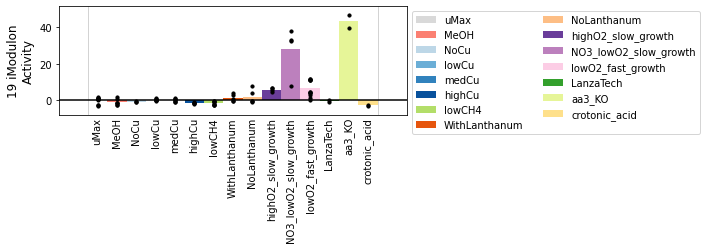

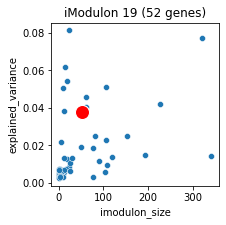

imodulon                                go_name        pvalue  \
137        19                      nitrogen fixation  3.164588e-24   
138        19               electron transport chain  1.429114e-10   
139        19                   nitrogenase activity  2.355346e-10   
141        19             electron transfer activity  7.023521e-08   
140        19  carbonyl sulfide nitrogenase activity  2.065344e-08   
142        19            iron-sulfur cluster binding  3.714255e-06   
12         19                                    NaN  1.774510e-06   
12         19                                    NaN  9.511375e-05   
143        19    molybdenum-iron nitrogenase complex  1.494492e-04   

           qvalue  precision    recall   f1score    TP  target_set_size  \
137  1.298431e-20   0.269231  0.736842  0.394366  14.0             19.0   
138  2.931827e-07   0.230769  0.146341  0.179104  12.0             82.0   
139  3.221329e-07   0.096154  1.000000  0.175439   5.0              5.0   
141  5.763501e-05   0.173077  0.136364  0.152542   9.0             66.0   
140  2.118527e-05   0.076923  1.000000  0.142857   4.0              4.0   
142  2.539931e-03   0.134615  0.127273  0.130841   7.0             55.0   
12   6.033334e-04   0.057692  1.000000  0.109091   3.0              3.0   
12   2.406378e-02   0.057692  0.375000  0.100000   3.0              8.0   
143  8.759860e-02   0.038462  1.000000  0.074074   2.0              2.0   

     imodulon_size         source annotation  \
137           52.0             GO        NaN   
138           52.0             GO        NaN   
139           52.0             GO        NaN   
141           52.0             GO        NaN   
140           52.0             GO        NaN   
142           52.0             GO        NaN   
12            52.0   KEGG modules     M00175   
12            52.0  KEGG pathways   map00625   
143           52.0             GO        NaN   

                                  pathway_name  \
137                                        NaN   
138                                        NaN   
139                                        NaN   
141                                        NaN   
140                                        NaN   
142                                        NaN   
12                                         NaN   
12   Chloroalkane and chloroalkene degradation   
143                                        NaN   

                                module_name  
137                                     NaN  
138                                     NaN  
139                                     NaN  
141                                     NaN  
140                                     NaN  
142                                     NaN  
12   Nitrogen fixation, nitrogen => ammonia  
12                                      NaN  
143                                     NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS17060     0.101162         NaN      3835643    3836495      -1   
EQU24_RS17065     0.173827        nifH      3837050    3837932       1   
EQU24_RS17070     0.176369        nifD      3838069    3839548       1   
EQU24_RS17075     0.172999        nifK      3839690    3841262       1   
EQU24_RS17080     0.164754        nifT      3841334    3841547       1   
EQU24_RS17085     0.177285         NaN      3841557    3841758       1   
EQU24_RS17090     0.151574         NaN      3841761    3842028       1   
EQU24_RS17095     0.124565         NaN      3842037    3842802       1   
EQU24_RS17100     0.106676         NaN      3842794    3843757       1   
EQU24_RS17115     0.103518         NaN      3846258    3846792      -1   
EQU24_RS17120     0.106736        grxD      3846802    3847423      -1   
EQU24_RS17125     0.095787        clpX      3847727    3849020      -1   
EQU24_RS17130     0.121249        nifM      3849413    3850268      -1   
EQU24_RS17135     0.120275         NaN      3850269    3850749      -1   
EQU24_RS17140     0.120140         NaN      3850745    3851060      -1   
EQU24_RS17145     0.138054        fdxB      3851204    3851522      -1   
EQU24_RS17150     0.136602         NaN      3851530    3851746      -1   
EQU24_RS17155     0.136111         NaN      3851756    3852230      -1   
EQU24_RS17160     0.134654         NaN      3852329    3852761      -1   
EQU24_RS17165     0.108167        nifN      3852817    3854203      -1   
EQU24_RS17170     0.110835        nifE      3854208    3855657      -1   
EQU24_RS17200     0.148597         NaN      3860895    3861501      -1   
EQU24_RS17205     0.154128         NaN      3861500    3861851      -1   
EQU24_RS17210     0.142507         NaN      3861870    3862158      -1   
EQU24_RS17215     0.140895         NaN      3862286    3863567      -1   
EQU24_RS17220     0.133791         NaN      3863563    3863989      -1   
EQU24_RS17225     0.140874         NaN      3864054    3864333      -1   
EQU24_RS17230     0.155378        nifB      3864394    3865885      -1   
EQU24_RS17235     0.089356         NaN      3866164    3866425      -1   
EQU24_RS17240     0.107490         NaN      3866435    3867125      -1   
EQU24_RS17245     0.091012        rsxG      3867302    3867923      -1   
EQU24_RS17250     0.136997         NaN      3868174    3869257      -1   
EQU24_RS17255     0.140801        rsxC      3869607    3871083      -1   
EQU24_RS17260     0.134645         NaN      3871079    3871631      -1   
EQU24_RS17265     0.139976        rsxA      3871650    3872223      -1   
EQU24_RS17270     0.095840        nifL      3872605    3874195       1   
EQU24_RS17275     0.076333        nifA      3874198    3875725       1   
EQU24_RS17285     0.110292        draG      3877222    3878107       1   
EQU24_RS17290     0.137233         NaN      3878149    3878857      -1   
EQU24_RS17295     0.136018         NaN      3878869    3879187      -1   
EQU24_RS17300     0.140141         NaN      3879188    3879758      -1   
EQU24_RS17310     0.071557         NaN      3881819    3882266      -1   
EQU24_RS17315     0.096260         NaN      3882262    3883237      -1   
EQU24_RS17325     0.138922         NaN      3883622    3884123      -1   
EQU24_RS17330     0.083775         NaN      3884125    3884449      -1   
EQU24_RS17335     0.143018         NaN      3884556    3885057      -1   
EQU24_RS17340     0.149070        cysE      3885056    3885806      -1   
EQU24_RS17345     0.137043        nifV      3885966    3887091      -1   
EQU24_RS17405     0.096656        nifS      3895063    3896272      -1   
EQU24_RS17410     0.130400        nifU      3896274    3897171      -1   
EQU24_RS17415     0.132729         NaN      3897189    3897546      -1   
EQU24_RS17420     0.094710         NaN      3897740    3897995       1   

                  

In [60]:
imod_info(19)

In [61]:
ica_data.imodulon_table.loc[19,'category'] = 'functional'
ica_data.imodulon_table.loc[19,'function'] = 'nif/electron-transport_EW'


## iMod 20

iModulon 20


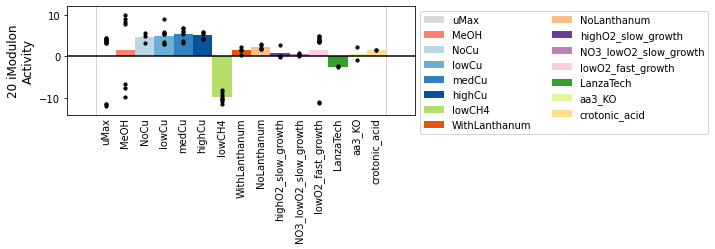

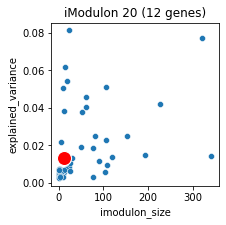

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS05090     0.106586         NaN      1086306    1086642      -1   
EQU24_RS05635     0.151173         NaN      1220732    1220808       1   
EQU24_RS07375     0.194324         NaN      1630411    1630488       1   
EQU24_RS07995     0.130945         NaN      1765410    1766609      -1   
EQU24_RS08855     0.192720         NaN      1962417    1963410       1   
EQU24_RS10780     0.152145         NaN      2397391    2397468      -1   
EQU24_RS12815     0.226326         NaN      2875910    2876903      -1   
EQU24_RS15125     0.109026         NaN      3379487    3379572      -1   
EQU24_RS17665     0.132222         NaN      3938733    3940029      -1   
EQU24_RS18555     0.111401         NaN      4143018    4143095      -1   
EQU24_RS18860     0.245458         NaN      4213623    4213699      -1   
EQU24_RS20610     0.392186         NaN      4646544    4647282      -1   

                                product COG  \
locus_tag                                     
EQU24_RS05090      hypothetical protein   X   
EQU24_RS05635                       NaN   X   
EQU24_RS07375                       NaN   X   
EQU24_RS07995    IS3 family transposase   L   
EQU24_RS08855      hypothetical protein   S   
EQU24_RS10780                       NaN   X   
EQU24_RS12815         cytosolic protein   S   
EQU24_RS15125                       NaN   X   
EQU24_RS17665    IS4 family transposase   L   
EQU24_RS18555                       NaN   X   
EQU24_RS18860                       NaN   X   
EQU24_RS20610  ISAs1 family transposase   L   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS05090                      No COG annotation            NaN   2189   
EQU24_RS05635                      No COG annotation            NaN   2123   
EQU24_RS07375                      No COG annotation            NaN   1895   
EQU24_RS07995  Replication, recombination and repair  UPI00110CA4C7   1825   
EQU24_RS08855                       Function unknown     A0A4P9UM20   1709   
EQU24_RS10780                      No COG annotation            NaN   1474   
EQU24_RS12815                       Function unknown  UPI00110CE264   1223   
EQU24_RS15125                      No COG annotation            NaN    920   
EQU24_RS17665  Replication, recombination and repair  UPI00110CD44A    595   
EQU24_RS18555                      No COG annotation            NaN    489   
EQU24_RS18860                      No COG annotation            NaN    445   
EQU24_RS20610  Replication, recombination and repair            NaN    212   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS05090                                    EQU24_RS05090   
EQU24_RS05635  EQU24_RS05645 // EQU24_RS05640 // EQU24_RS05635   
EQU24_RS07375                    infC // thrS // EQU24_RS07375   
EQU24_RS07995                                    EQU24_RS07995   
EQU24_RS08855                                    EQU24_RS08855   
EQU24_RS10780                                    EQU24_RS10780   
EQU24_RS12815                                    EQU24_RS12815   
EQU24_RS15125                                    EQU24_RS15125   
EQU24_RS17665                                    EQU24_RS17665   
EQU24_RS18555  EQU24_RS18555 // EQU24_RS18550 // EQU24_RS18545   
EQU24_RS18860                                    EQU24_RS18860   
EQU24_RS20610                   EQU24_RS20615 // EQU24_RS20610   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS05090             NaN              ||   
EQU24_RS05635             NaN              ||   
EQU24_RS07375             NaN              ||   
EQU24_RS07995  WP_138767126.1          ||None   
EQU24_R

In [62]:
imod_info(20)

In [63]:
ica_data.imodulon_table.loc[20,'function'] = 'low-in-CH4/some-split-conditions/some-transposase_EW'


## iMod 21

iModulon 21


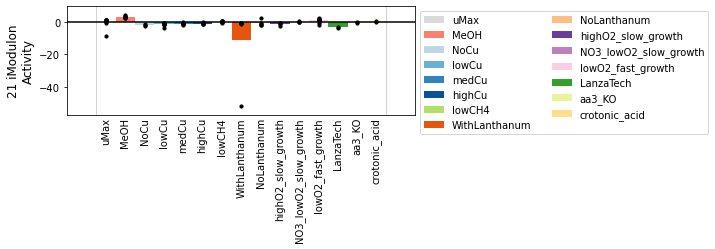

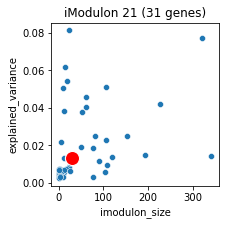

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00195     0.133660         NaN        42874      43876      -1   
EQU24_RS01125     0.159255         NaN       229960     230614       1   
EQU24_RS01155     0.171328         NaN       234648     234873       1   
EQU24_RS01170     0.127262         NaN       235812     237102      -1   
EQU24_RS01175     0.092831        umuD       237101     237485      -1   
EQU24_RS01260     0.167628         NaN       254824     255316       1   
EQU24_RS01555     0.093363         NaN       328948     329197       1   
EQU24_RS01765    -0.107452         NaN       371879     372134      -1   
EQU24_RS05305     0.144156         NaN      1129473    1129971      -1   
EQU24_RS05435     0.135077         NaN      1166485    1167229       1   
EQU24_RS06145     0.166407         NaN      1339211    1339394      -1   
EQU24_RS06210     0.154828         NaN      1353125    1353620      -1   
EQU24_RS06295     0.167627         NaN      1377360    1377993       1   
EQU24_RS08460     0.099021        urtC      1867805    1869074       1   
EQU24_RS10700     0.181608         NaN      2380001    2380250      -1   
EQU24_RS10730     0.157209         NaN      2384250    2384430      -1   
EQU24_RS10945     0.143486         NaN      2443373    2443643      -1   
EQU24_RS11985     0.124080         NaN      2680417    2680867      -1   
EQU24_RS11990     0.102398         NaN      2680903    2681857      -1   
EQU24_RS12110     0.189361         NaN      2710670    2710937      -1   
EQU24_RS12125     0.143515        cas2      2711887    2712196      -1   
EQU24_RS12130     0.122016         NaN      2712195    2712942      -1   
EQU24_RS14930     0.082645         NaN      3328929    3329181      -1   
EQU24_RS16540     0.143571         NaN      3711352    3712267      -1   
EQU24_RS16545     0.134333         NaN      3712414    3713431      -1   
EQU24_RS16555     0.149455         NaN      3714628    3714988      -1   
EQU24_RS17215     0.147835         NaN      3862286    3863567      -1   
EQU24_RS17310     0.126997         NaN      3881819    3882266      -1   
EQU24_RS18145     0.142984        mxaB      4045188    4045845       1   
EQU24_RS20235     0.158652         NaN      4566875    4567184       1   
EQU24_RS20510     0.106328         NaN      4626446    4626638      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00195                  DUF4338 domain-containing protein   L   
EQU24_RS01125                               hypothetical protein   X   
EQU24_RS01155                               hypothetical protein   X   
EQU24_RS01170                            Y-family DNA polymerase   L   
EQU24_RS01175  translesion error-prone DNA polymerase V autop...   K   
EQU24_RS01260                               hypothetical protein   X   
EQU24_RS01555                               hypothetical protein   X   
EQU24_RS01765                   DUF504 domain-containing protein   A   
EQU24_RS05305  bifunctional adenosylcobinamide kinase/adenosy...   H   
EQU24_RS05435                               hypothetical protein   D   
EQU24_RS06145                               hypothetical protein   X   
EQU24_RS06210                               hypothetical protein   L   
EQU24_RS06295                      HTH domain-containing protein   K   
EQU24_RS08460         urea ABC transporter permease subunit UrtC   E   
EQU24_RS10700                               hypothetical protein   X   
EQU24_RS10730                               hypothetical protein   S   
EQU24_RS10945                                   membrane protein   T   
EQU24_RS11985                               hypothetical protein   Q   
EQU24_RS11990                          IS1595 family transposase   L   
EQU24_RS12110                    GIY-YIG nuclease family pro

In [64]:
imod_info(21)

In [65]:
ica_data.imodulon_table.loc[21,'function'] = 'unclear/outlier-response-wLa-vial_EW'


## iMod 22

iModulon 22


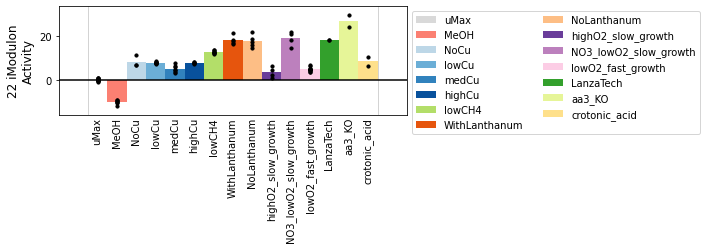

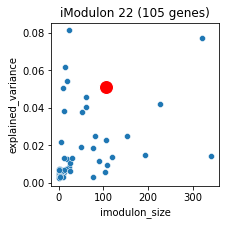

imodulon go_name        pvalue    qvalue  precision    recall   f1score  \
13        22     NaN  4.741615e-07  0.000120   0.085714  0.219512  0.123288   
18        22     NaN  3.008887e-04  0.017050   0.038095  0.285714  0.067227   
14        22     NaN  1.505202e-05  0.005025   0.028571  1.000000  0.055556   
13        22     NaN  5.911404e-05  0.005025   0.028571  0.750000  0.055046   
15        22     NaN  5.911404e-05  0.005025   0.028571  0.750000  0.055046   
16        22     NaN  5.911404e-05  0.005025   0.028571  0.750000  0.055046   
17        22     NaN  1.451025e-04  0.009867   0.028571  0.600000  0.054545   
19        22     NaN  6.153792e-04  0.023248   0.019048  1.000000  0.037383   
20        22     NaN  6.153792e-04  0.023248   0.019048  1.000000  0.037383   
21        22     NaN  6.153792e-04  0.023248   0.019048  1.000000  0.037383   
22        22     NaN  1.816034e-03  0.061745   0.019048  0.666667  0.037037   

     TP  target_set_size  imodulon_size         source annotation  \
13  9.0             41.0          105.0  KEGG pathways   map00910   
18  4.0             14.0          105.0   KEGG modules     M00174   
14  3.0              3.0          105.0   KEGG modules     M00641   
13  3.0              4.0          105.0   KEGG modules     M00528   
15  3.0              4.0          105.0   KEGG modules     M00769   
16  3.0              4.0          105.0   KEGG modules     M00804   
17  3.0              5.0          105.0   KEGG modules     M00529   
19  2.0              2.0          105.0   KEGG modules     M00698   
20  2.0              2.0          105.0   KEGG modules     M00767   
21  2.0              2.0          105.0   KEGG modules     M00768   
22  2.0              3.0          105.0   KEGG modules     M00642   

           pathway_name                                        module_name  
13  Nitrogen metabolism                                                NaN  
18                  NaN  Methane oxidation, methanotroph, methane => fo...  
14                  NaN       Multidrug resistance, efflux pump MexEF-OprN  
13                  NaN                  Nitrification, ammonia => nitrite  
15                  NaN       Multidrug resistance, efflux pump MexPQ-OpmE  
16                  NaN  Complete nitrification, comammox, ammonia => n...  
17                  NaN               Denitrification, nitrate => nitrogen  
19                  NaN       Multidrug resistance, efflux pump BpeEF-OprC  
20                  NaN                                                NaN  
21                  NaN                                                NaN  
22                  NaN       Multidrug resistance, efflux pump MexJK-OprM

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00125     0.045403         NaN        29783      31106       1   
EQU24_RS00160     0.078559         NaN        36419      36716      -1   
EQU24_RS00590     0.057577         NaN       122491     123085       1   
EQU24_RS00880    -0.042492         NaN       183210     183432       1   
EQU24_RS00990     0.060486        aqpZ       203431     204151       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS19970     0.102862         NaN      4489396    4490098       1   
EQU24_RS20335    -0.040907         NaN      4587226    4587418      -1   
EQU24_RS20510    -0.053135         NaN      4626446    4626638      -1   
EQU24_RS20990     0.096391         NaN      4725051    4725498       1   
EQU24_RS22110     0.040159         NaN      4992034    4992421       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00125  autotransporter outer membrane beta-barrel dom...   S   
EQU24_RS00160                               hypothetical protein   X   
EQU24_RS00590                               hypothetical protein   X   
EQU24_RS00880                               hypothetical protein   X   
EQU24_RS00990                                        aquaporin Z   G   
...                                                          ...  ..   
EQU24_RS19970         transcription antitermination protein NusG   S   
EQU24_RS20335                               hypothetical protein   X   
EQU24_RS20510                               hypothetical protein   X   
EQU24_RS20990                  Rsd/AlgQ family anti-sigma factor   K   
EQU24_RS22110                               hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS00125                       Function unknown  UPI000A00FB62   2815   
EQU24_RS00160                      No COG annotation     A0A4P9UIE4   2811   
EQU24_RS00590                      No COG annotation     A0A4P9UIF8   2751   
EQU24_RS00880                      No COG annotation     A0A4P9UIU9   2712   
EQU24_RS00990  Carbohydrate transport and metabolism            NaN   2695   
...                                              ...            ...    ...   
EQU24_RS19970                       Function unknown     A0A4P9UV12    298   
EQU24_RS20335                      No COG annotation            NaN    249   
EQU24_RS20510                      No COG annotation            NaN    227   
EQU24_RS20990                          Transcription  UPI000347E4E3    153   
EQU24_RS22110                      No COG annotation     A0A4P9UV47      6   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS00125                   EQU24_RS00125  WP_083877750.1          ||None   
EQU24_RS00160                   EQU24_RS00160  WP_017841445.1          ||None   
EQU24_RS00590                   EQU24_RS00590  WP_026130247.1          ||None   
EQU24_RS00880                   EQU24_RS00880  WP_017841320.1          ||None   
EQU24_RS00990                            aqpZ  WP_235726467.1      aqpZ||aqpZ   
...                                       ...             ...             ...   
EQU24_RS19970                   EQU24_RS19970  WP_017841866.1          ||None   
EQU24_RS20335                   EQU24_RS20335             NaN              ||   
EQU24_RS20510  EQU24_RS20510 // EQU24_RS20505             NaN              ||   
EQU24_RS20990                   EQU24_RS20990  WP_026130281.1          ||None   
EQU24_RS22110                   EQU24_RS22110  WP_017841480.1          ||None   

                                              

In [66]:
imod_info(22)

In [67]:
ica_data.imodulon_table.loc[22,'function'] = 'methane-oxidation/nitrification/multi-drug-restistance_EW'


## iMod 23

iModulon 23


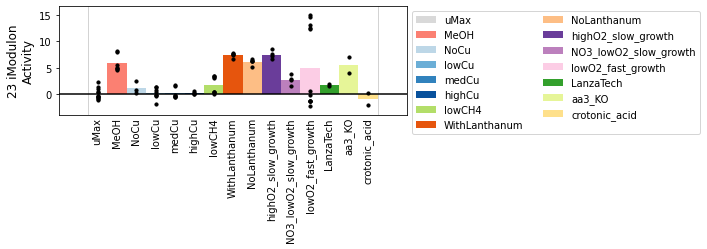

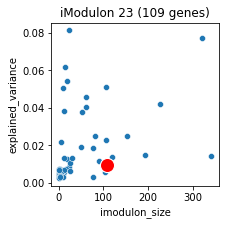

imodulon go_name    pvalue    qvalue  precision  recall   f1score   TP  \
23        23     NaN  0.000017  0.005731   0.027523     1.0  0.053571  3.0   
24        23     NaN  0.000162  0.027585   0.027523     0.6  0.052632  3.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
23              3.0          109.0  KEGG modules     M00175          NaN   
24              5.0          109.0  KEGG modules     M00240          NaN   

                               module_name  
23  Nitrogen fixation, nitrogen => ammonia  
24                                     NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00165     0.038057         NaN        36832      37129      -1   
EQU24_RS00470    -0.051236         NaN        97499      98117      -1   
EQU24_RS00940    -0.075355         NaN       193739     193970       1   
EQU24_RS01215    -0.060606         NaN       244910     246461      -1   
EQU24_RS01375     0.038379         NaN       286650     287097      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21435    -0.037745         NaN      4826760    4827957       1   
EQU24_RS21445    -0.045135         NaN      4828409    4828703       1   
EQU24_RS21740    -0.039806         NaN      4902841    4903366      -1   
EQU24_RS21745    -0.040690         NaN      4903365    4904694      -1   
EQU24_RS21750    -0.054905         NaN      4904690    4905464      -1   

                                                    product COG  \
locus_tag                                                         
EQU24_RS00165                          hypothetical protein   X   
EQU24_RS00470                            GDSL family lipase   E   
EQU24_RS00940                          hypothetical protein   X   
EQU24_RS01215                       IS66 family transposase   L   
EQU24_RS01375                          hypothetical protein   X   
...                                                     ...  ..   
EQU24_RS21435                          hypothetical protein   N   
EQU24_RS21445                STAS domain-containing protein   T   
EQU24_RS21740  MotA/TolQ/ExbB proton channel family protein   U   
EQU24_RS21745                          hypothetical protein   U   
EQU24_RS21750             DUF3450 domain-containing protein   D   

                                                        cog_name     uniprot  \
locus_tag                                                                      
EQU24_RS00165                                  No COG annotation  A0A4V1IJB7   
EQU24_RS00470                Amino acid transport and metabolism  A0A4P9UK91   
EQU24_RS00940                                  No COG annotation  A0A4P9UIM7   
EQU24_RS01215              Replication, recombination and repair         NaN   
EQU24_RS01375                                  No COG annotation  A0A4P9ULN4   
...                                                          ...         ...   
EQU24_RS21435                                      Cell motility  A0A4P9UUU8   
EQU24_RS21445                     Signal transduction mechanisms  A0A4P9USJ5   
EQU24_RS21740  Intracellular trafficking, secretion, and vesi...  A0A4P9USQ4   
EQU24_RS21745  Intracellular trafficking, secretion, and vesi...  A0A4V1IKD9   
EQU24_RS21750  Cell cycle control, cell division, chromosome ...  A0A4P9UXK0   

               tu_id                                            tu_name  \
locus_tag                                                                 
EQU24_RS00165   2810                                      EQU24_RS00165   
EQU24_RS00470   2768                                      EQU24_RS00470   
EQU24_RS00940   2704                                      EQU24_RS00940   
EQU24_RS01215   2664                                      EQU24_RS01215   
EQU24_RS01375   2643                                      EQU24_RS01375   
...              ...                                                ...   
EQU24_RS21435     92    EQU24_RS21440 // EQU24_RS21435 // EQU24_RS21430   
EQU24_RS21445     91                     EQU24_RS21450 // EQU24_RS21445   
EQU24_RS21740     50  EQU24_RS21750 // EQU24_RS21745 // EQU24_RS2174...   
EQU24_RS21745     50  EQU24_RS21750 // EQU24_RS21745 // EQU24_RS2174...   
EQU24_RS21750     50  EQU24_RS21750 // EQU24_RS21745 // EQU24_RS2174...   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00165  WP_017841444.1          ||None   
EQU24_RS00470  W

In [68]:
imod_info(23)

In [69]:
ica_data.imodulon_table.loc[23,'function'] = 'metal-ion-binding/N-fix/lowO2-fast-growth-split_EW'


## iMod 24

iModulon 24


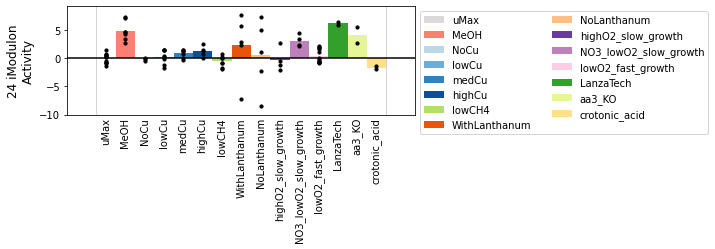

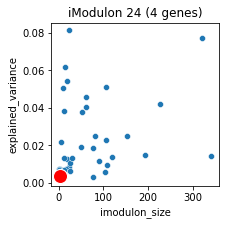

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS02055     0.250698         NaN       432512     434726       1   
EQU24_RS15150     0.253293         NaN      3384817    3385819       1   
EQU24_RS15155     0.267343         NaN      3386052    3387633       1   
EQU24_RS15160     0.165093         NaN      3387629    3389084       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS02055                            TonB-dependent receptor   P   
EQU24_RS15150                               hypothetical protein   X   
EQU24_RS15155  DHA2 family efflux MFS transporter permease su...   P   
EQU24_RS15160          efflux transporter outer membrane subunit   M   

                                             cog_name     uniprot  tu_id  \
locus_tag                                                                  
EQU24_RS02055  Inorganic ion transport and metabolism         NaN   2549   
EQU24_RS15150                       No COG annotation  A0A4P9UPS4    916   
EQU24_RS15155  Inorganic ion transport and metabolism  A0A4P9USD2    915   
EQU24_RS15160  Cell wall/membrane/envelope biogenesis  A0A4P9USR8    915   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS02055                                    EQU24_RS02055   
EQU24_RS15150                                    EQU24_RS15150   
EQU24_RS15155  EQU24_RS15165 // EQU24_RS15160 // EQU24_RS15155   
EQU24_RS15160  EQU24_RS15165 // EQU24_RS15160 // EQU24_RS15155   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS02055  WP_235726409.1          ||None   
EQU24_RS15150  WP_017838693.1          ||None   
EQU24_RS15155  WP_017838692.1          ||None   
EQU24_RS15160  WP_017838691.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS02055  cell outer membrane\nintegral component of mem...   
EQU24_RS15150                     integral component of membrane   
EQU24_RS15155  plasma membrane\nintegral component of membran...   
EQU24_RS15160  amide transport\nnitrogen compound transport\n...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS02055  ['cell outer membrane' 'integral component of ...  
EQU24_RS15150                 ['integral component of membrane']  
EQU24_RS15155  ['plasma membrane' 'integral component of memb...  
EQU24_RS15160  ['amide transport' 'nitrogen compound transpor...

In [70]:
imod_info(24)

In [71]:
ica_data.imodulon_table.loc[24,'function'] = 'up-in-MeOH/LanzaTech/ton-B/some-transport_EW'


## iMod 25

iModulon SG_4


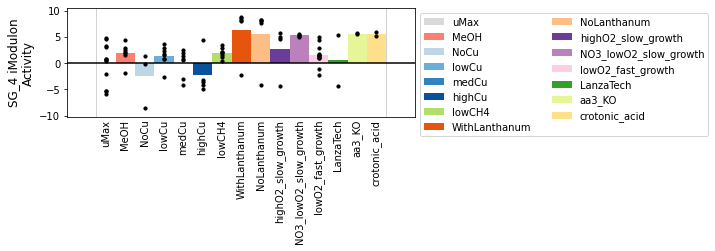

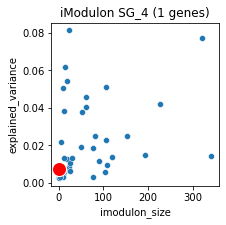

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS11915     0.579356         NaN      2664641    2665580       1   

                               product COG  \
locus_tag                                    
EQU24_RS11915  IS66 family transposase   L   

                                            cog_name uniprot  tu_id  \
locus_tag                                                             
EQU24_RS11915  Replication, recombination and repair     NaN   1329   

                     tu_name ncbi_protein gene_name_extra specific_gos_n  \
locus_tag                                                                  
EQU24_RS11915  EQU24_RS11915          NaN              ||            NaN   

              specific_gos  
locus_tag                   
EQU24_RS11915           []

In [72]:
imod_info("SG_4")

In [73]:
ica_data.imodulon_table.loc["SG_4",'function'] = 'transposase_EW'


## iMod 26

iModulon 26


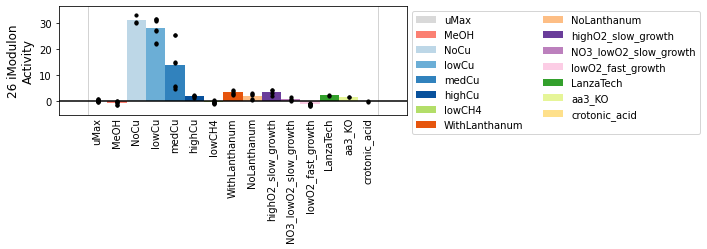

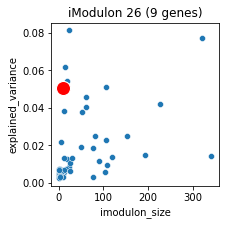

imodulon                                            go_name  \
144        26                          methane metabolic process   
145        26                     methane monooxygenase activity   
146        26                      methane monooxygenase complex   
25         26                                                NaN   
147        26                  cellular alkane metabolic process   
148        26  oxidoreductase activity, acting on paired dono...   
149        26                             monooxygenase activity   
14         26                                                NaN   
150        26  oxidoreductase activity, acting on paired dono...   
26         26                                                NaN   
18         26                                                NaN   
15         26                                                NaN   
151        26                                  catalytic complex   
16         26                                                NaN   
153        26                            oxidoreductase activity   
152        26                         protein-containing complex   
17         26                                                NaN   
19         26                                                NaN   

           pvalue        qvalue  precision    recall   f1score   TP  \
144  2.273876e-15  4.664857e-12   0.666667  0.600000  0.631579  6.0   
145  2.273876e-15  4.664857e-12   0.666667  0.600000  0.631579  6.0   
146  2.394179e-13  3.274439e-10   0.555556  0.714286  0.625000  5.0   
25   3.243692e-14  1.102855e-11   0.666667  0.428571  0.521739  6.0   
147  5.250514e-12  4.308571e-09   0.555556  0.454545  0.500000  5.0   
148  5.250514e-12  4.308571e-09   0.555556  0.454545  0.500000  5.0   
149  8.993743e-12  6.150221e-09   0.555556  0.416667  0.476190  5.0   
14   2.000284e-13  5.060719e-11   0.666667  0.333333  0.444444  6.0   
150  3.402018e-11  1.994069e-08   0.555556  0.333333  0.416667  5.0   
26   1.215885e-05  2.067004e-03   0.222222  0.666667  0.333333  2.0   
18   4.043970e-05  2.046249e-03   0.222222  0.400000  0.285714  2.0   
15   2.463470e-09  3.116289e-07   0.666667  0.077922  0.139535  6.0   
151  1.514586e-07  7.767932e-05   0.555556  0.069444  0.123457  5.0   
16   1.064813e-07  8.979925e-06   0.666667  0.041958  0.078947  6.0   
153  1.359675e-05  5.578746e-03   0.555556  0.028249  0.053763  5.0   
152  1.218129e-06  5.553317e-04   0.666667  0.027907  0.053571  6.0   
17   6.698783e-06  4.236980e-04   0.666667  0.020906  0.040541  6.0   
19   1.376693e-03  5.805056e-02   0.666667  0.008230  0.016260  6.0   

     target_set_size  imodulon_size         source annotation  \
144             10.0            9.0             GO        NaN   
145             10.0            9.0             GO        NaN   
146              7.0            9.0             GO        NaN   
25              14.0            9.0   KEGG modules     M00174   
147             11.0            9.0             GO        NaN   
148             11.0            9.0             GO        NaN   
149             12.0            9.0             GO        NaN   
14              18.0            9.0  KEGG pathways   map01220   
150             15.0            9.0             GO        NaN   
26               3.0            9.0   KEGG modules     M00538   
18               5.0            9.0  KEGG pathways   map00623   
15              77.0            9.0  KEGG pathways   map00680   
151             72.0            9.0             GO        NaN   
16             143.0            9.0  KEGG pathways   map01200   
153            177.0            9.0             GO        NaN   
152            215.0            9.0             GO        NaN   
17             287.0            9.0  KEGG pathways   map01120   
19             729.0            9.0  KEGG pathways   map01100   

                                     pathway_name  \
144                                           NaN   
145                 

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS05885     0.288698        mmoX      1283573    1285151       1   
EQU24_RS05890     0.277501        mmoY      1285264    1286443       1   
EQU24_RS05895     0.285164        mmoB      1286453    1286879       1   
EQU24_RS05900     0.274480        mmoZ      1286888    1287392       1   
EQU24_RS05905     0.246197        mmoD      1287718    1287934       1   
EQU24_RS05910     0.246274        mmoC      1287957    1288995       1   
EQU24_RS05915     0.224486         NaN      1289471    1289897       1   
EQU24_RS05920     0.235946         NaN      1290051    1290351       1   
EQU24_RS05925     0.236003        mmoG      1290558    1292238       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS05885                              methane monooxygenase   H   
EQU24_RS05890                              methane monooxygenase   H   
EQU24_RS05895                              methane monooxygenase   C   
EQU24_RS05900                               hypothetical protein   H   
EQU24_RS05905  soluble methane monooxygenase-binding protein ...   X   
EQU24_RS05910  2Fe-2S iron-sulfur cluster binding domain-cont...   C   
EQU24_RS05915                     BLUF domain-containing protein   S   
EQU24_RS05920                               hypothetical protein   X   
EQU24_RS05925                          likely chaperone for smmo   O   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS05885                  Coenzyme transport and metabolism   
EQU24_RS05890                  Coenzyme transport and metabolism   
EQU24_RS05895                   Energy production and conversion   
EQU24_RS05900                  Coenzyme transport and metabolism   
EQU24_RS05905                                  No COG annotation   
EQU24_RS05910                   Energy production and conversion   
EQU24_RS05915                                   Function unknown   
EQU24_RS05920                                  No COG annotation   
EQU24_RS05925  Post-translational modification, protein turno...   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS05885     A0A4P9UNN3   2088   
EQU24_RS05890     A0A4P9UKQ6   2087   
EQU24_RS05895     A0A4P9UMZ7   2087   
EQU24_RS05900     A0A4P9UKU7   2087   
EQU24_RS05905  UPI0003479E2D   2086   
EQU24_RS05910     A0A4V1IJL6   2086   
EQU24_RS05915            NaN   2085   
EQU24_RS05920     A0A4P9UL60   2084   
EQU24_RS05925     A0A4P9UKZ6   2083   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS05885                                    EQU24_RS05885   
EQU24_RS05890  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05895  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05900  EQU24_RS05900 // EQU24_RS05895 // EQU24_RS05890   
EQU24_RS05905                            EQU24_RS05910 // mmoD   
EQU24_RS05910                            EQU24_RS05910 // mmoD   
EQU24_RS05915                                    EQU24_RS05915   
EQU24_RS05920                                    EQU24_RS05920   
EQU24_RS05925                                    EQU24_RS05925   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS05885  WP_017840379.1          ||None   
EQU24_RS05890  WP_017840378.1          ||None   
EQU24_RS05895  WP_017840377.1          ||None   
EQU24_RS05900  WP_017840376.1          ||None   
EQU24_RS05905  WP_201764852.1      mmoD||mmoD   
EQU24_RS05910  WP_017840374.1          ||None   
EQU24_RS05915  WP_235726398.1          ||None   
EQU24_RS05920  WP_017840372.1          ||None   
EQU24_RS059

In [74]:
imod_info(26)

In [75]:
ica_data.imodulon_table.loc[26,'category'] = 'functional'
ica_data.imodulon_table.loc[26,'function'] = 'smmo-cluster_EW'


## iMod 27

iModulon 27


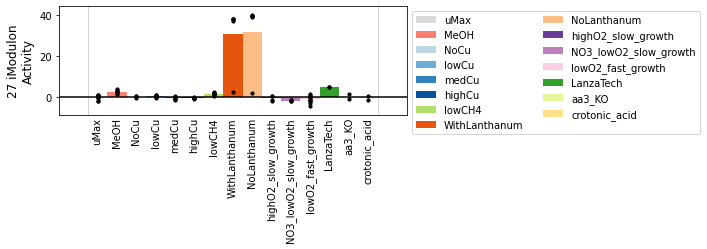

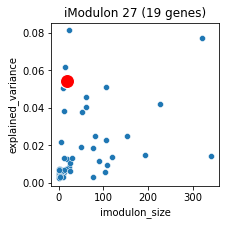

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS01450     0.212431         NaN       301239     302325      -1   
EQU24_RS03790    -0.106959         NaN       810562     810636       1   
EQU24_RS03795    -0.101968         NaN       810653     810729       1   
EQU24_RS04160    -0.128373         NaN       874502     874683      -1   
EQU24_RS05635    -0.136819         NaN      1220732    1220808       1   
EQU24_RS05640    -0.087171         NaN      1220826    1220902       1   
EQU24_RS08850     0.178466         NaN      1962015    1962198      -1   
EQU24_RS09830    -0.125616         NaN      2185247    2185322       1   
EQU24_RS09835    -0.108710         NaN      2185369    2185443       1   
EQU24_RS11115     0.239419         NaN      2482070    2483246      -1   
EQU24_RS12805     0.120062         NaN      2872306    2873593       1   
EQU24_RS12820     0.191902         NaN      2877455    2877638       1   
EQU24_RS15090    -0.165845         NaN      3372700    3372777      -1   
EQU24_RS15095    -0.191107         NaN      3372785    3372861      -1   
EQU24_RS17700     0.159662         NaN      3952860    3954411      -1   
EQU24_RS17885     0.134661         NaN      4000101    4001427       1   
EQU24_RS18550    -0.107016         NaN      4142937    4143014      -1   
EQU24_RS18555    -0.122484         NaN      4143018    4143095      -1   
EQU24_RS19045     0.141081         NaN      4262040    4263239      -1   

                                                        product COG  \
locus_tag                                                             
EQU24_RS01450                 DUF4338 domain-containing protein   L   
EQU24_RS03790                                               NaN   X   
EQU24_RS03795                                               NaN   X   
EQU24_RS04160                                               NaN   X   
EQU24_RS05635                                               NaN   X   
EQU24_RS05640                                               NaN   X   
EQU24_RS08850  type II toxin-antitoxin system HicA family toxin   N   
EQU24_RS09830                                               NaN   X   
EQU24_RS09835                                               NaN   X   
EQU24_RS11115                                       transposase   L   
EQU24_RS12805                            IS4 family transposase   L   
EQU24_RS12820  type II toxin-antitoxin system HicA family toxin   N   
EQU24_RS15090                                               NaN   X   
EQU24_RS15095                                               NaN   X   
EQU24_RS17700                           IS66 family transposase   L   
EQU24_RS17885                          IS110 family transposase   L   
EQU24_RS18550                                               NaN   X   
EQU24_RS18555                                               NaN   X   
EQU24_RS19045                            IS3 family transposase   L   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS01450  Replication, recombination and repair            NaN   2631   
EQU24_RS03790                      No COG annotation            NaN   2336   
EQU24_RS03795                      No COG annotation            NaN   2336   
EQU24_RS04160                      No COG annotation            NaN   2308   
EQU24_RS05635                      No COG annotation            NaN   2123   
EQU24_RS05640                      No COG annotation            NaN   2123   
EQU24_RS08850                          Cell motility     A0A4P9UNQ6   1710   
EQU24_RS09830                      No COG annotation            NaN   1582   
EQU24_RS09835                      No COG annotation            NaN   1582   
EQU24_RS11115  Replication, recombination and repair  UPI00110D22E9   1437   
EQU24_RS12805  Replication, reco

In [76]:
imod_info(27)

In [77]:
ica_data.imodulon_table.loc[27,'function'] = 'transposase/toxin-anti-toxin_EW'


## iMod 28

iModulon 28


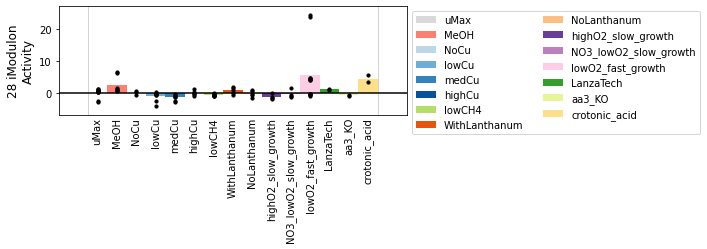

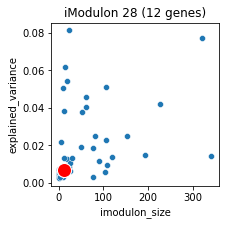

imodulon go_name        pvalue   qvalue  precision  recall   f1score   TP  \
27        28     NaN  1.760820e-07  0.00006       0.25     0.6  0.352941  3.0   

    target_set_size  imodulon_size        source annotation pathway_name  \
27              5.0           12.0  KEGG modules     M00240          NaN   

   module_name  
27         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS19155     0.157048         NaN      4282467    4283163       1   
EQU24_RS19160     0.170664         NaN      4283255    4285490      -1   
EQU24_RS20545     0.172243         NaN      4632179    4633250      -1   
EQU24_RS20550     0.221669         NaN      4633246    4634119      -1   
EQU24_RS20555     0.241414         NaN      4634454    4635003      -1   
EQU24_RS20560     0.247234         NaN      4635443    4636508      -1   
EQU24_RS20565     0.229190         NaN      4636447    4636726      -1   
EQU24_RS20570     0.177695         NaN      4636915    4637191       1   
EQU24_RS20575     0.261790         NaN      4637283    4639062      -1   
EQU24_RS20580     0.208231         NaN      4639230    4639488      -1   
EQU24_RS20585     0.238934         NaN      4639491    4641747      -1   
EQU24_RS20590     0.234085         NaN      4641915    4642194      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS19155                  DUF2182 domain-containing protein   S   
EQU24_RS19160                            TonB-dependent receptor   P   
EQU24_RS20545  iron chelate uptake ABC transporter family per...   P   
EQU24_RS20550    hemin ABC transporter substrate-binding protein   P   
EQU24_RS20555                  pyridoxamine 5'-phosphate oxidase   P   
EQU24_RS20560                               hypothetical protein   P   
EQU24_RS20565                               hypothetical protein   X   
EQU24_RS20570                               hypothetical protein   X   
EQU24_RS20575                               hypothetical protein   G   
EQU24_RS20580                               hypothetical protein   X   
EQU24_RS20585  TonB-dependent hemoglobin/transferrin/lactofer...   P   
EQU24_RS20590                               hypothetical protein   X   

                                             cog_name        uniprot  tu_id  \
locus_tag                                                                     
EQU24_RS19155                        Function unknown  UPI000A2F3717    407   
EQU24_RS19160  Inorganic ion transport and metabolism            NaN    406   
EQU24_RS20545  Inorganic ion transport and metabolism  UPI0003474247    222   
EQU24_RS20550  Inorganic ion transport and metabolism     A0A4P9US51    222   
EQU24_RS20555  Inorganic ion transport and metabolism     A0A4P9UUR5    221   
EQU24_RS20560  Inorganic ion transport and metabolism  UPI0003470AB8    220   
EQU24_RS20565                       No COG annotation     A0A4V1IKB8    220   
EQU24_RS20570                       No COG annotation            NaN    219   
EQU24_RS20575   Carbohydrate transport and metabolism     A0A4P9USE5    218   
EQU24_RS20580                       No COG annotation  UPI00191C2B5C    217   
EQU24_RS20585  Inorganic ion transport and metabolism            NaN    217   
EQU24_RS20590                       No COG annotation     A0A4P9US62    216   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS19155                                    EQU24_RS19155   
EQU24_RS19160                                    EQU24_RS19160   
EQU24_RS20545  EQU24_RS20550 // EQU24_RS20545 // EQU24_RS20540   
EQU24_RS20550  EQU24_RS20550 // EQU24_RS20545 // EQU24_RS20540   
EQU24_RS20555                                    EQU24_RS20555   
EQU24_RS20560                   EQU24_RS20565 // EQU24_RS20560   
EQU24_RS20565                   EQU24_RS20565 // EQU24_RS20560   
EQU24_RS20570                                    EQU24_RS20570   
EQU24_RS20575                                    EQU24_RS20575   
EQU24_RS20580                   EQU24_RS20585 // EQU24_RS20580   
EQU24_RS20585                   EQU24_RS20585 // EQU24_RS20580   
EQU2

In [78]:
imod_info(28)

In [79]:
ica_data.imodulon_table.loc[28,'function'] = 'ion-transport/outlier-repsonse-FM11_EW'


## iMod 29

iModulon 29


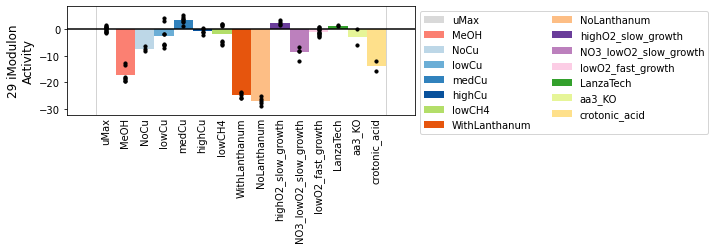

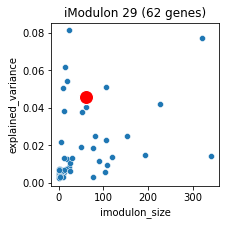

imodulon            go_name        pvalue    qvalue  precision    recall  \
20         29                NaN  4.315480e-09  0.000001   0.145161  0.219512   
154        29  nitrogen fixation  5.817899e-06  0.023871   0.080645  0.263158   
28         29                NaN  3.036741e-06  0.001032   0.048387  1.000000   
29         29                NaN  5.884075e-05  0.010003   0.048387  0.500000   
21         29                NaN  6.333123e-04  0.080114   0.032258  0.666667   

      f1score   TP  target_set_size  imodulon_size         source annotation  \
20   0.174757  9.0             41.0           62.0  KEGG pathways   map00910   
154  0.123457  5.0             19.0           62.0             GO        NaN   
28   0.092308  3.0              3.0           62.0   KEGG modules     M00438   
29   0.088235  3.0              6.0           62.0   KEGG modules     M00530   
21   0.061538  2.0              3.0           62.0  KEGG pathways   map00791   

             pathway_name                                        module_name  
20    Nitrogen metabolism                                                NaN  
154                   NaN                                                NaN  
28                    NaN                                                NaN  
29                    NaN  Dissimilatory nitrate reduction, nitrate => am...  
21   Atrazine degradation                                                NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00940    -0.072191         NaN       193739     193970       1   
EQU24_RS01305    -0.072599         NaN       265994     267545       1   
EQU24_RS02055    -0.070473         NaN       432512     434726       1   
EQU24_RS02555     0.129413         NaN       543573     545553       1   
EQU24_RS03400     0.065638         NaN       721431     721647      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS17160     0.065969         NaN      3852329    3852761      -1   
EQU24_RS17270     0.065009        nifL      3872605    3874195       1   
EQU24_RS17275     0.056701        nifA      3874198    3875725       1   
EQU24_RS19155     0.065364         NaN      4282467    4283163       1   
EQU24_RS19170     0.094335         NaN      4287016    4288225      -1   

                                                   product COG  \
locus_tag                                                        
EQU24_RS00940                         hypothetical protein   X   
EQU24_RS01305                      IS66 family transposase   L   
EQU24_RS02055                      TonB-dependent receptor   P   
EQU24_RS02555                         hypothetical protein   N   
EQU24_RS03400                         hypothetical protein   X   
...                                                    ...  ..   
EQU24_RS17160               nitrogen fixation protein NifX   S   
EQU24_RS17270    nitrogen fixation negative regulator NifL   K   
EQU24_RS17275  nif-specific transcriptional activator NifA   K   
EQU24_RS19155            DUF2182 domain-containing protein   S   
EQU24_RS19170                                        porin   I   

                                             cog_name        uniprot  tu_id  \
locus_tag                                                                     
EQU24_RS00940                       No COG annotation     A0A4P9UIM7   2704   
EQU24_RS01305   Replication, recombination and repair            NaN   2653   
EQU24_RS02055  Inorganic ion transport and metabolism            NaN   2549   
EQU24_RS02555                           Cell motility            NaN   2479   
EQU24_RS03400                       No COG annotation            NaN   2384   
...                                               ...            ...    ...   
EQU24_RS17160                        Function unknown  UPI00034A3FAE    657   
EQU24_RS17270                           Transcription            NaN    643   
EQU24_RS17275                           Transcription     A0A4P9UQS6    643   
EQU24_RS19155                        Function unknown  UPI000A2F3717    407   
EQU24_RS19170          Lipid transport and metabolism     A0A4P9URK8    404   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS00940                   EQU24_RS00940  WP_017841310.1          ||None   
EQU24_RS01305                   EQU24_RS01305  WP_244310896.1          ||None   
EQU24_RS02055                   EQU24_RS02055  WP_235726409.1          ||None   
EQU24_RS02555                   EQU24_RS02555  WP_017841004.1          ||None   
EQU24_RS03400  EQU24_RS03405 // EQU24_RS03400             NaN              ||   
...                                       ...             ...             ...   
EQU24_RS17160                   EQU24_RS17160  WP_017842396.1          ||None   
EQU24_RS17270                    nifA // nifL  WP_235726433.1      nifL||nifL   
EQU24_RS17275                    nifA // nifL  WP_017842373.1      nifA||nifA   
EQU24_RS19155                   EQU24_RS19155  WP_085986406.1          ||None   
EQU24_RS19170                   EQU24_RS19170  WP_017842020.1          ||None   

                                                  specific_gos_n  \
locus_tag                                  

In [80]:
imod_info(29)

In [81]:
ica_data.imodulon_table.loc[29,'function'] = 'nitrogen-related-transport_EW'


## iMod 30

iModulon 30


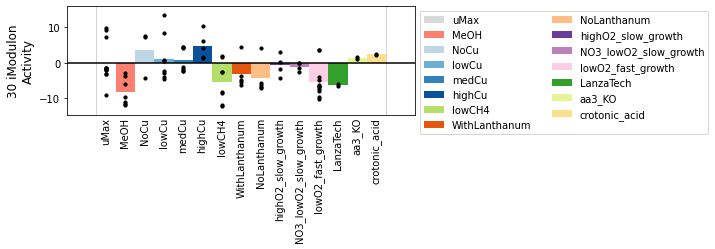

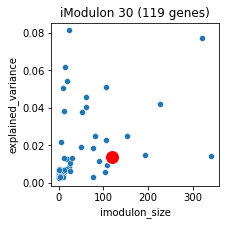

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00110     0.038757         NaN        25137      25554       1   
EQU24_RS00165     0.053241         NaN        36832      37129      -1   
EQU24_RS00175     0.044140         NaN        39992      40271      -1   
EQU24_RS00390     0.047177         NaN        82907      83930       1   
EQU24_RS00450     0.046040         NaN        95639      95957       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20950     0.047680         NaN      4717305    4718589      -1   
EQU24_RS21815     0.057939         NaN      4920552    4921551       1   
EQU24_RS21835    -0.051703         NaN      4924469    4925954      -1   
EQU24_RS22125     0.072505         NaN      4994218    4994407      -1   
EQU24_RS22130     0.043436         NaN      4994558    4994648      -1   

                                            product COG  \
locus_tag                                                 
EQU24_RS00110                   OsmC family protein   O   
EQU24_RS00165                  hypothetical protein   X   
EQU24_RS00175                  hypothetical protein   L   
EQU24_RS00390  glycosyltransferase family 4 protein   M   
EQU24_RS00450      phosphoribosyl-ATP diphosphatase   E   
...                                             ...  ..   
EQU24_RS20950             ISKra4 family transposase   L   
EQU24_RS21815                  hypothetical protein   X   
EQU24_RS21835                IS4 family transposase   L   
EQU24_RS22125     DUF4102 domain-containing protein   L   
EQU24_RS22130                                   NaN   X   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00165                                  No COG annotation   
EQU24_RS00175              Replication, recombination and repair   
EQU24_RS00390             Cell wall/membrane/envelope biogenesis   
EQU24_RS00450                Amino acid transport and metabolism   
...                                                          ...   
EQU24_RS20950              Replication, recombination and repair   
EQU24_RS21815                                  No COG annotation   
EQU24_RS21835              Replication, recombination and repair   
EQU24_RS22125              Replication, recombination and repair   
EQU24_RS22130                                  No COG annotation   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00165     A0A4V1IJB7   2810   
EQU24_RS00175     A0A4P9UIR2   2808   
EQU24_RS00390  UPI000344E98D   2777   
EQU24_RS00450     A0A4P9UN41   2770   
...                      ...    ...   
EQU24_RS20950     A0A4V1IKC4    161   
EQU24_RS21815     A0A4P9USR1     43   
EQU24_RS21835  UPI00034C438D     42   
EQU24_RS22125     A0A4P9UVG7      3   
EQU24_RS22130            NaN      2   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00165                                      EQU24_RS00165   
EQU24_RS00175                                      EQU24_RS00175   
EQU24_RS00390                                      EQU24_RS00390   
EQU24_RS00450  EQU24_RS00450 // hisI // hisF // hisA // hisH ...   
...                                                          ...   
EQU24_RS20950                                      EQU24_RS20950   
EQU24_RS21815  EQU24_RS21830 // EQU24_RS21825 // EQU24_RS2182...   
EQU24_RS21835                                      EQU24_RS21835   
EQU24_RS22125                                      EQU24_RS22125   
EQU24_RS22130                                      EQU24_RS22130   

      

In [82]:
imod_info(30)

In [83]:
ica_data.imodulon_table.loc[30,'function'] = 'medium-unclear_EW'


## iMod 31

iModulon 31


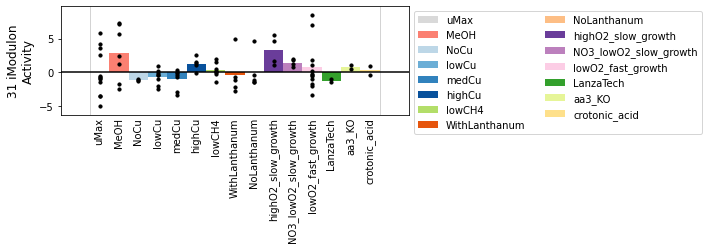

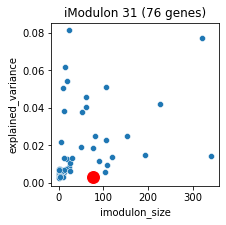

imodulon                            go_name    pvalue    qvalue  \
155        31  ornithine cyclodeaminase activity  0.000022  0.091436   

     precision  recall  f1score   TP  target_set_size  imodulon_size source  \
155   0.039474    0.75    0.075  3.0              4.0           76.0     GO   

    annotation pathway_name module_name  
155        NaN          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00055     0.052337         NaN        13298      13604       1   
EQU24_RS00075    -0.157486        tatB        19487      19799       1   
EQU24_RS00205    -0.059474         NaN        44526      46077      -1   
EQU24_RS00780     0.087506         NaN       161810     161999       1   
EQU24_RS01155     0.050853         NaN       234648     234873       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20500     0.051042         NaN      4625665    4625851      -1   
EQU24_RS20650     0.146031         NaN      4658178    4658265       1   
EQU24_RS20980    -0.071481         NaN      4722789    4723914      -1   
EQU24_RS21260    -0.046333         NaN      4791094    4791280       1   
EQU24_RS21265     0.046520         NaN      4791671    4791851      -1   

                                              product COG  \
locus_tag                                                   
EQU24_RS00055       DUF3240 domain-containing protein   S   
EQU24_RS00075  twin-arginine translocase subunit TatB   U   
EQU24_RS00205                 IS66 family transposase   L   
EQU24_RS00780                    hypothetical protein   X   
EQU24_RS01155                    hypothetical protein   X   
...                                               ...  ..   
EQU24_RS20500                    hypothetical protein   X   
EQU24_RS20650                                     NaN   X   
EQU24_RS20980                ISAs1 family transposase   L   
EQU24_RS21260                    hypothetical protein   X   
EQU24_RS21265                    hypothetical protein   X   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00055                                   Function unknown   
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00205              Replication, recombination and repair   
EQU24_RS00780                                  No COG annotation   
EQU24_RS01155                                  No COG annotation   
...                                                          ...   
EQU24_RS20500                                  No COG annotation   
EQU24_RS20650                                  No COG annotation   
EQU24_RS20980              Replication, recombination and repair   
EQU24_RS21260                                  No COG annotation   
EQU24_RS21265                                  No COG annotation   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00055     A0A4V1IJB5   2825   
EQU24_RS00075     A0A4P9UII1   2822   
EQU24_RS00205            NaN   2803   
EQU24_RS00780            NaN   2724   
EQU24_RS01155  UPI0009FE04B7   2670   
...                      ...    ...   
EQU24_RS20500            NaN    228   
EQU24_RS20650            NaN    207   
EQU24_RS20980     A0A4P9USK5    155   
EQU24_RS21260            NaN    120   
EQU24_RS21265            NaN    119   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00055  EQU24_RS00055 // EQU24_RS00050 // EQU24_RS0004...   
EQU24_RS00075                                       tatB // tatA   
EQU24_RS00205                                      EQU24_RS00205   
EQU24_RS00780                                      EQU24_RS00780   
EQU24_RS01155                                      EQU24_RS01155   
...                                                          ...   
EQU24_RS20500                                      EQU24_RS20500   
EQU24_RS20650                                      EQU24_RS20650   
EQU24_RS20980                                      EQU24_RS20980   
EQU24_RS21260                                      EQU24_RS21260   
EQU24_RS21265                                    

In [84]:
imod_info(31)

In [85]:
ica_data.imodulon_table.loc[31,'function'] = 'ornithine-cyclodeaminase-activity?_EW'


## iMod 32

iModulon 32


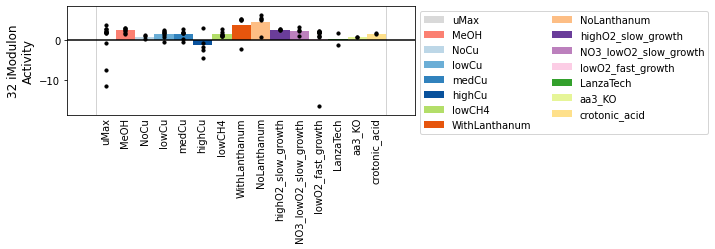

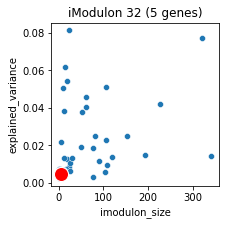

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00175     0.197143         NaN        39992      40271      -1   
EQU24_RS07995    -0.177069         NaN      1765410    1766609      -1   
EQU24_RS18585     0.330915         NaN      4149200    4149536       1   
EQU24_RS20510     0.456633         NaN      4626446    4626638      -1   
EQU24_RS20765     0.339813         NaN      4677500    4678028      -1   

                                       product COG  \
locus_tag                                            
EQU24_RS00175             hypothetical protein   L   
EQU24_RS07995           IS3 family transposase   L   
EQU24_RS18585             hypothetical protein   L   
EQU24_RS20510             hypothetical protein   X   
EQU24_RS20765  phosphatase PAP2 family protein   I   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS00175  Replication, recombination and repair     A0A4P9UIR2   2808   
EQU24_RS07995  Replication, recombination and repair  UPI00110CA4C7   1825   
EQU24_RS18585  Replication, recombination and repair            NaN    484   
EQU24_RS20510                      No COG annotation            NaN    227   
EQU24_RS20765         Lipid transport and metabolism     A0A4P9US91    191   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS00175                   EQU24_RS00175  WP_017841442.1          ||None   
EQU24_RS07995                   EQU24_RS07995  WP_138767126.1          ||None   
EQU24_RS18585  EQU24_RS18590 // EQU24_RS18585             NaN              ||   
EQU24_RS20510  EQU24_RS20510 // EQU24_RS20505             NaN              ||   
EQU24_RS20765  EQU24_RS20765 // EQU24_RS20760  WP_017841722.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS00175  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS07995  DNA integration\nsequence-specific DNA binding...   
EQU24_RS18585  DNA binding\ntransposase activity\ntranspositi...   
EQU24_RS20510                     integral component of membrane   
EQU24_RS20765                     integral component of membrane   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS00175  ['DNA binding' 'transposase activity' 'transpo...  
EQU24_RS07995  ['DNA integration' 'sequence-specific DNA bind...  
EQU24_RS18585  ['DNA binding' 'transposase activity' 'transpo...  
EQU24_RS20510                 ['integral component of membrane']  
EQU24_RS20765                 ['integral component of membrane']

In [86]:
imod_info(32)

In [87]:
ica_data.imodulon_table.loc[32,'function'] = 'small_unclear_EW'


## iMod 33

iModulon 33


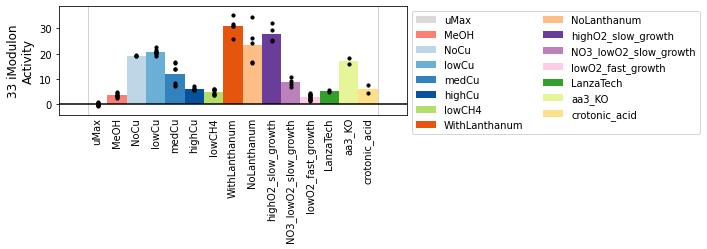

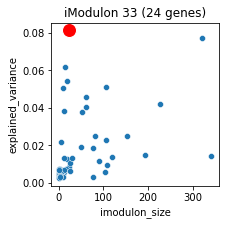

imodulon                                    go_name        pvalue  \
22         33                                        NaN  3.655000e-22   
156        33                                 chemotaxis  2.980065e-14   
30         33                                        NaN  8.283873e-11   
159        33  transmembrane signaling receptor activity  4.477024e-05   
157        33                        signal transduction  1.349507e-09   
23         33                                        NaN  6.761206e-16   
158        33    phosphorelay signal transduction system  1.111983e-07   

           qvalue  precision    recall   f1score    TP  target_set_size  \
22   9.247149e-20   0.666667  0.175824  0.278261  16.0             91.0   
156  1.222721e-10   0.416667  0.204082  0.273973  10.0             49.0   
30   2.816517e-08   0.333333  0.170213  0.225352   8.0             47.0   
159  4.592307e-02   0.125000  0.230769  0.162162   3.0             13.0   
157  2.768514e-06   0.375000  0.091837  0.147541   9.0            102.0   
23   8.552925e-14   0.666667  0.074074  0.133333  16.0            216.0   
158  1.520822e-04   0.375000  0.055901  0.097297   9.0            161.0   

     imodulon_size         source annotation          pathway_name module_name  
22            24.0  KEGG pathways   map02030  Bacterial chemotaxis         NaN  
156           24.0             GO        NaN                   NaN         NaN  
30            24.0   KEGG modules     M00506                   NaN         NaN  
159           24.0             GO        NaN                   NaN         NaN  
157           24.0             GO        NaN                   NaN         NaN  
23            24.0  KEGG pathways   map02020  Two-component system         NaN  
158           24.0             GO        NaN                   NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS10515     0.109474         NaN      2336585    2336855      -1   
EQU24_RS10520     0.146413         NaN      2336917    2337478      -1   
EQU24_RS10525     0.129106         NaN      2337487    2340502      -1   
EQU24_RS10530     0.174343         NaN      2340582    2342751      -1   
EQU24_RS10535     0.173574         NaN      2342747    2343071      -1   
EQU24_RS10540     0.156462         NaN      2343082    2343451      -1   
EQU24_RS10545     0.163522         NaN      2343463    2344675      -1   
EQU24_RS10550     0.116113         NaN      2345682    2347200       1   
EQU24_RS10565     0.087981         NaN      2351540    2352749      -1   
EQU24_RS10575     0.088345         NaN      2355155    2356262      -1   
EQU24_RS10580     0.109546         NaN      2356465    2357308      -1   
EQU24_RS10605     0.090286         NaN      2359954    2360374      -1   
EQU24_RS10610     0.085305         NaN      2360377    2360764      -1   
EQU24_RS10615     0.093695         NaN      2360760    2361636      -1   
EQU24_RS10620     0.099827         NaN      2361767    2362991      -1   
EQU24_RS10625     0.099377         NaN      2363007    2363382      -1   
EQU24_RS10630     0.117409         NaN      2363383    2363632      -1   
EQU24_RS10635     0.106640         NaN      2363631    2366004      -1   
EQU24_RS10640     0.121782         NaN      2366000    2366372      -1   
EQU24_RS10645     0.140061         NaN      2366368    2367211      -1   
EQU24_RS10650     0.124169         NaN      2367223    2367859      -1   
EQU24_RS10655     0.147791        cheB      2368179    2369232      -1   
EQU24_RS10660     0.159735         NaN      2369285    2370884      -1   
EQU24_RS10665     0.183021         NaN      2370914    2372834      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS10515                               hypothetical protein   X   
EQU24_RS10520                            chemotaxis protein CheW   N   
EQU24_RS10525                methyl-accepting chemotaxis protein   T   
EQU24_RS10530                            chemotaxis protein CheA   N   
EQU24_RS10535                     STAS domain-containing protein   T   
EQU24_RS10540                                 response regulator   T   
EQU24_RS10545                               hypothetical protein   N   
EQU24_RS10550                           PAS domain S-box protein   X   
EQU24_RS10565                                 response regulator   T   
EQU24_RS10575  chemotaxis response regulator protein-glutamat...   N   
EQU24_RS10580         protein-glutamate O-methyltransferase CheR   H   
EQU24_RS10605                       anti-sigma regulatory factor   T   
EQU24_RS10610                     STAS domain-containing protein   T   
EQU24_RS10615                     STAS domain-containing protein   T   
EQU24_RS10620                               hypothetical protein   N   
EQU24_RS10625                                 response regulator   T   
EQU24_RS10630                               hypothetical protein   X   
EQU24_RS10635                            chemotaxis protein CheA   T   
EQU24_RS10640                                 response regulator   K   
EQU24_RS10645         protein-glutamate O-methyltransferase CheR   H   
EQU24_RS10650              HEAT repeat domain-containing protein   C   
EQU24_RS10655  chemotaxis-specific protein-glutamate methyltr...   N   
EQU24_RS10660                            chemotaxis protein CheW   N   
EQU24_RS10665                                 chemotaxis protein   N   

                                        cog_name        uniprot  tu_id  \
locus_tag                                                                
EQU24_RS10515                  No COG annotation     A0A4P9UMW8   150

In [88]:
imod_info(33)

In [89]:
ica_data.imodulon_table.loc[33,'function'] = 'chemotaxis/signal-transduction/highest-exp-var_EW'


## iMod 34

iModulon 34


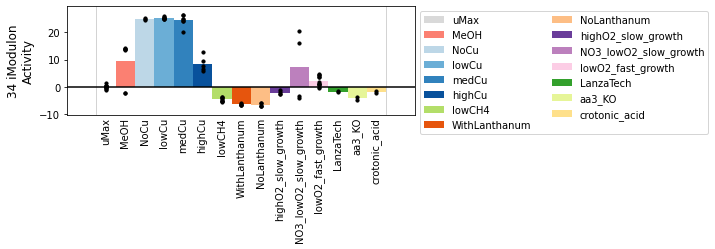

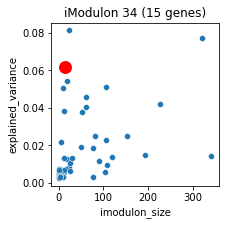

imodulon go_name    pvalue    qvalue  precision    recall   f1score   TP  \
31        34     NaN  0.000047  0.015896        0.2  0.142857  0.166667  3.0   
25        34     NaN  0.000574  0.086839        0.2  0.062500  0.095238  3.0   
24        34     NaN  0.000686  0.086839        0.2  0.058824  0.090909  3.0   

    target_set_size  imodulon_size         source annotation  \
31             21.0           15.0   KEGG modules     M00331   
25             48.0           15.0  KEGG pathways   map05111   
24             51.0           15.0  KEGG pathways   map03070   

                           pathway_name module_name  
31                                  NaN         NaN  
25  Biofilm formation - Vibrio cholerae         NaN  
24           Bacterial secretion system         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00940     0.171681         NaN       193739     193970       1   
EQU24_RS07675     0.158668         NaN      1687716    1689852      -1   
EQU24_RS07680     0.171277         NaN      1690300    1691008      -1   
EQU24_RS19470     0.156487         NaN      4363642    4366327      -1   
EQU24_RS19475     0.175449         NaN      4366809    4368060      -1   
EQU24_RS19480     0.190109         NaN      4368064    4370446      -1   
EQU24_RS19485     0.204531         NaN      4371273    4371714      -1   
EQU24_RS19490     0.200805         NaN      4371734    4372952      -1   
EQU24_RS19495     0.207207         NaN      4373252    4375061      -1   
EQU24_RS19500     0.232687         NaN      4376070    4376724      -1   
EQU24_RS19505     0.226997         NaN      4376720    4378118      -1   
EQU24_RS19510     0.247852         NaN      4378491    4379061      -1   
EQU24_RS19515     0.255325         NaN      4379234    4379630      -1   
EQU24_RS19520     0.344953         NaN      4381327    4382239      -1   
EQU24_RS21000     0.152982         NaN      4728787    4731319       1   

                                                 product COG  \
locus_tag                                                      
EQU24_RS00940                       hypothetical protein   X   
EQU24_RS07675               conjugation transfer protein   C   
EQU24_RS07680                       hypothetical protein   X   
EQU24_RS19470                 S8 family serine peptidase   Q   
EQU24_RS19475                       hypothetical protein   X   
EQU24_RS19480                     DUF3438 family protein   N   
EQU24_RS19485                       hypothetical protein   X   
EQU24_RS19490  type II secretion system F family protein   U   
EQU24_RS19495                       hypothetical protein   N   
EQU24_RS19500                       hypothetical protein   X   
EQU24_RS19505                       hypothetical protein   X   
EQU24_RS19510          DUF2939 domain-containing protein   X   
EQU24_RS19515                       hypothetical protein   X   
EQU24_RS19520           type II secretion system protein   X   
EQU24_RS21000                       hypothetical protein   G   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00940                                  No COG annotation   
EQU24_RS07675                   Energy production and conversion   
EQU24_RS07680                                  No COG annotation   
EQU24_RS19470  Secondary metabolites biosynthesis, transport,...   
EQU24_RS19475                                  No COG annotation   
EQU24_RS19480                                      Cell motility   
EQU24_RS19485                                  No COG annotation   
EQU24_RS19490  Intracellular trafficking, secretion, and vesi...   
EQU24_RS19495                                      Cell motility   
EQU24_RS19500                                  No COG annotation   
EQU24_RS19505                                  No COG annotation   
EQU24_RS19510                                  No COG annotation   
EQU24_RS19515                                  No COG annotation   
EQU24_RS19520                                  No COG annotation   
EQU24_RS21000              Carbohydrate transport and metabolism   

                     uniprot  tu_id                         tu_name  \
locus_tag                                                             
EQU24_RS00940     A0A4P9UIM7   2704                   EQU24_RS00940   
EQU24_RS07675            NaN   1863                   EQU24_RS07675   
EQU24_RS07680     A0A4P9UR71   1862                   EQU24_RS07680   
EQU24_RS19470  UPI001586656B    363  EQU24_RS19470 // EQU24_RS19465   
EQU24_RS19475  UPI00110D1B61    362  EQU24_RS19480 // EQU24_RS19475   
EQU24_RS19480

In [90]:
imod_info(34)

In [91]:
ica_data.imodulon_table.loc[34,'category'] = 'functional'
ica_data.imodulon_table.loc[34,'function'] = 'cu-repression/secretion/alexey-gene-cluster_EW'


## iMod 35

iModulon 35


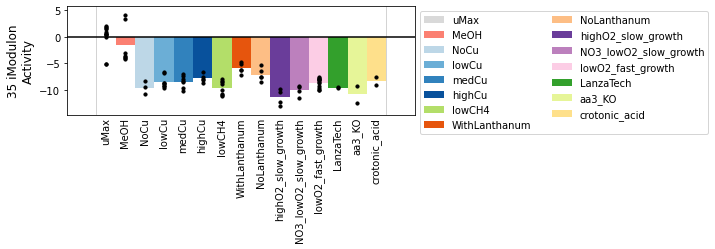

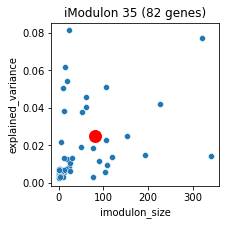

imodulon       go_name        pvalue    qvalue  precision    recall  \
160        35  SOS response  2.165641e-07  0.000889   0.085366  0.291667   
161        35    DNA repair  6.354203e-06  0.013036   0.097561  0.150943   
32         35           NaN  5.035684e-08  0.000017   0.060976  0.714286   

      f1score   TP  target_set_size  imodulon_size        source annotation  \
160  0.132075  7.0             24.0           82.0            GO        NaN   
161  0.118519  8.0             53.0           82.0            GO        NaN   
32   0.112360  5.0              7.0           82.0  KEGG modules     M00729   

    pathway_name module_name  
160          NaN         NaN  
161          NaN         NaN  
32           NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00195     0.041572         NaN        42874      43876      -1   
EQU24_RS00780     0.045558         NaN       161810     161999       1   
EQU24_RS01130     0.054554         NaN       230606     231530       1   
EQU24_RS01135     0.053064         NaN       231558     231840       1   
EQU24_RS01145     0.046167         NaN       233066     233924      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21435     0.041232         NaN      4826760    4827957       1   
EQU24_RS21805     0.052819         NaN      4919710    4919809       1   
EQU24_RS21860     0.044436         NaN      4931084    4931348       1   
EQU24_RS21865     0.041809         NaN      4931344    4931812       1   
EQU24_RS21870     0.056937         NaN      4931798    4932107       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00195                  DUF4338 domain-containing protein   L   
EQU24_RS00780                               hypothetical protein   X   
EQU24_RS01130                                ATP-binding protein   U   
EQU24_RS01135                               hypothetical protein   X   
EQU24_RS01145                                  3'-5' exonuclease   L   
...                                                          ...  ..   
EQU24_RS21435                               hypothetical protein   N   
EQU24_RS21805                               hypothetical protein   X   
EQU24_RS21860   type II toxin-antitoxin system HicA family toxin   S   
EQU24_RS21865  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS21870                               hypothetical protein   X   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00195              Replication, recombination and repair   
EQU24_RS00780                                  No COG annotation   
EQU24_RS01130  Intracellular trafficking, secretion, and vesi...   
EQU24_RS01135                                  No COG annotation   
EQU24_RS01145              Replication, recombination and repair   
...                                                          ...   
EQU24_RS21435                                      Cell motility   
EQU24_RS21805                                  No COG annotation   
EQU24_RS21860                                   Function unknown   
EQU24_RS21865                                   Function unknown   
EQU24_RS21870                                  No COG annotation   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00195            NaN   2805   
EQU24_RS00780            NaN   2724   
EQU24_RS01130  UPI000344DE75   2673   
EQU24_RS01135     A0A4P9ULJ3   2673   
EQU24_RS01145     A0A4P9UKZ5   2672   
...                      ...    ...   
EQU24_RS21435     A0A4P9UUU8     92   
EQU24_RS21805            NaN     44   
EQU24_RS21860     A0A4P9UXL9     39   
EQU24_RS21865     A0A4P9USZ2     39   
EQU24_RS21870     A0A4P9USS0     39   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00195                     EQU24_RS00195 // EQU24_RS00190   
EQU24_RS00780                                      EQU24_RS00780   
EQU24_RS01130  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01135  EQU24_RS01140 // EQU24_RS01135 // EQU24_RS0113...   
EQU24_RS01145                                      EQU24_RS01145   
...                                                          ...   
EQU24_RS21435    EQU24_RS21440 // EQU24_RS21435 // EQU24_RS21430   
EQU24_RS21805                     EQU24_RS21810 // EQU24_RS21805   
EQU24_RS21860    EQU24_RS21870 // EQU24_RS

In [92]:
imod_info(35)

In [93]:
ica_data.imodulon_table.loc[35,'function'] = 'SOS-response_EW'


## iMod 36

iModulon 36


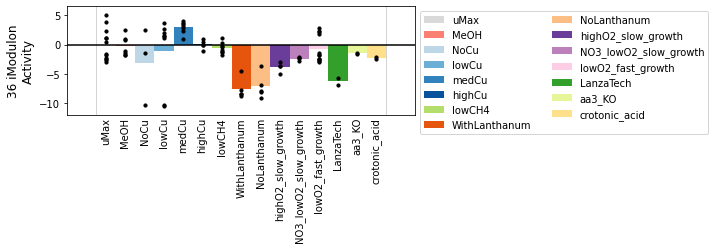

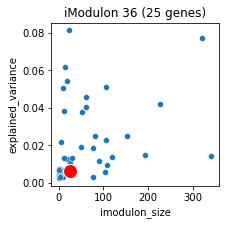

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00085     0.077739         NaN        21633      22416       1   
EQU24_RS01540    -0.076857         NaN       326828     327071      -1   
EQU24_RS02780     0.161898         NaN       598789     598877      -1   
EQU24_RS02970     0.151588        pqqA       634777     634852      -1   
EQU24_RS03880     0.086632        rplD       829208     829829       1   
EQU24_RS05645     0.117876         NaN      1220955    1221031       1   
EQU24_RS06390     0.105940         NaN      1400455    1402006       1   
EQU24_RS07075     0.062626         NaN      1553449    1554748       1   
EQU24_RS07825     0.064367         NaN      1730478    1730676       1   
EQU24_RS07965     0.127104         NaN      1758864    1758940       1   
EQU24_RS09525     0.069532         NaN      2115349    2115434       1   
EQU24_RS10610     0.075176         NaN      2360377    2360764      -1   
EQU24_RS13045    -0.070996         NaN      2918882    2920169       1   
EQU24_RS13975    -0.070518         NaN      3122064    3122141      -1   
EQU24_RS14550    -0.101501         NaN      3251911    3252262      -1   
EQU24_RS16370    -0.059281         NaN      3676994    3677465      -1   
EQU24_RS16575     0.093795         NaN      3719991    3720067      -1   
EQU24_RS17360    -0.069075         NaN      3888781    3890065      -1   
EQU24_RS17915    -0.058440         NaN      4005879    4006065       1   
EQU24_RS18555    -0.074262         NaN      4143018    4143095      -1   
EQU24_RS20235    -0.074433         NaN      4566875    4567184       1   
EQU24_RS20610     0.131459         NaN      4646544    4647282      -1   
EQU24_RS20650     0.161687         NaN      4658178    4658265       1   
EQU24_RS20900     0.087281         NaN      4708570    4708813      -1   
EQU24_RS21260     0.086824         NaN      4791094    4791280       1   

                                                       product COG  \
locus_tag                                                            
EQU24_RS00085        prolipoprotein diacylglyceryl transferase   M   
EQU24_RS01540                             hypothetical protein   X   
EQU24_RS02780                                              NaN   X   
EQU24_RS02970  pyrroloquinoline quinone precursor peptide PqqA   X   
EQU24_RS03880                         50S ribosomal protein L4   J   
EQU24_RS05645                                              NaN   X   
EQU24_RS06390                          IS66 family transposase   L   
EQU24_RS07075                        M18 family aminopeptidase   E   
EQU24_RS07825                             hypothetical protein   X   
EQU24_RS07965                                              NaN   X   
EQU24_RS09525                                              NaN   X   
EQU24_RS10610                   STAS domain-containing protein   T   
EQU24_RS13045                         ISNCY family transposase   L   
EQU24_RS13975                                              NaN   X   
EQU24_RS14550         four-helix bundle copper-binding protein   C   
EQU24_RS16370       helix-turn-helix domain-containing protein   X   
EQU24_RS16575                                              NaN   X   
EQU24_RS17360                        ISKra4 family transposase   L   
EQU24_RS17915                             hypothetical protein   X   
EQU24_RS18555                                              NaN   X   
EQU24_RS20235                             hypothetical protein   L   
EQU24_RS20610                         ISAs1 family transposase   L   
EQU24_RS20650                                              NaN   X   
EQU24_RS20900                             hypothetical protein   X   
EQU24_RS21260                             hypothetical protein   X   

                                                      cog_name        uniprot  \
locus_tag                                   

In [94]:
imod_info(36)

In [95]:
ica_data.imodulon_table.loc[36,'function'] = 'pqqa/transposase?_EW'

## iMod 37

iModulon 37


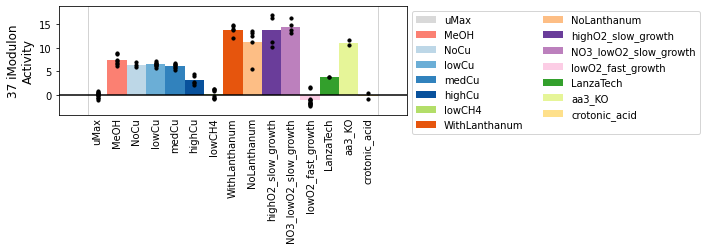

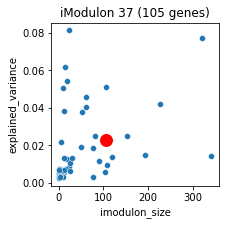

imodulon                         go_name        pvalue        qvalue  \
26         37                             NaN  1.113658e-10  2.817556e-08   
162        37  cobalamin biosynthetic process  2.226000e-12  9.133277e-09   
41         37                             NaN  1.885529e-03  7.123109e-02   
33         37                             NaN  1.505202e-05  2.558843e-03   
34         37                             NaN  1.505202e-05  2.558843e-03   
35         37                             NaN  5.911404e-05  6.699591e-03   
36         37                             NaN  6.153792e-04  2.615362e-02   
37         37                             NaN  6.153792e-04  2.615362e-02   
38         37                             NaN  6.153792e-04  2.615362e-02   
39         37                             NaN  6.153792e-04  2.615362e-02   
40         37                             NaN  6.153792e-04  2.615362e-02   

     precision    recall   f1score    TP  target_set_size  imodulon_size  \
26    0.123810  0.260000  0.167742  13.0             50.0          105.0   
162   0.095238  0.555556  0.162602  10.0             18.0          105.0   
41    0.038095  0.181818  0.062992   4.0             22.0          105.0   
33    0.028571  1.000000  0.055556   3.0              3.0          105.0   
34    0.028571  1.000000  0.055556   3.0              3.0          105.0   
35    0.028571  0.750000  0.055046   3.0              4.0          105.0   
36    0.019048  1.000000  0.037383   2.0              2.0          105.0   
37    0.019048  1.000000  0.037383   2.0              2.0          105.0   
38    0.019048  1.000000  0.037383   2.0              2.0          105.0   
39    0.019048  1.000000  0.037383   2.0              2.0          105.0   
40    0.019048  1.000000  0.037383   2.0              2.0          105.0   

            source annotation          pathway_name  \
26   KEGG pathways   map00860  Porphyrin metabolism   
162             GO        NaN                   NaN   
41    KEGG modules     M00121                   NaN   
33    KEGG modules     M00641                   NaN   
34    KEGG modules     M00642                   NaN   
35    KEGG modules     M00769                   NaN   
36    KEGG modules     M00245                   NaN   
37    KEGG modules     M00246                   NaN   
38    KEGG modules     M00698                   NaN   
39    KEGG modules     M00767                   NaN   
40    KEGG modules     M00768                   NaN   

                                           module_name  
26                                                 NaN  
162                                                NaN  
41   Heme biosynthesis, plants and bacteria, glutam...  
33        Multidrug resistance, efflux pump MexEF-OprN  
34        Multidrug resistance, efflux pump MexJK-OprM  
35        Multidrug resistance, efflux pump MexPQ-OpmE  
36                                                 NaN  
37                                                 NaN  
38        Multidrug resistance, efflux pump BpeEF-OprC  
39                                                 NaN  
40                                                 NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00075     0.066675        tatB        19487      19799       1   
EQU24_RS00670    -0.037800         NaN       139733     140330       1   
EQU24_RS00945    -0.040286         NaN       194231     194402       1   
EQU24_RS01375    -0.047809         NaN       286650     287097      -1   
EQU24_RS01455     0.040897         NaN       302485     302698      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21260     0.048779         NaN      4791094    4791280       1   
EQU24_RS21645     0.040588         NaN      4886529    4886943      -1   
EQU24_RS21950    -0.040816         NaN      4951896    4953342       1   
EQU24_RS21955    -0.048876        hflK      4953432    4954593       1   
EQU24_RS22110    -0.044549         NaN      4992034    4992421       1   

                                                   product COG  \
locus_tag                                                        
EQU24_RS00075       twin-arginine translocase subunit TatB   U   
EQU24_RS00670                         hypothetical protein   X   
EQU24_RS00945                        metal-binding protein   X   
EQU24_RS01375                         hypothetical protein   X   
EQU24_RS01455          formate dehydrogenase subunit delta   C   
...                                                    ...  ..   
EQU24_RS21260                         hypothetical protein   X   
EQU24_RS21645                         hypothetical protein   X   
EQU24_RS21950  sigma-70 family RNA polymerase sigma factor   K   
EQU24_RS21955        FtsH protease activity modulator HflK   O   
EQU24_RS22110                         hypothetical protein   X   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00670                                  No COG annotation   
EQU24_RS00945                                  No COG annotation   
EQU24_RS01375                                  No COG annotation   
EQU24_RS01455                   Energy production and conversion   
...                                                          ...   
EQU24_RS21260                                  No COG annotation   
EQU24_RS21645                                  No COG annotation   
EQU24_RS21950                                      Transcription   
EQU24_RS21955  Post-translational modification, protein turno...   
EQU24_RS22110                                  No COG annotation   

                     uniprot  tu_id               tu_name    ncbi_protein  \
locus_tag                                                                   
EQU24_RS00075     A0A4P9UII1   2822          tatB // tatA  WP_017841462.1   
EQU24_RS00670     A0A4P9ULC6   2740         EQU24_RS00670  WP_017841358.1   
EQU24_RS00945     A0A4P9UKG7   2703         EQU24_RS00945  WP_017841309.1   
EQU24_RS01375     A0A4P9ULN4   2643         EQU24_RS01375  WP_017841222.1   
EQU24_RS01455     A0A4P9UIZ0   2630         EQU24_RS01455  WP_014146724.1   
...                      ...    ...                   ...             ...   
EQU24_RS21260            NaN    120         EQU24_RS21260             NaN   
EQU24_RS21645  UPI00034CBEF0     65         EQU24_RS21645  WP_138767255.1   
EQU24_RS21950  UPI00034C420F     26         EQU24_RS21950  WP_175421718.1   
EQU24_RS21955     A0A4P9USU2     25  hflB // hflC // hflK  WP_017841512.1   
EQU24_RS22110     A0A4P9UV47      6         EQU24_RS22110  WP_017841480.1   

              gene_name_extra  \
locus_tag                       
EQU24_RS00075      tatB||tatB   
EQU24_RS00670          ||None   
EQU24_RS00945          ||None   
EQU24_RS01375          ||None   
EQU24_RS01455          ||None   
...                       ...   
EQU24_RS21260              ||   
EQU24_RS2

In [96]:
imod_info(37)

In [97]:
ica_data.imodulon_table.loc[37,'function'] = 'multi-drug-resistance/efflux-pump/cobalamin_EW'

## iMod 38

iModulon 38


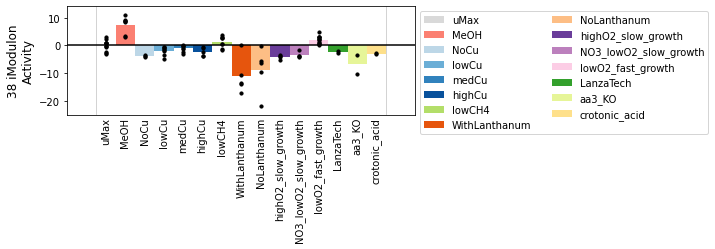

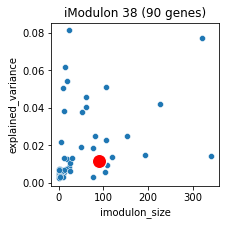

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00205    -0.054814         NaN        44526      46077      -1   
EQU24_RS00295     0.068383         NaN        62264      62591      -1   
EQU24_RS00385     0.097767         NaN        82311      82518      -1   
EQU24_RS00780     0.041916         NaN       161810     161999       1   
EQU24_RS00810     0.042176         NaN       168998     169187      -1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21035     0.048829        rpmG      4740703    4740859      -1   
EQU24_RS21530     0.049257         NaN      4854371    4854581       1   
EQU24_RS21575     0.044485         tkt      4864563    4866576      -1   
EQU24_RS21695     0.043330         NaN      4894937    4895231       1   
EQU24_RS22050    -0.050109         NaN      4980305    4980677       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS00295                               hypothetical protein   X   
EQU24_RS00385                               hypothetical protein   X   
EQU24_RS00780                               hypothetical protein   X   
EQU24_RS00810                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS21035                          50S ribosomal protein L33   J   
EQU24_RS21530                           (2Fe-2S)-binding protein   P   
EQU24_RS21575                                      transketolase   H   
EQU24_RS21695                               hypothetical protein   X   
EQU24_RS22050  winged helix-turn-helix transcriptional regulator   K   

                                                      cog_name     uniprot  \
locus_tag                                                                    
EQU24_RS00205            Replication, recombination and repair         NaN   
EQU24_RS00295                                No COG annotation         NaN   
EQU24_RS00385                                No COG annotation         NaN   
EQU24_RS00780                                No COG annotation         NaN   
EQU24_RS00810                                No COG annotation         NaN   
...                                                        ...         ...   
EQU24_RS21035  Translation, ribosomal structure and biogenesis  A0A4P9USL4   
EQU24_RS21530           Inorganic ion transport and metabolism  A0A4P9USL5   
EQU24_RS21575                Coenzyme transport and metabolism  A0A4P9UVR0   
EQU24_RS21695                                No COG annotation         NaN   
EQU24_RS22050                                    Transcription  A0A4P9UV38   

               tu_id                                            tu_name  \
locus_tag                                                                 
EQU24_RS00205   2803                                      EQU24_RS00205   
EQU24_RS00295   2788                                      EQU24_RS00295   
EQU24_RS00385   2778                                      EQU24_RS00385   
EQU24_RS00780   2724                                      EQU24_RS00780   
EQU24_RS00810   2719  EQU24_RS00825 // EQU24_RS00820 // EQU24_RS0081...   
...              ...                                                ...   
EQU24_RS21035    145                                       rpmB // rpmG   
EQU24_RS21530     82                                      EQU24_RS21530   
EQU24_RS21575     70                                                tkt   
EQU24_RS21695     56                                      EQU24_RS21695   
EQU24_RS22050     12                                      EQU24_RS22050   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00205  WP_24431089

In [98]:
imod_info(38)

In [99]:
ica_data.imodulon_table.loc[38,'function'] = 'medium-unclear_EW'

## iMod 39

iModulon 39


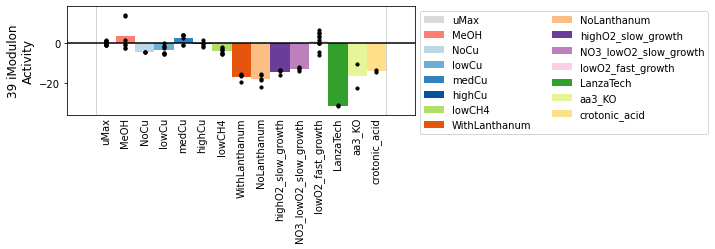

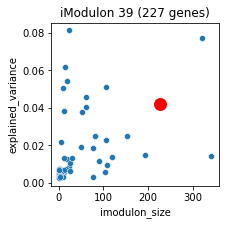

imodulon                                   go_name        pvalue  \
163        39                             ion transport  4.766533e-07   
166        39                          cation transport  9.180819e-06   
167        39  inorganic cation transmembrane transport  1.269466e-05   
168        39                       metal ion transport  2.297447e-05   
164        39           sulfate transmembrane transport  4.013291e-06   
165        39     ABC-type sulfate transporter activity  8.218975e-06   
42         39                                       NaN  8.218975e-06   

       qvalue  precision    recall   f1score    TP  target_set_size  \
163  0.001956   0.057269  0.282609  0.095238  13.0             46.0   
166  0.009417   0.039648  0.321429  0.070588   9.0             28.0   
167  0.010417   0.039648  0.310345  0.070312   9.0             48.0   
168  0.015711   0.030837  0.388889  0.057143   7.0             21.0   
164  0.008233   0.026432  0.600000  0.050633   6.0             10.0   
165  0.009417   0.017621  1.000000  0.034632   4.0              4.0   
42   0.002794   0.017621  1.000000  0.034632   4.0              4.0   

     imodulon_size        source annotation pathway_name module_name  
163          227.0            GO        NaN          NaN         NaN  
166          227.0            GO        NaN          NaN         NaN  
167          227.0            GO        NaN          NaN         NaN  
168          227.0            GO        NaN          NaN         NaN  
164          227.0            GO        NaN          NaN         NaN  
165          227.0            GO        NaN          NaN         NaN  
42           227.0  KEGG modules     M00185          NaN         NaN

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00075     0.033511        tatB        19487      19799       1   
EQU24_RS00110     0.041197         NaN        25137      25554       1   
EQU24_RS00205     0.044732         NaN        44526      46077      -1   
EQU24_RS00510     0.032537         NaN       104333     104783       1   
EQU24_RS00945     0.029861         NaN       194231     194402       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS21760    -0.038597         NaN      4906513    4907704       1   
EQU24_RS21860     0.029987         NaN      4931084    4931348       1   
EQU24_RS21865     0.033558         NaN      4931344    4931812       1   
EQU24_RS21950    -0.031322         NaN      4951896    4953342       1   
EQU24_RS21965    -0.035936        hflB      4955491    4957390       1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00075             twin-arginine translocase subunit TatB   U   
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS00510                GatB/YqeY domain-containing protein   S   
EQU24_RS00945                              metal-binding protein   X   
...                                                          ...  ..   
EQU24_RS21760                                     amidohydrolase   S   
EQU24_RS21860   type II toxin-antitoxin system HicA family toxin   S   
EQU24_RS21865  type II toxin-antitoxin system HicB family ant...   S   
EQU24_RS21950        sigma-70 family RNA polymerase sigma factor   K   
EQU24_RS21965            ATP-dependent zinc metalloprotease FtsH   O   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00205              Replication, recombination and repair   
EQU24_RS00510                                   Function unknown   
EQU24_RS00945                                  No COG annotation   
...                                                          ...   
EQU24_RS21760                                   Function unknown   
EQU24_RS21860                                   Function unknown   
EQU24_RS21865                                   Function unknown   
EQU24_RS21950                                      Transcription   
EQU24_RS21965  Post-translational modification, protein turno...   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00075     A0A4P9UII1   2822   
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00205            NaN   2803   
EQU24_RS00510     A0A4P9UIP9   2762   
EQU24_RS00945     A0A4P9UKG7   2703   
...                      ...    ...   
EQU24_RS21760     A0A4P9USQ2     48   
EQU24_RS21860     A0A4P9UXL9     39   
EQU24_RS21865     A0A4P9USZ2     39   
EQU24_RS21950  UPI00034C420F     26   
EQU24_RS21965     A0A4P9UXN7     25   

                                                       tu_name  \
locus_tag                                                        
EQU24_RS00075                                     tatB // tatA   
EQU24_RS00110                            speD // EQU24_RS00110   
EQU24_RS00205                                    EQU24_RS00205   
EQU24_RS00510                            EQU24_RS00510 // rpsU   
EQU24_RS00945                                    EQU24_RS00945   
...                                                        ...   
EQU24_RS21760                                    EQU24_RS21760   
EQU24_RS21860  EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860   
EQU24_RS21865  EQU24_RS21870 // EQU24_RS21865 // EQU24_RS21860

In [100]:
imod_info(39)

In [101]:
ica_data.imodulon_table.loc[39,'function'] = 'metal-ion-transport?_EW'

## iMod 40

iModulon 40


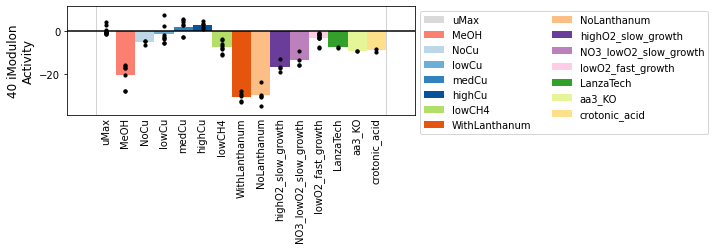

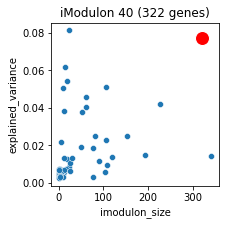

imodulon                                          go_name        pvalue  \
172        40                     peptide biosynthetic process  1.395994e-37   
179        40                       amide biosynthetic process  8.953067e-33   
173        40                        peptide metabolic process  2.178152e-35   
183        40  cellular nitrogen compound biosynthetic process  8.552648e-26   
175        40                                      translation  3.444377e-34   
..        ...                                              ...           ...   
351        40     P-type proton-exporting transporter activity  3.938465e-03   
352        40      cell envelope Sec protein transport complex  3.938465e-03   
353        40                    protein targeting to membrane  3.938465e-03   
354        40                           urea metabolic process  3.938465e-03   
349        40                          cytoplasmic translation  3.938465e-03   

           qvalue  precision    recall   f1score    TP  target_set_size  \
172  1.458916e-34   0.170807  0.567010  0.262530  55.0             97.0   
179  3.339494e-30   0.180124  0.456693  0.258352  58.0            127.0   
173  1.787392e-32   0.170807  0.528846  0.258216  55.0            104.0   
183  2.339434e-23   0.239130  0.274021  0.255390  77.0            281.0   
175  2.018897e-31   0.167702  0.519231  0.253521  54.0            104.0   
..            ...        ...       ...       ...   ...              ...   
351  8.687914e-02   0.009317  0.600000  0.018349   3.0              5.0   
352  8.687914e-02   0.009317  0.600000  0.018349   3.0              5.0   
353  8.687914e-02   0.009317  0.600000  0.018349   3.0              5.0   
354  8.687914e-02   0.009317  0.600000  0.018349   3.0              5.0   
349  8.687914e-02   0.009317  0.600000  0.018349   3.0              5.0   

     imodulon_size source annotation pathway_name module_name  
172          322.0     GO        NaN          NaN         NaN  
179          322.0     GO        NaN          NaN         NaN  
173          322.0     GO        NaN          NaN         NaN  
183          322.0     GO        NaN          NaN         NaN  
175          322.0     GO        NaN          NaN         NaN  
..             ...    ...        ...          ...         ...  
351          322.0     GO        NaN          NaN         NaN  
352          322.0     GO        NaN          NaN         NaN  
353          322.0     GO        NaN          NaN         NaN  
354          322.0     GO        NaN          NaN         NaN  
349          322.0     GO        NaN          NaN         NaN  

[194 rows x 14 columns]

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00110     0.043061         NaN        25137      25554       1   
EQU24_RS00115     0.029646        speD        25560      26349       1   
EQU24_RS00205     0.034007         NaN        44526      46077      -1   
EQU24_RS00335     0.045457         NaN        73303      74293       1   
EQU24_RS00340     0.034364         NaN        74273      75077       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS22110     0.032886         NaN      4992034    4992421       1   
EQU24_RS22140     0.034343        yidC      4996295    4997993      -1   
EQU24_RS22145     0.026282        yidD      4997998    4998220      -1   
EQU24_RS22150     0.036919        rnpA      4998201    4998570      -1   
EQU24_RS22155     0.033874        rpmH      4998574    4998709      -1   

                                                         product COG  \
locus_tag                                                              
EQU24_RS00110                                OsmC family protein   O   
EQU24_RS00115                   adenosylmethionine decarboxylase   E   
EQU24_RS00205                            IS66 family transposase   L   
EQU24_RS00335                               hypothetical protein   X   
EQU24_RS00340                               hypothetical protein   X   
...                                                          ...  ..   
EQU24_RS22110                               hypothetical protein   X   
EQU24_RS22140                    membrane protein insertase YidC   U   
EQU24_RS22145  membrane protein insertion efficiency factor YidD   S   
EQU24_RS22150                   ribonuclease P protein component   J   
EQU24_RS22155                          50S ribosomal protein L34   J   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00110  Post-translational modification, protein turno...   
EQU24_RS00115                Amino acid transport and metabolism   
EQU24_RS00205              Replication, recombination and repair   
EQU24_RS00335                                  No COG annotation   
EQU24_RS00340                                  No COG annotation   
...                                                          ...   
EQU24_RS22110                                  No COG annotation   
EQU24_RS22140  Intracellular trafficking, secretion, and vesi...   
EQU24_RS22145                                   Function unknown   
EQU24_RS22150    Translation, ribosomal structure and biogenesis   
EQU24_RS22155    Translation, ribosomal structure and biogenesis   

                     uniprot  tu_id  \
locus_tag                             
EQU24_RS00110     A0A4V1IJB6   2817   
EQU24_RS00115            NaN   2817   
EQU24_RS00205            NaN   2803   
EQU24_RS00335     A0A4P9UIH1   2783   
EQU24_RS00340  UPI00034930B0   2783   
...                      ...    ...   
EQU24_RS22110     A0A4P9UV47      6   
EQU24_RS22140     A0A4V1IKE6      1   
EQU24_RS22145  UPI000A004C04      1   
EQU24_RS22150     A0A4P9UT31      1   
EQU24_RS22155  UPI00034B9E08      1   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS00110                              speD // EQU24_RS00110   
EQU24_RS00115                              speD // EQU24_RS00110   
EQU24_RS00205                                      EQU24_RS00205   
EQU24_RS00335  EQU24_RS00345 // EQU24_RS00340 // EQU24_RS0033...   
EQU24_RS00340  EQU24_RS00345 // EQU24_RS00340 // EQU24_RS0033...   
...                                                          ...   
EQU24_RS22110                                      EQU24_RS22110   
EQU24_RS22140               rpmH // rnpA // yidD // yidC // mnmE   
EQU24_RS22145               rpmH // rnpA /

In [102]:
imod_info(40)

In [103]:
ica_data.imodulon_table.loc[40,'function'] = 'ribosomal/translation_EW'

## iMod 41

iModulon 41


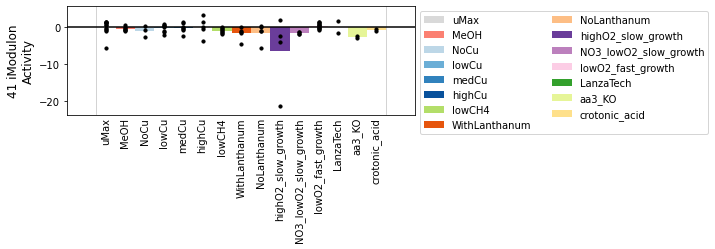

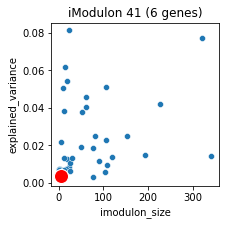

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00075    -0.143426        tatB        19487      19799       1   
EQU24_RS01150     0.236128         NaN       234038     234461       1   
EQU24_RS01555    -0.203130         NaN       328948     329197       1   
EQU24_RS03455     0.227519         NaN       734828     735008      -1   
EQU24_RS06205     0.281178         NaN      1352804    1353026      -1   
EQU24_RS10680     0.226042         NaN      2374756    2375617      -1   

                                              product COG  \
locus_tag                                                   
EQU24_RS00075  twin-arginine translocase subunit TatB   U   
EQU24_RS01150                    hypothetical protein   X   
EQU24_RS01555                    hypothetical protein   X   
EQU24_RS03455                    hypothetical protein   X   
EQU24_RS06205                    hypothetical protein   X   
EQU24_RS10680                  IS4 family transposase   L   

                                                        cog_name  \
locus_tag                                                          
EQU24_RS00075  Intracellular trafficking, secretion, and vesi...   
EQU24_RS01150                                  No COG annotation   
EQU24_RS01555                                  No COG annotation   
EQU24_RS03455                                  No COG annotation   
EQU24_RS06205                                  No COG annotation   
EQU24_RS10680              Replication, recombination and repair   

                     uniprot  tu_id                         tu_name  \
locus_tag                                                             
EQU24_RS00075     A0A4P9UII1   2822                    tatB // tatA   
EQU24_RS01150     A0A4P9UIU6   2671                   EQU24_RS01150   
EQU24_RS01555            NaN   2616                   EQU24_RS01555   
EQU24_RS03455            NaN   2375                   EQU24_RS03455   
EQU24_RS06205            NaN   2050                   EQU24_RS06205   
EQU24_RS10680  UPI0015862106   1488  EQU24_RS10685 // EQU24_RS10680   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS00075  WP_017841462.1      tatB||tatB   
EQU24_RS01150  WP_017841268.1          ||None   
EQU24_RS01555             NaN              ||   
EQU24_RS03455             NaN              ||   
EQU24_RS06205             NaN              ||   
EQU24_RS10680  WP_175421679.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS00075  peptide transport\namide transport\norganic su...   
EQU24_RS01150                                                NaN   
EQU24_RS01555                     integral component of membrane   
EQU24_RS03455                                                NaN   
EQU24_RS06205  phosphorelay signal transduction system\ninteg...   
EQU24_RS10680  DNA binding\ntransposase activity\ntranspositi...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS00075  ['peptide transport' 'amide transport' 'organi...  
EQU24_RS01150                                                 []  
EQU24_RS01555                 ['integral component of membrane']  
EQU24_RS03455                                                 []  
EQU24_RS06205  ['phosphorelay signal transduction system'\n '...  
EQU24_RS10680  ['DNA binding' 'transposase activity' 'transpo...

In [104]:
imod_info(41)

In [105]:
ica_data.imodulon_table.loc[41,'function'] = 'small-unclear/outlier-response-highO2_slow_FM69_t3_TR1_UW_EW'

## iMod 42

iModulon SG_5


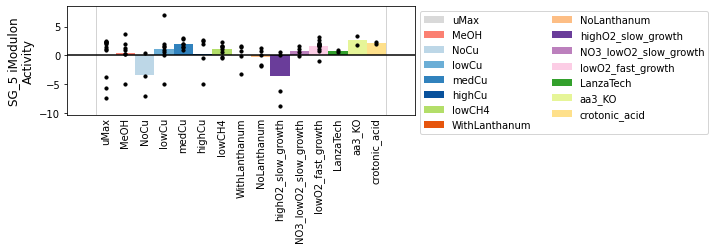

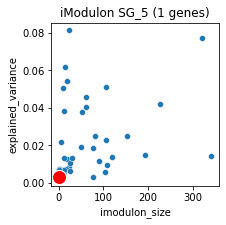

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS12140     0.607354        cas2      2713901    2714186      -1   

                                           product COG  \
locus_tag                                                
EQU24_RS12140  CRISPR-associated endonuclease Cas2   L   

                                            cog_name     uniprot  tu_id  \
locus_tag                                                                 
EQU24_RS12140  Replication, recombination and repair  A0A4P9UNK1   1307   

                                             tu_name    ncbi_protein  \
locus_tag                                                              
EQU24_RS12140  cas2 // cas1 // EQU24_RS12130 // cas2  WP_017839245.1   

              gene_name_extra  \
locus_tag                       
EQU24_RS12140      cas2||cas2   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS12140  RNA phosphodiester bond hydrolysis, endonucleo...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS12140  ['RNA phosphodiester bond hydrolysis, endonucl...

In [106]:
imod_info("SG_5")

In [107]:
ica_data.imodulon_table.loc[42,'function'] = 'sg-cas2_EW'

## iMod 43

iModulon 43


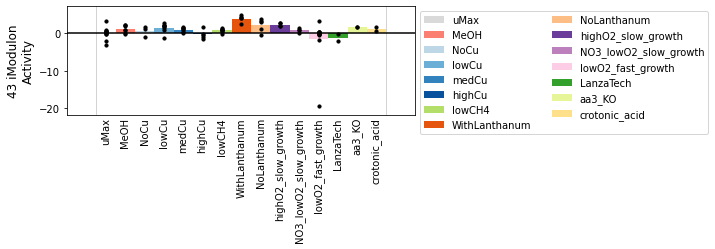

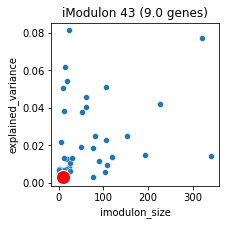

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS01385     0.139584        lexA       287898     288525       1   
EQU24_RS01760     0.147521        cydX       371326     371470       1   
EQU24_RS07995    -0.150991         NaN      1765410    1766609      -1   
EQU24_RS10960     0.266817         NaN      2446125    2446314      -1   
EQU24_RS12140     0.256993        cas2      2713901    2714186      -1   
EQU24_RS14765     0.328880         NaN      3301430    3301946       1   
EQU24_RS17665     0.126132         NaN      3938733    3940029      -1   
EQU24_RS18430     0.194838         NaN      4111371    4112844       1   
EQU24_RS19095     0.116880         NaN      4273547    4273898       1   

                                            product COG  \
locus_tag                                                 
EQU24_RS01385        transcriptional repressor LexA   K   
EQU24_RS01760  cytochrome bd-I oxidase subunit CydX   S   
EQU24_RS07995                IS3 family transposase   L   
EQU24_RS10960                  hypothetical protein   X   
EQU24_RS12140   CRISPR-associated endonuclease Cas2   L   
EQU24_RS14765                  hypothetical protein   S   
EQU24_RS17665                IS4 family transposase   L   
EQU24_RS18430                IS4 family transposase   L   
EQU24_RS19095                  hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS01385                          Transcription     A0A4P9UIS2    309   
EQU24_RS01760                       Function unknown  UPI0003472C68   2591   
EQU24_RS07995  Replication, recombination and repair  UPI00110CA4C7   1825   
EQU24_RS10960                      No COG annotation     A0A4P9UNA8   1458   
EQU24_RS12140  Replication, recombination and repair     A0A4P9UNK1   1307   
EQU24_RS14765                       Function unknown     A0A4P9UPN4    965   
EQU24_RS17665  Replication, recombination and repair  UPI00110CD44A    595   
EQU24_RS18430  Replication, recombination and repair  UPI0015860BBF    501   
EQU24_RS19095                      No COG annotation            NaN    415   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS01385                                               lexA   
EQU24_RS01760                                               cydX   
EQU24_RS07995                                      EQU24_RS07995   
EQU24_RS10960  EQU24_RS10970 // EQU24_RS10965 // EQU24_RS1096...   
EQU24_RS12140              cas2 // cas1 // EQU24_RS12130 // cas2   
EQU24_RS14765                     EQU24_RS14765 // EQU24_RS14760   
EQU24_RS17665                                      EQU24_RS17665   
EQU24_RS18430                                      EQU24_RS18430   
EQU24_RS19095                                      EQU24_RS19095   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS01385  WP_017841220.1      lexA||lexA   
EQU24_RS01760  WP_017841155.1      cydX||cydX   
EQU24_RS07995  WP_138767126.1          ||None   
EQU24_RS10960  WP_017839463.1          ||None   
EQU24_RS12140  WP_017839245.1      cas2||cas2   
EQU24_RS14765  WP_017838761.1          ||None   
EQU24_RS17665  WP_138767208.1          ||None   
EQU24_RS18430  WP_175421704.1          ||None   
EQU24_RS19095             NaN              ||   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS01385  positive regulation of nucleic acid-templated ...   
EQU24_RS01760  integral component of plasma membrane\nouter m...   
EQU24_RS07995  DNA integration\nsequence-specific DNA binding...   
EQU24_RS10960                                                N

In [108]:
imod_info(43)

In [109]:
ica_data.imodulon_table.loc[43,'function'] = 'unclear/outlier-response-FM19_TR3_QC_EW'

## iMod 44

iModulon SG_6


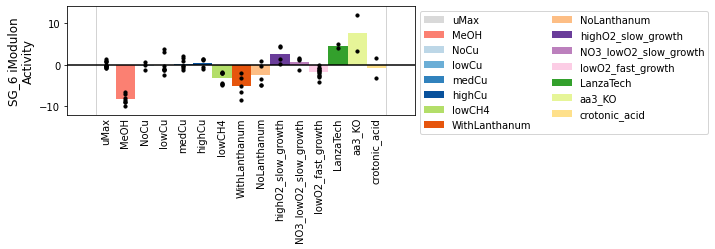

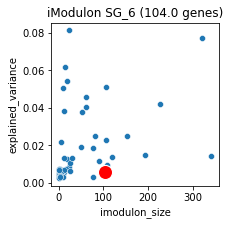

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00030    -0.039019         NaN         7098       7257       1   
EQU24_RS00160    -0.039055         NaN        36419      36716      -1   
EQU24_RS00185    -0.053982         NaN        42145      42478      -1   
EQU24_RS00200    -0.045583         NaN        44158      44386       1   
EQU24_RS00240    -0.043647         NaN        49350      49572       1   
...                    ...         ...          ...        ...     ...   
EQU24_RS20770    -0.063260         NaN      4678204    4678414      -1   
EQU24_RS20900     0.054315         NaN      4708570    4708813      -1   
EQU24_RS20950     0.037053         NaN      4717305    4718589      -1   
EQU24_RS20990    -0.044448         NaN      4725051    4725498       1   
EQU24_RS21805    -0.077949         NaN      4919710    4919809       1   

                                         product COG  \
locus_tag                                              
EQU24_RS00030  DUF2283 domain-containing protein   S   
EQU24_RS00160               hypothetical protein   X   
EQU24_RS00185               hypothetical protein   L   
EQU24_RS00200               hypothetical protein   X   
EQU24_RS00240               hypothetical protein   X   
...                                          ...  ..   
EQU24_RS20770               hypothetical protein   X   
EQU24_RS20900               hypothetical protein   X   
EQU24_RS20950          ISKra4 family transposase   L   
EQU24_RS20990  Rsd/AlgQ family anti-sigma factor   K   
EQU24_RS21805               hypothetical protein   X   

                                            cog_name        uniprot  tu_id  \
locus_tag                                                                    
EQU24_RS00030                       Function unknown            NaN   2827   
EQU24_RS00160                      No COG annotation     A0A4P9UIE4   2811   
EQU24_RS00185  Replication, recombination and repair     A0A4P9UIJ4   2806   
EQU24_RS00200                      No COG annotation            NaN   2804   
EQU24_RS00240                      No COG annotation            NaN   2798   
...                                              ...            ...    ...   
EQU24_RS20770                      No COG annotation            NaN    190   
EQU24_RS20900                      No COG annotation     A0A4P9USB7    167   
EQU24_RS20950  Replication, recombination and repair     A0A4V1IKC4    161   
EQU24_RS20990                          Transcription  UPI000347E4E3    153   
EQU24_RS21805                      No COG annotation            NaN     44   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS00030  EQU24_RS00030 // EQU24_RS00025             NaN              ||   
EQU24_RS00160                   EQU24_RS00160  WP_017841445.1          ||None   
EQU24_RS00185                   EQU24_RS00185  WP_017841440.1          ||None   
EQU24_RS00200                   EQU24_RS00200             NaN              ||   
EQU24_RS00240                   EQU24_RS00240             NaN              ||   
...                                       ...             ...             ...   
EQU24_RS20770  EQU24_RS20775 // EQU24_RS20770  WP_017841721.1          ||None   
EQU24_RS20900  EQU24_RS20900 // EQU24_RS20895  WP_017841694.1          ||None   
EQU24_RS20950                   EQU24_RS20950  WP_017841684.1          ||None   
EQU24_RS20990                   EQU24_RS20990  WP_026130281.1          ||None   
EQU24_RS21805  EQU24_RS21810 // EQU24_RS21805             NaN              ||   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS00030                                                NaN   
EQU24_RS00160                                     

In [110]:
imod_info('SG_6')

In [111]:
ica_data.imodulon_table.loc["SG_6",'function'] = 'sg-tonB_EW'

## iMod 45

iModulon SG_7


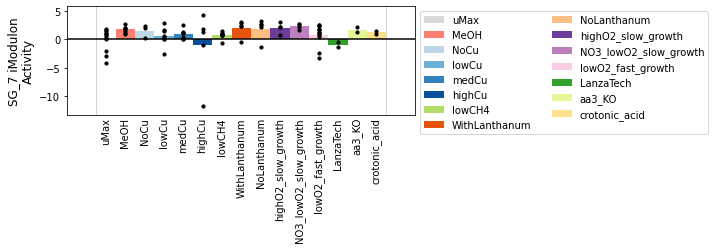

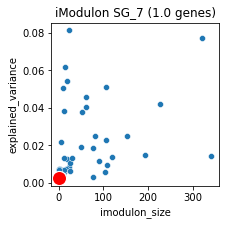

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS00175     0.468156         NaN        39992      40271      -1   

                            product COG  \
locus_tag                                 
EQU24_RS00175  hypothetical protein   L   

                                            cog_name     uniprot  tu_id  \
locus_tag                                                                 
EQU24_RS00175  Replication, recombination and repair  A0A4P9UIR2   2808   

                     tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                      
EQU24_RS00175  EQU24_RS00175  WP_017841442.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS00175  DNA binding\ntransposase activity\ntranspositi...   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS00175  ['DNA binding' 'transposase activity' 'transpo...

In [112]:
imod_info("SG_7")

In [113]:
ica_data.imodulon_table.loc[45,'function'] = 'hypothetical-prot_EW'

## iMod 46

iModulon 46


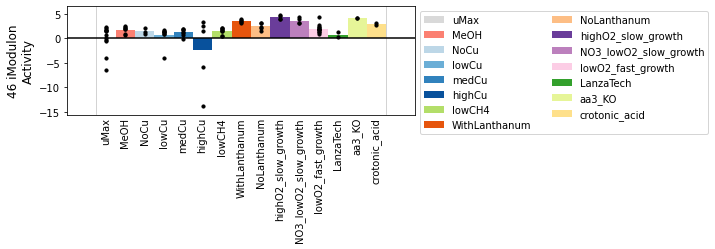

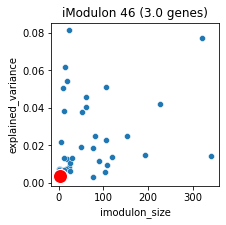

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS10965     0.338992         NaN      2446321    2446762      -1   
EQU24_RS16370     0.463511         NaN      3676994    3677465      -1   
EQU24_RS20905     0.218347         NaN      4709465    4710749       1   

                                                  product COG  \
locus_tag                                                       
EQU24_RS10965                          phage tail protein   S   
EQU24_RS16370  helix-turn-helix domain-containing protein   X   
EQU24_RS20905                   ISKra4 family transposase   L   

                                            cog_name     uniprot  tu_id  \
locus_tag                                                                 
EQU24_RS10965                       Function unknown  A0A4P9UN34   1458   
EQU24_RS16370                      No COG annotation  A0A4P9USW1    755   
EQU24_RS20905  Replication, recombination and repair  A0A4V1IKC4    166   

                                                         tu_name  \
locus_tag                                                          
EQU24_RS10965  EQU24_RS10970 // EQU24_RS10965 // EQU24_RS1096...   
EQU24_RS16370                     EQU24_RS16370 // EQU24_RS16365   
EQU24_RS20905                                      EQU24_RS20905   

                 ncbi_protein gene_name_extra  \
locus_tag                                       
EQU24_RS10965  WP_014148651.1          ||None   
EQU24_RS16370  WP_017842551.1          ||None   
EQU24_RS20905  WP_017841684.1          ||None   

                                                  specific_gos_n  \
locus_tag                                                          
EQU24_RS10965  acyltransferase activity\nstructural molecule ...   
EQU24_RS16370                                        DNA binding   
EQU24_RS20905                                                NaN   

                                                    specific_gos  
locus_tag                                                         
EQU24_RS10965  ['acyltransferase activity' 'structural molecu...  
EQU24_RS16370                                    ['DNA binding']  
EQU24_RS20905                                                 []

In [114]:
imod_info(46)

In [115]:
ica_data.imodulon_table.loc[46,'function'] = 'small-unclear_EW'

## iMod 47

iModulon 47


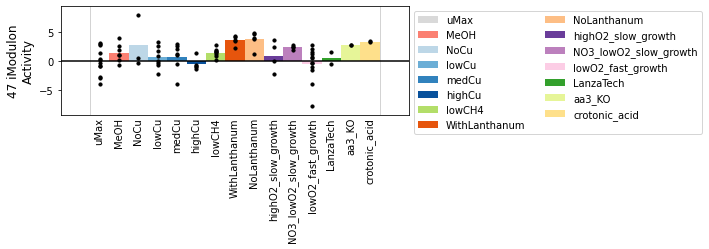

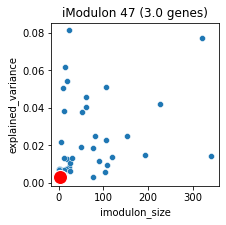

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS01150     0.233401         NaN       234038     234461       1   
EQU24_RS06390     0.341700         NaN      1400455    1402006       1   
EQU24_RS17185     0.324562         NaN      3857027    3858578       1   

                               product COG  \
locus_tag                                    
EQU24_RS01150     hypothetical protein   X   
EQU24_RS06390  IS66 family transposase   L   
EQU24_RS17185  IS66 family transposase   L   

                                            cog_name     uniprot  tu_id  \
locus_tag                                                                 
EQU24_RS01150                      No COG annotation  A0A4P9UIU6   2671   
EQU24_RS06390  Replication, recombination and repair         NaN   2023   
EQU24_RS17185  Replication, recombination and repair         NaN    653   

                                      tu_name    ncbi_protein gene_name_extra  \
locus_tag                                                                       
EQU24_RS01150                   EQU24_RS01150  WP_017841268.1          ||None   
EQU24_RS06390                   EQU24_RS06390  WP_040575330.1          ||None   
EQU24_RS17185  EQU24_RS17190 // EQU24_RS17185  WP_040575330.1          ||None   

              specific_gos_n specific_gos  
locus_tag                                  
EQU24_RS01150            NaN           []  
EQU24_RS06390            NaN           []  
EQU24_RS17185            NaN           []

In [116]:
imod_info(47)

In [117]:
ica_data.imodulon_table.loc["SG_8",'function'] = 'small-unclear_EW'

## iMod 48


iModulon SG_8


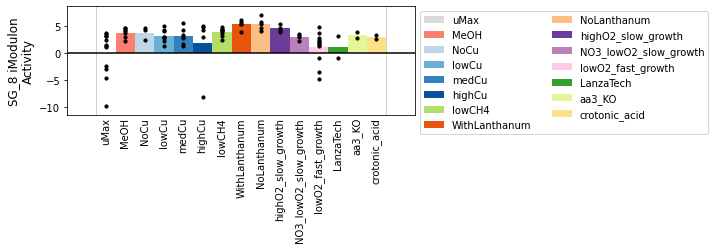

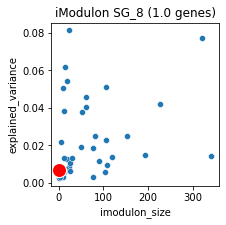

Empty DataFrame
Columns: [imodulon, go_name, pvalue, qvalue, precision, recall, f1score, TP, target_set_size, imodulon_size, source, annotation, pathway_name, module_name]
Index: []

gene_weight gene_symbol  start_coord  end_coord  strand  \
locus_tag                                                                
EQU24_RS08710     0.561573         NaN      1931194    1931374       1   

                            product COG           cog_name uniprot  tu_id  \
locus_tag                                                                   
EQU24_RS08710  hypothetical protein   X  No COG annotation     NaN   1728   

                                                       tu_name ncbi_protein  \
locus_tag                                                                     
EQU24_RS08710  EQU24_RS08720 // EQU24_RS08715 // EQU24_RS08710          NaN   

              gene_name_extra specific_gos_n specific_gos  
locus_tag                                                  
EQU24_RS08710              ||            NaN           []

In [118]:
imod_info("SG_8")

In [119]:
ica_data.imodulon_table.loc[48,'function'] = 'hypothetical-prot_EW'

# Save final ICA data object

In [121]:
data_dir

'../data/5g_processed_data'

In [122]:
save_to_json(ica_data, path.join(data_dir, '5g_curated_lowExAdj.json.gz'))

In [123]:
ica_data.imodulon_table.to_csv(path.join(data_dir, '5g_imodulon_table_lowExAdj.csv'))

In [124]:
ica_data.imodulon_table

single_gene  imodulon_size  explained_variance         category  \
0                         194.0            0.014615  uncharacterized   
1                          78.0            0.018475  uncharacterized   
SG_1        True            1.0            0.003957      single_gene   
3                           9.0            0.004476  uncharacterized   
SG_2        True            1.0            0.005372      single_gene   
5                           3.0            0.007145  uncharacterized   
6                          18.0            0.012815  uncharacterized   
SG_3        True            1.0            0.004262      single_gene   
8                          49.0            0.019220       functional   
9                         342.0            0.014302  uncharacterized   
10                        154.0            0.024830  uncharacterized   
11                         61.0            0.040583  uncharacterized   
12                         11.0            0.005806  uncharacterized   
13                         23.0            0.008176  uncharacterized   
14                         17.0            0.007486  uncharacterized   
15                         25.0            0.010389  uncharacterized   
16                         10.0            0.006363  uncharacterized   
17                         11.0            0.038322  uncharacterized   
18                          6.0            0.021733       functional   
19                         52.0            0.037592       functional   
20                         12.0            0.013208  uncharacterized   
21                         31.0            0.013259  uncharacterized   
22                        105.0            0.050861  uncharacterized   
23                        109.0            0.009538  uncharacterized   
24                          4.0            0.003447  uncharacterized   
SG_4        True            1.0            0.007048      single_gene   
26                          9.0            0.050407       functional   
27                         19.0            0.054464  uncharacterized   
28                         12.0            0.006493  uncharacterized   
29                         62.0            0.045652  uncharacterized   
30                        119.0            0.013866  uncharacterized   
31                         76.0            0.002896  uncharacterized   
32                          5.0            0.004431  uncharacterized   
33                         24.0            0.081435  uncharacterized   
34                         15.0            0.061954       functional   
35                         82.0            0.024808  uncharacterized   
36                         25.0            0.006224  uncharacterized   
37                        105.0            0.022576  uncharacterized   
38                         90.0            0.011273  uncharacterized   
39                        227.0            0.042088  uncharacterized   
40                        322.0            0.077054  uncharacterized   
41                          6.0            0.003386  uncharacterized   
SG_5        True            1.0            0.003007      single_gene   
43                          9.0            0.002953  uncharacterized   
SG_6        True          104.0            0.005756      single_gene   
SG_7        True            1.0            0.002186      single_gene   
46                          3.0            0.003624  uncharacterized   
47                          3.0            0.002805  uncharacterized   
SG_8        True            1.0            0.006471      single_gene   
42                          NaN                 NaN                    
45                          NaN                 NaN                    
48                          NaN                 NaN                    

                                               function  
0                                  large-transposase_EW  
1                      transposase-sulfate-flagella?_EW  
SG_1          

In [125]:
ica_data.imodulon_table.shape

(52, 5)